### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

# Owner - Harshdeep Kohli

## Assignment: Diagnostic Analysis of NHS data using Python
This assignment uses real-world data to address a problem faced by the National Health Service (NHS). The analysis utilises Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making.

# GitHub
### This project will be hosted on GitHub which is one of the largest coding communities and has the benefits of reproducability of code and promotes collaboration with industry professionals. You can view my github repostitories by pressing the below link.
**My GitHub:**
https://github.com/harshdeepkohli53

## Scenario

You are part of a team of data analysts that was contracted by the National Health Services (NHS), a publicly funded healthcare system in England. The team has been provided with internal and external data and a number of high-level business questions  concerning the utilisation of services, missed appointments, and the potential value of using external data sources such as Twitter (now rebranded as X) . Your role is to refine the business questions to actionable analytic questions based on your review of the available data. You will then plan and perform the exploratory data analysis and present the insights to the respective stakeholders.

The NHS must expand its infrastructure and resources to match its increasing population capacity. For this, it needs to budget correctly. When deciding on budget allotment, the NHS must understand the utilisation trends of each component in its network.

Some stakeholders feel that the NHS’s capacity should be increased while others feel that, based on current trends in utilisation, the current capacity is adequate and that efforts to make better use of existing infrastructure and resources are sufficient. Your team has been tasked to explore the available data and offer suggestions and recommendations based on your observations.

### NHS Objectives

Efficiently allocate resources, address capacity needs, and reduce missed GP appointments to improve the NHS’ effectiveness in England.

This report will analyse data on 4 datasets to uncover insights which will help answer the 2 main questions they wish understand. These questions are:

- Has there been adequate staff and capacity in the networks?- 
What was the actual utilisation of resources?

> ### Planning the analysis

**1.** Should the NHS start looking at increasing staff levels? 

**2.** How the healthcare professional types differ over time? 

**3.** Are there significant changes in the attendance of appointments? 

**4.** Are there any trends in time between booking an appointment?

**5.** Are there changes in terms of appointment type and the busiest months?

**6.** Has utilisation exceeded capacity?

**7.** Is there any benefit of analysing Twitter data to understand sentiment about the NHS?

> ### NOTE - A figure of 1.2M apppointments was given as the maximum daily NHS capacity.  

### Prepare workstation

In [403]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from scipy.stats import pearsonr
import scipy

# Display plots within notebook
%matplotlib inline

# Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

# Set figure style
sns.set(style = 'white', palette = 'colorblind')

# Maximum column width to display
pd.options.display.max_colwidth = 200

# set plot/figure size
plt.rcParams["figure.figsize"] = (15,8)

## Data Validation

In [405]:
def validate_data(df):
    """
    Performs basic data checks on a Pandas DataFrame.

    Args:
        df: The Pandas DataFrame to validate.

    Returns:
        A dictionary containing the results of the data checks to easily access individual elements
    """

    results = {}

    results['shape'] = df.shape  # determine number of rows and columns in the df
    results['null_values'] = df.isnull().sum()  # determine number of null values in the df
    results['data_types'] = df.dtypes  # determine column data types in the df
    results['duplicate_values'] = df.duplicated().sum()  # determine number of duplicates in the df
    results['summary_statistics'] = df.describe()  # determine summary statistics in the df
    
    return results

## Load the 4 datasets into pandas data frames

In [407]:
# Import actual_duration.csv data set as ad
ad = pd.read_csv('actual_duration.csv')

# Import appointments_regional.csv data set as ar
ar = pd.read_csv('appointments_regional.csv')

# Import national_categories.xlsx data set as nc
nc = pd.read_excel('national_categories.xlsx')

# Import tweets.csv data set as tweets
tweets = pd.read_csv('tweets.csv')

## Actual Duration Dataset - sense check

In [409]:
# validate the data using above defined validate_data user defined function
validate_data(ad)

{'shape': (137793, 8),
 'null_values': sub_icb_location_code        0
 sub_icb_location_ons_code    0
 sub_icb_location_name        0
 icb_ons_code                 0
 region_ons_code              0
 appointment_date             0
 actual_duration              0
 count_of_appointments        0
 dtype: int64,
 'data_types': sub_icb_location_code        object
 sub_icb_location_ons_code    object
 sub_icb_location_name        object
 icb_ons_code                 object
 region_ons_code              object
 appointment_date             object
 actual_duration              object
 count_of_appointments         int64
 dtype: object,
 'duplicate_values': 0,
 'summary_statistics':        count_of_appointments
 count          137793.000000
 mean             1219.080011
 std              1546.902956
 min                 1.000000
 25%               194.000000
 50%               696.000000
 75%              1621.000000
 max             15400.000000}

In [410]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [411]:
# View the top 5 rows of the data set.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [412]:
# View the last 5 rows of the data set.
ad.tail()

sub_icb_location_code sub_icb_location_ons_code  \
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137788  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137789  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137790  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137788        30-Jun-22   31-60 Minutes                    430  
137789        30-Jun-22   21-30 Minutes                    751  
137790        30-Jun-22   16-20 Minutes                    921  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

## Appointments Regional Dataset - sense check

In [414]:
# validate the data using above defined validate_data user defined function
validate_data(ar)

{'shape': (596821, 7),
 'null_values': icb_ons_code                         0
 appointment_month                    0
 appointment_status                   0
 hcp_type                             0
 appointment_mode                     0
 time_between_book_and_appointment    0
 count_of_appointments                0
 dtype: int64,
 'data_types': icb_ons_code                         object
 appointment_month                    object
 appointment_status                   object
 hcp_type                             object
 appointment_mode                     object
 time_between_book_and_appointment    object
 count_of_appointments                 int64
 dtype: object,
 'duplicate_values': 21604,
 'summary_statistics':        count_of_appointments
 count          596821.000000
 mean             1244.601857
 std              5856.887042
 min                 1.000000
 25%                 7.000000
 50%                47.000000
 75%               308.000000
 max            211265.000000}

In [415]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [416]:
# View the top 5 rows of the data set.
ad.head()

sub_icb_location_code sub_icb_location_ons_code  \
0                   00L                 E38000130   
1                   00L                 E38000130   
2                   00L                 E38000130   
3                   00L                 E38000130   
4                   00L                 E38000130   

                        sub_icb_location_name icb_ons_code region_ons_code  \
0  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
1  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
2  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
3  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   
4  NHS North East and North Cumbria ICB - 00L    E54000050       E40000012   

  appointment_date         actual_duration  count_of_appointments  
0        01-Dec-21           31-60 Minutes                    364  
1        01-Dec-21           21-30 Minutes                    619  
2        01-Dec-21            6-10 Minutes                   1698  
3        01-Dec-21  Unknown / Data Quality                   1277  
4        01-Dec-21           16-20 Minutes                    730

In [417]:
# View the last 5 rows of the data set.
ad.tail()

sub_icb_location_code sub_icb_location_ons_code  \
137788                 X2C4Y                 E38000254   
137789                 X2C4Y                 E38000254   
137790                 X2C4Y                 E38000254   
137791                 X2C4Y                 E38000254   
137792                 X2C4Y                 E38000254   

                 sub_icb_location_name icb_ons_code region_ons_code  \
137788  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137789  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137790  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137791  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   
137792  NHS West Yorkshire ICB - X2C4Y    E54000054       E40000012   

       appointment_date actual_duration  count_of_appointments  
137788        30-Jun-22   31-60 Minutes                    430  
137789        30-Jun-22   21-30 Minutes                    751  
137790        30-Jun-22   16-20 Minutes                    921  
137791        30-Jun-22   11-15 Minutes                   1439  
137792        30-Jun-22     1-5 Minutes                   1739

## National Categories Dataset - sense check

In [419]:
# validate the data using above defined validate_data user defined function
validate_data(nc)

{'shape': (817394, 8),
 'null_values': appointment_date         0
 icb_ons_code             0
 sub_icb_location_name    0
 service_setting          0
 context_type             0
 national_category        0
 count_of_appointments    0
 appointment_month        0
 dtype: int64,
 'data_types': appointment_date         datetime64[ns]
 icb_ons_code                     object
 sub_icb_location_name            object
 service_setting                  object
 context_type                     object
 national_category                object
 count_of_appointments             int64
 appointment_month                object
 dtype: object,
 'duplicate_values': 0,
 'summary_statistics':                     appointment_date  count_of_appointments
 count                         817394          817394.000000
 mean   2022-01-16 00:50:35.860796160             362.183684
 min              2021-08-01 00:00:00               1.000000
 25%              2021-10-25 00:00:00               7.000000
 50%          

In [420]:
# Determine the metadata of the data set.
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [421]:
# View the top 5 rows of the data set.
nc.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month  
0           2021-08  
1           2021-08  
2           2021-08  
3           2021-08  
4           2021-08

In [422]:
# View the last 5 rows of the data set.
nc.tail()

appointment_date icb_ons_code           sub_icb_location_name  \
817389       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817390       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817391       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817392       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   
817393       2022-06-30    E54000054  NHS West Yorkshire ICB - X2C4Y   

                  service_setting            context_type  \
817389  Extended Access Provision  Care Related Encounter   
817390  Extended Access Provision  Care Related Encounter   
817391  Extended Access Provision  Care Related Encounter   
817392  Extended Access Provision  Care Related Encounter   
817393  Extended Access Provision  Care Related Encounter   

                   national_category  count_of_appointments appointment_month  
817389   Unplanned Clinical Activity                     12           2022-06  
817390               Planned Clinics                      4           2022-06  
817391    Planned Clinical Procedure                     92           2022-06  
817392  General Consultation Routine                      4           2022-06  
817393    General Consultation Acute                     19           2022-06

## Duplicate handling - (Note - only the ar data frame contains duplicates)

In [424]:
# How much of the ar dataframe contains duplicates?
# output is the percentage of duplicates in the 'ar' data frame
# calculated as duplicates / total number of rows
(validate_data(ar).get('duplicate_values') / validate_data(ar).get('shape')[0]) * 100

3.619845816417318

> NOTE - As only 3.6% of the ar dataset contains duplicates, I have decided not to remove them as this number is too low affect our analysis, and there is an issue of data quality within the data to actually determine whether they are in fact duplicates.

> NOTE - As the appointments_regional dataset does not contain 'icb names' and 'region names' we will import a seperate file which I have created containing all icb codes, icb & region names, and merge to the appointments_regional dataframe.

In [427]:
# Read icb names file
icb_names = pd.read_csv('icb_name_lookup.csv')

# View the df
icb_names

icb_ons_code                                                 icb_name  \
0     E54000034                                              NHS Frimley   
1     E54000037                                                NHS Devon   
2     E54000044      NHS Buckinghamshire, Oxfordshire and Berkshire West   
3     E54000043                                      NHS Gloucestershire   
4     E54000051                           NHS Humber and North Yorkshire   
5     E54000025                         NHS Hertfordshire and West Essex   
6     E54000058                                 NHS Derby and Derbyshire   
7     E54000062                                        NHS Black Country   
8     E54000055                              NHS Birmingham and Solihull   
9     E54000031                                    NHS South West London   
10    E54000054                                       NHS West Yorkshire   
11    E54000027                                    NHS North West London   
12    E54000036                     NHS Cornwall and the Isles of Scilly   
13    E54000048                         NHS Lancashire and South Cumbria   
14    E54000057                                   NHS Greater Manchester   
15    E54000041                                               NHS Dorset   
16    E54000013                                         NHS Lincolnshire   
17    E54000015                NHS Leicester, Leicestershire and Rutland   
18    E54000030                                    NHS South East London   
19    E54000061                                      NHS South Yorkshire   
20    E54000024                NHS Bedfordshire, Luton and Milton Keynes   
21    E54000011                       NHS Shropshire, Telford and Wrekin   
22    E54000010                     NHS Staffordshire and Stoke-on-Trent   
23    E54000019                     NHS Herefordshire and Worcestershire   
24    E54000026                                  NHS Mid and South Essex   
25    E54000053                                               NHS Sussex   
26    E54000018                            NHS Coventry and Warwickshire   
27    E54000060                       NHS Nottingham and Nottinghamshire   
28    E54000029                                    NHS North East London   
29    E54000052                                    NHS Surrey Heartlands   
30    E54000038                                             NHS Somerset   
31    E54000039    NHS Bristol, North Somerset and South Gloucestershire   
32    E54000056                      NHS Cambridgeshire and Peterborough   
33    E54000042                          NHS Hampshire and Isle of Wight   
34    E54000032                                      NHS Kent and Medway   
35    E54000022                                  NHS Norfolk and Waveney   
36    E54000023                         NHS Suffolk and North East Essex   
37    E54000008                              NHS Cheshire and Merseyside   
38    E54000028                                 NHS North Central London   
39    E54000040  NHS Bath and North East Somerset, Swindon and Wiltshire   
40    E54000059                                     NHS Northamptonshire   
41    E54000050                         NHS North East and North Cumbria   

                 region_name  
0                 South East  
1                 South West  
2                 South East  
3                 South West  
4   North East and Yorkshire  
5            East of England  
6                   Midlands  
7                   Midlands  
8                   Midlands  
9                     London  
10  North East and Yorkshire  
11                    London  
12                South West  
13                North West  
14                North West  
15                South West  
16                  Midlands  
17                  Midlands  
18                    London  
19  North East and Yorkshire  
20           East of England  
21                  Midlands  
22                  M

In [428]:
# Merge the 'ar' df with the 'icb names' df using a left join on the icb ons code field. Create a new df called ar_new
ar_new = pd.merge(ar,icb_names,on='icb_ons_code',how='left')

In [429]:
# validate the updated ar_new df using above defined validate_data user defined function
validate_data(ar_new)

{'shape': (596821, 9),
 'null_values': icb_ons_code                         0
 appointment_month                    0
 appointment_status                   0
 hcp_type                             0
 appointment_mode                     0
 time_between_book_and_appointment    0
 count_of_appointments                0
 icb_name                             0
 region_name                          0
 dtype: int64,
 'data_types': icb_ons_code                         object
 appointment_month                    object
 appointment_status                   object
 hcp_type                             object
 appointment_mode                     object
 time_between_book_and_appointment    object
 count_of_appointments                 int64
 icb_name                             object
 region_name                          object
 dtype: object,
 'duplicate_values': 21604,
 'summary_statistics':        count_of_appointments
 count          596821.000000
 mean             1244.601857
 std        

In [430]:
# Check that the new 'icb_name' column was imported and no null values exist
ar_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 9 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
 7   icb_name                           596821 non-null  object
 8   region_name                        596821 non-null  object
dtypes: int64(1), object(8)
memory usage: 41.0+ MB


In [431]:
# View the top 5 rows of the data set.
ar_new.head()

icb_ons_code appointment_month appointment_status hcp_type appointment_mode  \
0    E54000034           2020-01           Attended       GP     Face-to-Face   
1    E54000034           2020-01           Attended       GP     Face-to-Face   
2    E54000034           2020-01           Attended       GP     Face-to-Face   
3    E54000034           2020-01           Attended       GP     Face-to-Face   
4    E54000034           2020-01           Attended       GP     Face-to-Face   

  time_between_book_and_appointment  count_of_appointments     icb_name  \
0                             1 Day                   8107  NHS Frimley   
1                    15  to 21 Days                   6791  NHS Frimley   
2                       2 to 7 Days                  20686  NHS Frimley   
3                    22  to 28 Days                   4268  NHS Frimley   
4                     8  to 14 Days                  11971  NHS Frimley   

  region_name  
0  South East  
1  South East  
2  South East  
3  South East  
4  South East

In [432]:
# View the last 5 rows of the data set.
ar_new.tail()

icb_ons_code appointment_month appointment_status hcp_type  \
596816    E54000050           2022-06            Unknown  Unknown   
596817    E54000050           2022-06            Unknown  Unknown   
596818    E54000050           2022-06            Unknown  Unknown   
596819    E54000050           2022-06            Unknown  Unknown   
596820    E54000050           2022-06            Unknown  Unknown   

       appointment_mode time_between_book_and_appointment  \
596816          Unknown                       2 to 7 Days   
596817          Unknown                    22  to 28 Days   
596818          Unknown                     8  to 14 Days   
596819          Unknown                 More than 28 Days   
596820          Unknown                          Same Day   

        count_of_appointments                          icb_name  \
596816                     21  NHS North East and North Cumbria   
596817                      8  NHS North East and North Cumbria   
596818                     28  NHS North East and North Cumbria   
596819                     17  NHS North East and North Cumbria   
596820                     10  NHS North East and North Cumbria   

                     region_name  
596816  North East and Yorkshire  
596817  North East and Yorkshire  
596818  North East and Yorkshire  
596819  North East and Yorkshire  
596820  North East and Yorkshire

### Explore the data set

**Question 1:** How many locations are there in the data set?

- Number of regions = 7
- Number of Integrated Care Boards (ICBs) = 42
- Number of Sub Integrated Care Boards (Sub ICB) = 106

In [435]:
# Determine the number of locations.
region_count = ad['region_ons_code'].nunique()
icb_count = ad['icb_ons_code'].nunique()
sub_icb_count = ad['sub_icb_location_ons_code'].nunique()

print(f" Number of Regions: {region_count}")
print(f" Number of Integrated Care Boards (ICBs): {icb_count}")
print(f" Number of Sub Integrated Care Boards (Sub ICB): {sub_icb_count}")

 Number of Regions: 7
 Number of Integrated Care Boards (ICBs): 42
 Number of Sub Integrated Care Boards (Sub ICB): 106


**Question 2:** What are the five locations with the highest number of appointments?

 - The top five sub ICB locations are North West London, North East London, Kent and Medway, Hampshire and Isle of Wight, and South East London. - This is the case in both the nc and ad DataFrames, but note there are fewer records in ad than nc . - The top ICB location is North East and North Cumbria icb.



In [437]:
# Calculates the sum of the 'count of appointments' field and groups it by 'sub icb location name' and returns the top 5 by sum total appointments
nc_top_5_loc = nc.groupby(['sub_icb_location_name'])['count_of_appointments'].sum().sort_values(ascending=False).head(5).reset_index()\
                 .rename(columns={'sub_icb_location_name':'Location name','count_of_appointments':'Total Appointments'})

# Calculates the sum of all appointments in the nc data frame
nc_total_appt = nc['count_of_appointments'].sum()

# Create a new column to get a % of Total appointments and round to 2 decimal places
nc_top_5_loc['% of Total Appointments'] = ((nc_top_5_loc['Total Appointments'] / nc_total_appt) *100).round(2)

# View the df
nc_top_5_loc

Location name  Total Appointments  \
0            NHS North West London ICB - W2U3Z            12142390   
1            NHS North East London ICB - A3A8R             9588891   
2                NHS Kent and Medway ICB - 91Q             9286167   
3  NHS Hampshire and Isle Of Wight ICB - D9Y0V             8288102   
4              NHS South East London ICB - 72Q             7850170   

   % of Total Appointments  
0                     4.10  
1                     3.24  
2                     3.14  
3                     2.80  
4                     2.65

In [438]:
# Calculates the sum of the 'count of appointments' field and groups it by 'icb location name' and returns the top 5 by sum total appointments
ar_top_5_loc = ar_new.groupby(['icb_name'])['count_of_appointments'].sum().sort_values(ascending=False).head(5).reset_index()\
                     .rename(columns={'icb_name':'Location name','count_of_appointments':'Total Appointments'})

# Calculates the sum of all appointments in the 'new' ar df
ar_total_appt = ar_new['count_of_appointments'].sum()

# Create a new column to get a % of Total appointments and round to 2 decimal places
ar_top_5_loc['% of Total Appointments'] = ((ar_top_5_loc['Total Appointments'] / ar_total_appt) *100).round(2)

# View the df
ar_top_5_loc

Location name  Total Appointments  \
0  NHS North East and North Cumbria            43083535   
1                NHS West Yorkshire            36090387   
2            NHS Greater Manchester            34080583   
3       NHS Cheshire and Merseyside            33099882   
4             NHS North West London            29380767   

   % of Total Appointments  
0                     5.80  
1                     4.86  
2                     4.59  
3                     4.46  
4                     3.96

In [439]:
# Calculates the sum of the 'count of appointments' field and groups it by 'sub icb location name' and returns the top 5 by sum total appointments
ad_top_5_loc = ad.groupby(['sub_icb_location_name'])['count_of_appointments'].sum().sort_values(ascending=False).head(5).reset_index()\
                 .rename(columns={'sub_icb_location_name':'Location name','count_of_appointments':'Total Appointments'})

# Calculates the sum of all appointments in the ad data frame
ad_total_appt = ad['count_of_appointments'].sum()

# Create a new column to get a % of Total appointments and round to 2 decimal places
ad_top_5_loc['% of Total Appointments'] = ((ad_top_5_loc['Total Appointments'] / ad_total_appt) *100).round(2)

# View the df
ad_top_5_loc

Location name  Total Appointments  \
0            NHS North West London ICB - W2U3Z             6976986   
1            NHS North East London ICB - A3A8R             5341883   
2                NHS Kent and Medway ICB - 91Q             5209641   
3  NHS Hampshire and Isle Of Wight ICB - D9Y0V             4712737   
4              NHS South East London ICB - 72Q             4360079   

   % of Total Appointments  
0                     4.15  
1                     3.18  
2                     3.10  
3                     2.81  
4                     2.60

**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

 - Number of service settings = 5 (91% of appointments in General Practice)
 - Number of context types = 3 (87% of appointments in Care Related Encounter)
 - Number of national categories = 18 (33% of appointments in General Consultation Routine which is most common)
 - Number of appointment statuses = 3 (91% of appointments attended, 4% DNA, 5% unknown)
 - Number of appointment modes = 5 (59% of appointments face-to-face, 36% telephone are most common)
 - Number of time between booking and appointment intervals = 8 ( 46% on same day they, 20.7% taking place within 2-7 days.)
 - Number of HCP types = 3 (51% for GP and 46% for Other Practice staff)
 - Number of actual duration intervals = 7 (24% of appointments are of unknown length; 20% are 6-10 minutes long and 17% are 1-5 minutes long.)

In [441]:
# Determine the number of service settings.

# Calculates the unique number of service settings and print them
service_settings = nc['service_setting'].nunique()
print(f" Number of service settings is: {service_settings}")

# Group total appointments by service setting
nc_service_setting = nc.groupby(['service_setting'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                       .rename(columns={'service_setting':'Location name','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
nc_service_setting['% of Total Appointments'] = ((nc_service_setting['Total Appointments'] / nc_total_appt) *100).round(2)

# View the df
nc_service_setting

 Number of service settings is: 5


Location name  Total Appointments  % of Total Appointments
0           General Practice           270811691                    91.48
1                   Unmapped            11080810                     3.74
2       Primary Care Network             6557386                     2.21
3                      Other             5420076                     1.83
4  Extended Access Provision             2176807                     0.74

In [442]:
# Determine the number of context types.

# Calculates the unique number of context types and print them
context_types = nc['context_type'].nunique()
print(f" Number of context types is: {context_types}")

# Group total appointments by context type
nc_context_type = nc.groupby(['context_type'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                    .rename(columns={'context_type':'Context Type','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
nc_context_type['% of Total Appointments'] = ((nc_context_type['Total Appointments'] / nc_total_appt) *100).round(2)

# View the df
nc_context_type

 Number of context types is: 3


Context Type  Total Appointments  % of Total Appointments
0  Care Related Encounter           257075158                    86.84
1    Inconsistent Mapping            27890802                     9.42
2                Unmapped            11080810                     3.74

In [443]:
# Determine the number of national categories.

# Calculates the unique number of national categories and print them
national_categories = nc['national_category'].nunique()
print(f" Number of national categories is: {national_categories}")

# Group total appointments by national category
nc_national_category = nc.groupby(['national_category'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                         .rename(columns={'national_category':'National Category','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
nc_national_category['% of Total Appointments'] = ((nc_national_category['Total Appointments'] / nc_total_appt) *100).round(2)

# View the df
nc_national_category

 Number of national categories is: 18


National Category  \
0                                          General Consultation Routine   
1                                            General Consultation Acute   
2                                                       Clinical Triage   
3                                                       Planned Clinics   
4                                                  Inconsistent Mapping   
5                                            Planned Clinical Procedure   
6                                                              Unmapped   
7                                           Unplanned Clinical Activity   
8                                                            Home Visit   
9                                          Structured Medication Review   
10            Service provided by organisation external to the practice   
11                               Patient contact during Care Home Round   
12                                                      Care Home Visit   
13                                           Social Prescribing Service   
14                                                              Walk-in   
15  Care Home Needs Assessment & Personalised Care and Support Planning   
16                                      Non-contractual chargeable work   
17                               Group Consultation and Group Education   

    Total Appointments  % of Total Appointments  
0             97271522                    32.86  
1             53691150                    18.14  
2             41546964                    14.03  
3             28019748                     9.46  
4             27890802                     9.42  
5             25702694                     8.68  
6             11080810                     3.74  
7              3055794                     1.03  
8              2144452                     0.72  
9              1858379                     0.63  
10              852133                     0.29  
11              810330                     0.27  
12              628279                     0.21  
13              475828                     0.16  
14              412438                     0.14  
15              405904                     0.14  
16              138911                     0.05  
17               60632                     0.02

In [444]:
# Determine the number of appointment statuses.

# Calculates the unique number of appointment statuses and print them
appt_status = ar_new['appointment_status'].nunique()
print(f" Number of appointment statuses is: {appt_status}")

# Group total appointments by appointment status
ar_appointment_status = ar_new.groupby(['appointment_status'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                              .rename(columns={'appointment_status':'Appointment Status','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
ar_appointment_status['% of Total Appointments'] = ((ar_appointment_status['Total Appointments'] / ar_total_appt) *100).round(2)

# View the df
ar_appointment_status

 Number of appointment statuses is: 3


Appointment Status  Total Appointments  % of Total Appointments
0           Attended           677755876                    91.24
1            Unknown            34137416                     4.60
2                DNA            30911233                     4.16

> 4% of not attended appointments is costing the NHS £927M (assuming £30 per missed appointment). Link to reference below

link - https://www.england.nhs.uk/2019/01/missed-gp-appointments-costing-nhs-millions/

In [446]:
# Determine the number of HCP Types.

# Calculates the unique number of HCP types and print them
hcp_types = ar_new['hcp_type'].nunique()
print(f" Number of HCP types is: {hcp_types}")

# Group total appointments by HCP type
ar_hcp_types = ar_new.groupby(['hcp_type'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                     .rename(columns={'hcp_type':'HCP type','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
ar_hcp_types['% of Total Appointments'] = ((ar_hcp_types['Total Appointments'] / ar_total_appt) *100).round(2)

# View the df
ar_hcp_types

 Number of HCP types is: 3


HCP type  Total Appointments  % of Total Appointments
0                    GP           379650140                    51.11
1  Other Practice staff           339650535                    45.73
2               Unknown            23503850                     3.16

In [447]:
# Determine the number of Appointment modes

# Calculates the unique number of appointment modes and print them
mode_types = ar_new['appointment_mode'].nunique()
print(f" Number of appointment modes is: {mode_types}")

# Group total appointments by appointment mode
ar_appointment_mode = ar_new.groupby(['appointment_mode'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                            .rename(columns={'appointment_mode':'Appointment mode','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
ar_appointment_mode['% of Total Appointments'] = ((ar_appointment_mode['Total Appointments'] / ar_total_appt) *100).round(2)
                                                                                                             
# View the df
ar_appointment_mode

 Number of appointment modes is: 5


Appointment mode  Total Appointments  % of Total Appointments
0     Face-to-Face           439981729                    59.23
1        Telephone           267862657                    36.06
2          Unknown            26451305                     3.56
3       Home Visit             4887876                     0.66
4     Video/Online             3620958                     0.49

In [448]:
# Determine the number of appointments by 'time between booking and appointment'

# Group total appointments by time between booking and appointment
ar_appt_wait_time = ar_new.groupby(['time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()\
                          .rename(columns={'time_between_book_and_appointment':'Time between booking & appointment',
                                           'count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
ar_appt_wait_time['% of Total Appointments'] = ((ar_appt_wait_time['Total Appointments'] / ar_total_appt) *100).round(2)


# define the desired order of the 'time between booking and appointment' column
day_order = ['Same Day','1 Day','2 to 7 Days','8  to 14 Days','15  to 21 Days','22  to 28 Days','More than 28 Days','Unknown / Data Quality']

# Assign the 'time between booking and appointment' column to be a categorical data type, and use the day_order as the desired order
ar_appt_wait_time['Time between booking & appointment'] = pd.Categorical(ar_appt_wait_time['Time between booking & appointment'],
                                                                         categories = day_order,ordered = True)

# Sort the data frame based on the categorical column
ar_appt_wait_time = ar_appt_wait_time.sort_values('Time between booking & appointment')

# View the df
ar_appt_wait_time

Time between booking & appointment  Total Appointments  \
6                           Same Day           342747171   
0                              1 Day            67716097   
2                        2 to 7 Days           153794531   
4                      8  to 14 Days            86846519   
1                     15  to 21 Days            42710574   
3                     22  to 28 Days            25536541   
5                  More than 28 Days            23050987   
7             Unknown / Data Quality              402105   

   % of Total Appointments  
6                    46.14  
0                     9.12  
2                    20.70  
4                    11.69  
1                     5.75  
3                     3.44  
5                     3.10  
7                     0.05

In [449]:
# Determine the number of appointment by actual duration of appointment

# Group total appointments by actual duration
ad_appointment_duration = ad.groupby(['actual_duration'])['count_of_appointments'].sum().reset_index()\
                            .rename(columns={'actual_duration':'Actual duration of appointment',
                                             'count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
ad_appointment_duration['% of Total Appointments'] = ((ad_appointment_duration['Total Appointments'] / ad_total_appt) *100).round(2)


# define the desired order of the 'actual duration' column
duration_order = ['1-5 Minutes','6-10 Minutes','11-15 Minutes','16-20 Minutes','21-30 Minutes','31-60 Minutes','Unknown / Data Quality']

# Assign the 'actual duration' column to be a categorical data type, and use the duration_order as the desired order
ad_appointment_duration['Actual duration of appointment'] = pd.Categorical(ad_appointment_duration['Actual duration of appointment'],
                                                                           categories = duration_order,ordered = True)

# Sort the data frame based on the categorical column
ad_appointment_duration = ad_appointment_duration.sort_values('Actual duration of appointment')

# View the df
ad_appointment_duration

Actual duration of appointment  Total Appointments  % of Total Appointments
0                    1-5 Minutes            28600865                    17.03
5                   6-10 Minutes            33800815                    20.12
1                  11-15 Minutes            25160882                    14.98
2                  16-20 Minutes            16004247                     9.53
3                  21-30 Minutes            15026365                     8.95
4                  31-60 Minutes             9103432                     5.42
6         Unknown / Data Quality            40284086                    23.98

# Further data exploration

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

- In ad, appointments run from 1st December 2021 - 30th June 2022 (7 months)
- In ar, appointments run from January 2020 - June 2022 (30 months)
- In nc, appointments run from 1st August 2021 - 30th June 2022 (11 months)

In [453]:
# View the first five rows of appointment_date for the ad df to determine the date format.
ad['appointment_date'].head()

0    01-Dec-21
1    01-Dec-21
2    01-Dec-21
3    01-Dec-21
4    01-Dec-21
Name: appointment_date, dtype: object

In [454]:
# View the first five rows of appointment_date for the nc df to determine the date format.
nc['appointment_date'].head()

0   2021-08-02
1   2021-08-02
2   2021-08-02
3   2021-08-02
4   2021-08-02
Name: appointment_date, dtype: datetime64[ns]

In [455]:
# Change the date format of ad['appointment_date'].
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame.
ad['appointment_date'].head()

0   2021-12-01
1   2021-12-01
2   2021-12-01
3   2021-12-01
4   2021-12-01
Name: appointment_date, dtype: datetime64[ns]

In [456]:
# Change the date format of ar['appointment_month'].
ar_new['appointment_month'] = pd.to_datetime(ar_new['appointment_month'])

# View the DateFrame.
ar_new['appointment_month'].head()

0   2020-01-01
1   2020-01-01
2   2020-01-01
3   2020-01-01
4   2020-01-01
Name: appointment_month, dtype: datetime64[ns]

In [457]:
# Determine the minimum and maximum dates in the ad DataFrame.

ad_appt_dt_min = ad['appointment_date'].dt.date.min()
ad_appt_dt_max = ad['appointment_date'].dt.date.max()

print(f" Minimum appointment date in ad data frame: {ad_appt_dt_min}")
print(f" Maximum appointment date in ad data frame: {ad_appt_dt_max}")

 Minimum appointment date in ad data frame: 2021-12-01
 Maximum appointment date in ad data frame: 2022-06-30


In [458]:
# Determine the minimum and maximum dates in the nc DataFrame.

nc_appt_dt_min = nc['appointment_date'].dt.date.min()
nc_appt_dt_max = nc['appointment_date'].dt.date.max()

print(f" Minimum appointment date in nc data frame: {nc_appt_dt_min}")
print(f" Maximum appointment date in nc data frame: {nc_appt_dt_max}")

 Minimum appointment date in nc data frame: 2021-08-01
 Maximum appointment date in nc data frame: 2022-06-30


In [459]:
# Determine the minimum and maximum months in ar. 
# Appointment month is given in the ar

ar_appt_dt_min = ar_new['appointment_month'].min()
ar_appt_dt_max = ar_new['appointment_month'].max()

print(f" Minimum appointment month in ar data frame: {ar_appt_dt_min}")
print(f" Maximum appointment month in ar data frame: {ar_appt_dt_max}")

 Minimum appointment month in ar data frame: 2020-01-01 00:00:00
 Maximum appointment month in ar data frame: 2022-06-01 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

- General Practice was the most popular service setting for NHS North West London from 1 January to 1 June 2022
- 86.5% of appointments were in General Practice

In [461]:
# For each of these service settings, determine the number of records available for the period and the location. 

# subset the data for NHS NW London only
nw_london = nc[nc['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z']

print("Total number of appointments in NW London:", nw_london['count_of_appointments'].sum())

# subset nw_london df for required date period
nw_london = nw_london.loc[(nw_london['appointment_date'] >= '2022-01-01') & (nw_london['appointment_date'] <= '2022-06-01')]

# calculate total nw london apppointments
nw_london_total = nw_london['count_of_appointments'].sum()

print("Total number of appointments in NW London between 1st Jan 2022 - 1st June 2022:",nw_london_total)

# group total appointments by service setting
nw_london_ss = nw_london.groupby('service_setting')[['count_of_appointments']].sum().sort_values('count_of_appointments', ascending=False)\
                        .reset_index().rename(columns={'service_setting':'Service Setting','count_of_appointments':'Total Appointments'})

# calculate % of total appointments and round to 2 decimal places
nw_london_ss['% of Total Appointments'] = (nw_london_ss['Total Appointments']/nw_london_total * 100).round(2)

# view the df
nw_london_ss

Total number of appointments in NW London: 12142390
Total number of appointments in NW London between 1st Jan 2022 - 1st June 2022: 5556241


Service Setting  Total Appointments  % of Total Appointments
0           General Practice             4804239                    86.47
1                   Unmapped              391106                     7.04
2                      Other              152897                     2.75
3       Primary Care Network              109840                     1.98
4  Extended Access Provision               98159                     1.77

**Question 3:** Which month had the highest number of appointments?

-  Using the ar DataFrame, November 2021 had the highest number of appointments (4.09%), closely followed by October 2021 (4.08%)

In [463]:
# Number of appointments per month == sum of count_of_appointments by month.
# Use the groupby() and sort_values() functions.

# Calculates total appointments by appointment month
ar_appt_by_month = ar_new.groupby(['appointment_month'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                         .rename(columns={'appointment_month':'Appointment Month','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
ar_appt_by_month['% of Total Appointments'] = ((ar_appt_by_month['Total Appointments'] / ar_total_appt) * 100).round(2)

# View the df
ar_appt_by_month

Appointment Month  Total Appointments  % of Total Appointments
0         2021-11-01            30405070                     4.09
1         2021-10-01            30303834                     4.08
2         2022-03-01            29595038                     3.98
3         2021-09-01            28522501                     3.84
4         2020-10-01            28301932                     3.81
5         2022-05-01            27495508                     3.70
6         2021-03-01            27225424                     3.67
7         2020-01-01            27199296                     3.66
8         2021-06-01            26784182                     3.61
9         2020-09-01            26714255                     3.60
10        2022-06-01            25828078                     3.48
11        2021-07-01            25739219                     3.47
12        2022-01-01            25635474                     3.45
13        2022-02-01            25355260                     3.41
14        2021-12-01            25140776                     3.38
15        2020-11-01            25061602                     3.37
16        2020-02-01            24104621                     3.25
17        2020-03-01            24053468                     3.24
18        2022-04-01            23913060                     3.22
19        2021-04-01            23879932                     3.21
20        2021-08-01            23852171                     3.21
21        2020-12-01            23535936                     3.17
22        2021-05-01            23508395                     3.16
23        2021-01-01            22492069                     3.03
24        2020-07-01            22491437                     3.03
25        2021-02-01            22399569                     3.02
26        2020-06-01            20690805                     2.79
27        2020-08-01            20150520                     2.71
28        2020-05-01            16417212                     2.21
29        2020-04-01            16007881                     2.16

In [464]:
# Group total appoints by appointment month
nc_appt_by_month = nc.groupby(['appointment_month'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                     .rename(columns={'appointment_month':'Appointment Month','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
nc_appt_by_month['% of Total Appointments'] = ((nc_appt_by_month['Total Appointments'] / nc_total_appt) * 100).round(2)

# sort the df by appointment month
nc_appt_by_month.sort_values(by=['Appointment Month'], inplace=True)

# view the df
nc_appt_by_month

Appointment Month  Total Appointments  % of Total Appointments
10           2021-08            23852171                     8.06
3            2021-09            28522501                     9.63
1            2021-10            30303834                    10.24
0            2021-11            30405070                    10.27
8            2021-12            25140776                     8.49
6            2022-01            25635474                     8.66
7            2022-02            25355260                     8.56
2            2022-03            29595038                    10.00
9            2022-04            23913060                     8.08
4            2022-05            27495508                     9.29
5            2022-06            25828078                     8.72

In [465]:
# Create a new column to format 'appointment date' into Year-Month format
ad['appt_month_year'] = ad['appointment_date'].dt.to_period('M')

# Group total appointments by our new 'appt_month_year' field
ad_appt_by_month = ad.groupby(['appt_month_year'])['count_of_appointments'].sum().sort_values(ascending=False).reset_index()\
                     .rename(columns={'appt_month_year':'Appointment Month','count_of_appointments':'Total Appointments'})

# Create a new column to get a % of Total appointments and round to 2 decimal places
ad_appt_by_month['% of Total Appointments'] = ((ad_appt_by_month['Total Appointments'] / ad_total_appt) * 100).round(2)

# View the df
ad_appt_by_month

Appointment Month  Total Appointments  % of Total Appointments
0           2022-03            27170002                    16.17
1           2022-05            25343941                    15.09
2           2022-06            23715317                    14.12
3           2022-01            23597196                    14.05
4           2022-02            23351939                    13.90
5           2021-12            22853483                    13.60
6           2022-04            21948814                    13.07

**Question 4:** What was the total number of records per month?

- See below time series of total number of appointments by appointment month, using the ar data frame

In [467]:
# Total number of records per month.
ar_appt_by_month_series = ar_new.groupby('appointment_month')[['count_of_appointments']].sum().reset_index()\
                                .rename(columns={'appointment_month':'Appointment Month',
                                                 'count_of_appointments':'Total Appointments'})

# view the df
ar_appt_by_month_series

Appointment Month  Total Appointments
0         2020-01-01            27199296
1         2020-02-01            24104621
2         2020-03-01            24053468
3         2020-04-01            16007881
4         2020-05-01            16417212
5         2020-06-01            20690805
6         2020-07-01            22491437
7         2020-08-01            20150520
8         2020-09-01            26714255
9         2020-10-01            28301932
10        2020-11-01            25061602
11        2020-12-01            23535936
12        2021-01-01            22492069
13        2021-02-01            22399569
14        2021-03-01            27225424
15        2021-04-01            23879932
16        2021-05-01            23508395
17        2021-06-01            26784182
18        2021-07-01            25739219
19        2021-08-01            23852171
20        2021-09-01            28522501
21        2021-10-01            30303834
22        2021-11-01            30405070
23        2021-12-01            25140776
24        2022-01-01            25635474
25        2022-02-01            25355260
26        2022-03-01            29595038
27        2022-04-01            23913060
28        2022-05-01            27495508
29        2022-06-01            25828078

# Time series analysis

### DAILY TRENDS - Using the nc data frame to analyse daily trends as the date is aggregated at daily level

In [470]:
# create a new column 'appointment_day' to analyse appointments by day
nc['appointment_day'] = nc['appointment_date'].dt.day_name()

# sense check the nc['appointment_day'] column was added
print(nc.columns)

# sense check by viewing top 5 rows
nc.head()

Index(['appointment_date', 'icb_ons_code', 'sub_icb_location_name',
       'service_setting', 'context_type', 'national_category',
       'count_of_appointments', 'appointment_month', 'appointment_day'],
      dtype='object')


appointment_date icb_ons_code                       sub_icb_location_name  \
0       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
1       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
2       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

        service_setting            context_type  \
0  Primary Care Network  Care Related Encounter   
1                 Other  Care Related Encounter   
2      General Practice  Care Related Encounter   
3      General Practice  Care Related Encounter   
4      General Practice  Care Related Encounter   

                        national_category  count_of_appointments  \
0  Patient contact during Care Home Round                      3   
1                         Planned Clinics                      7   
2                              Home Visit                     79   
3              General Consultation Acute                    725   
4            Structured Medication Review                      2   

  appointment_month appointment_day  
0           2021-08          Monday  
1           2021-08          Monday  
2           2021-08          Monday  
3           2021-08          Monday  
4           2021-08          Monday

In [471]:
# explore total appointments by day of week

# group total appointments by appointment day of week
nc_appt_by_dow = nc.groupby(['appointment_day'])['count_of_appointments'].sum().reset_index()\
                   .rename(columns={'appointment_day':'Day of Week',
                                    'count_of_appointments':'Total Appointments'})

# Calculate % of total appointments as a new column
nc_appt_by_dow['Percentage'] = (nc_appt_by_dow['Total Appointments'] / nc_appt_by_dow['Total Appointments'].sum()) * 100

# view the df
nc_appt_by_dow

Day of Week  Total Appointments  Percentage
0      Friday            52394868   17.698172
1      Monday            59695267   20.164134
2    Saturday             5574922    1.883122
3      Sunday              614161    0.207454
4    Thursday            56976354   19.245727
5     Tuesday            61806933   20.877422
6   Wednesday            58984265   19.923968

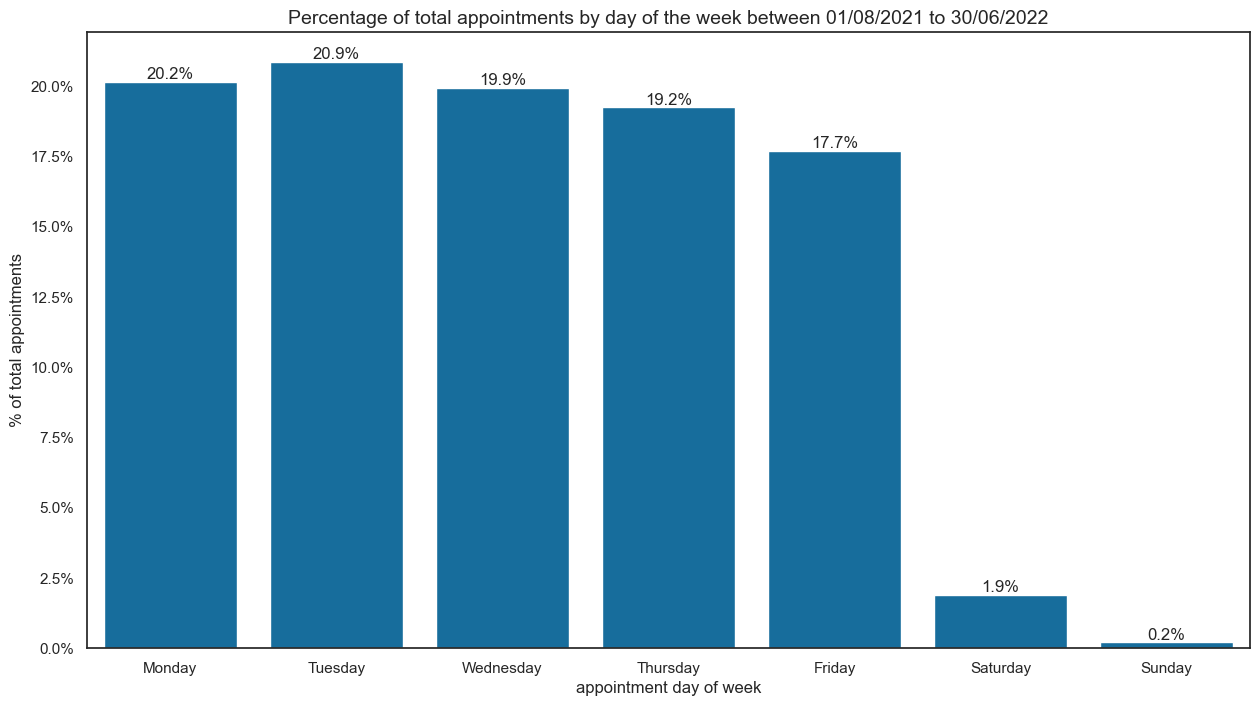

In [472]:
# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create the barplot
ax = sns.barplot(data=nc_appt_by_dow, x='Day of Week', y='Percentage',order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

# Annotate bars with percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())  
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom') 

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# set title
plt.title("Percentage of total appointments by day of the week between 01/08/2021 to 30/06/2022", fontsize=14)

# set x and y labels
plt.xlabel('appointment day of week', fontsize=12)
plt.ylabel('% of total appointments', fontsize=12)

# show the plot
plt.show()

> Tuesday is the day of the week with the most appointments (20.9%), closely followed by Monday (20.2%), then the order follows a wednesday to sunday pattern

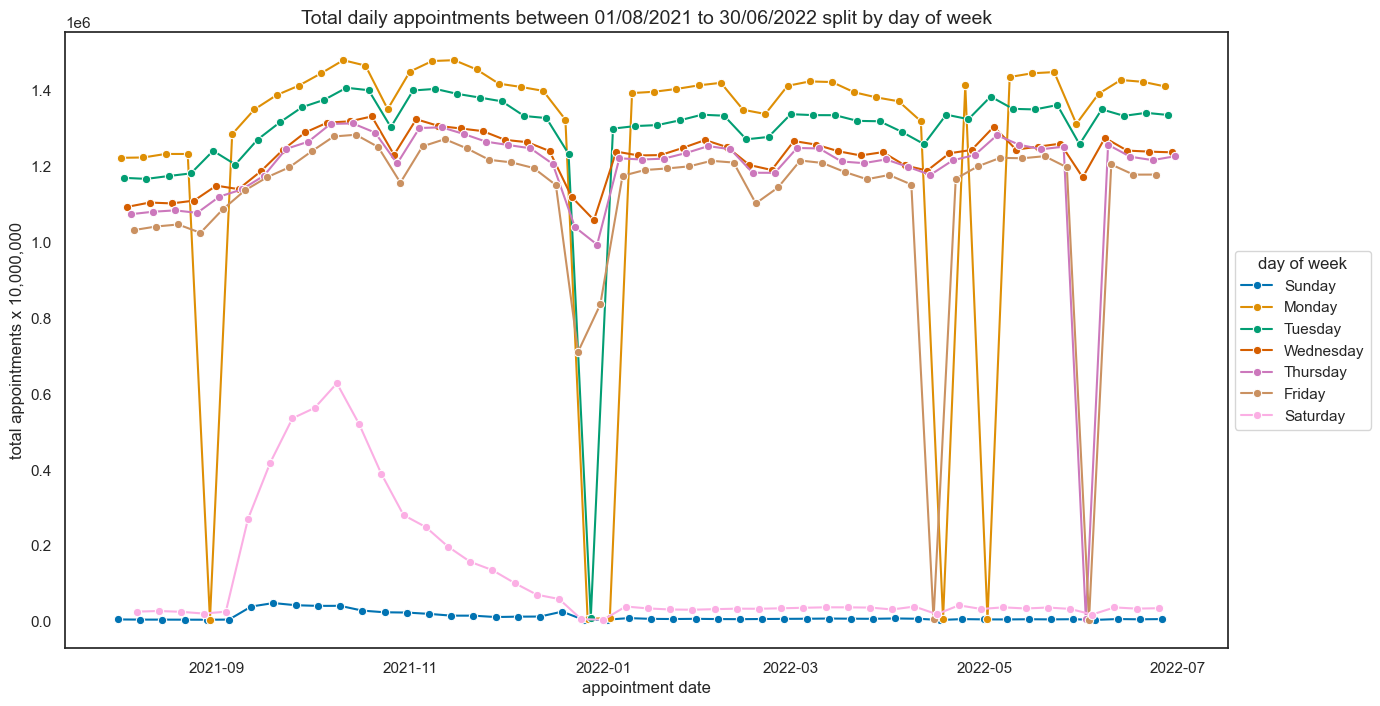

In [474]:
# view appointments by day of the week as a time series

# group total appointments by appointment date and day of week
nc_appt_by_dow_series = nc.groupby(['appointment_date','appointment_day'])['count_of_appointments'].sum().reset_index()\
                          .rename(columns={'count_of_appointments':'Total appointments'})

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create the line plot
sns.lineplot(data=nc_appt_by_dow_series, x='appointment_date', y='Total appointments', hue='appointment_day', marker = 'o')

# set title
plt.title('Total daily appointments between 01/08/2021 to 30/06/2022 split by day of week', fontsize=14)

# set x and y labels
plt.xlabel('appointment date', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='day of week')

> This tells us Mondays generally has higher appointments, but the actual total is brought down by bank/public holidays. Large spike in saturday appointments in Autumn 2021 which was mainlu to tackle backlogs and for covid vaccinations.

### MONTHLY TRENDS - Using the ar_new data frame to analyse monthly trends as the date is aggregated at monthly level, and this data frame has the highest number of appointment records

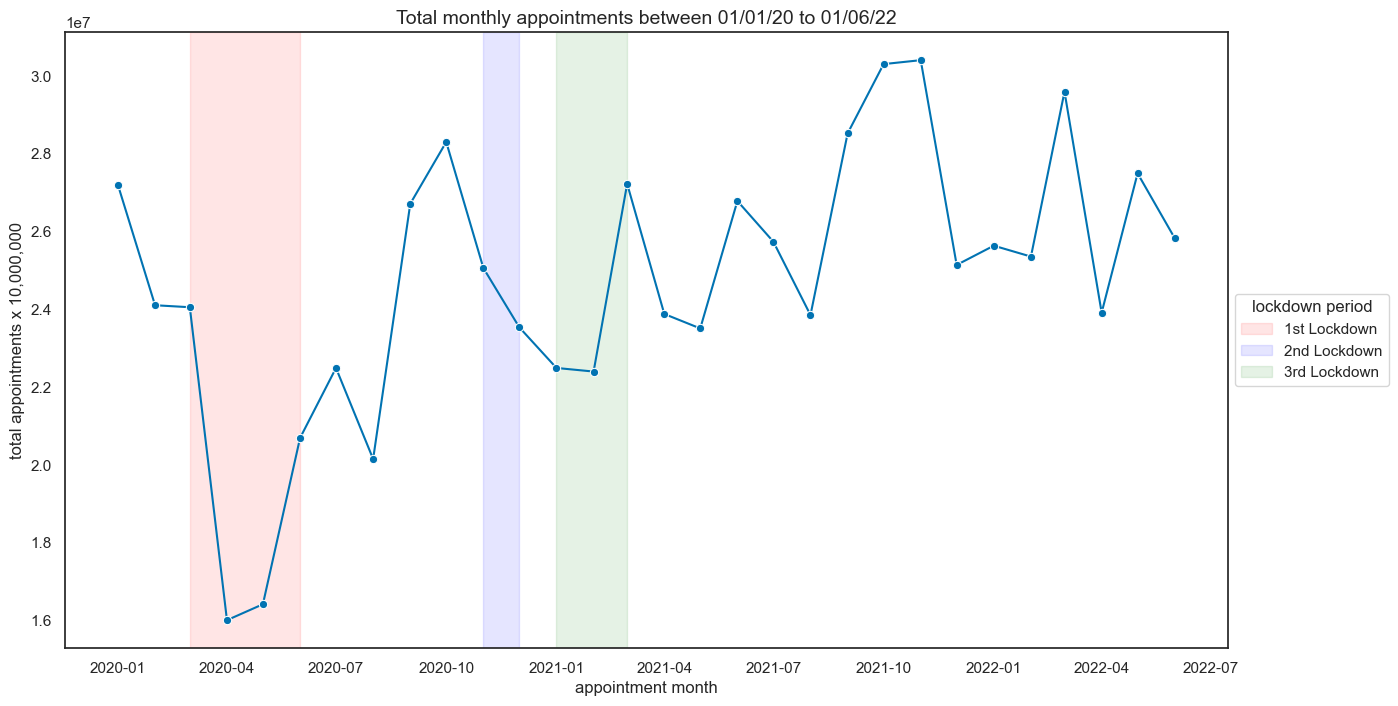

In [477]:
# create a line plot to see trends by appointment month

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create the line plot
sns.lineplot(data = ar_appt_by_month_series, x='Appointment Month', y='Total Appointments', marker='o')

# set title
plt.title('Total monthly appointments between 01/01/20 to 01/06/22', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# Add vertical annotation lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='lockdown period')

> Drop in total appointments at the start of the 1st lockdown (march 2020). Drop in total appointments in Oct 2020 to Feb 2021 due to covid measures.

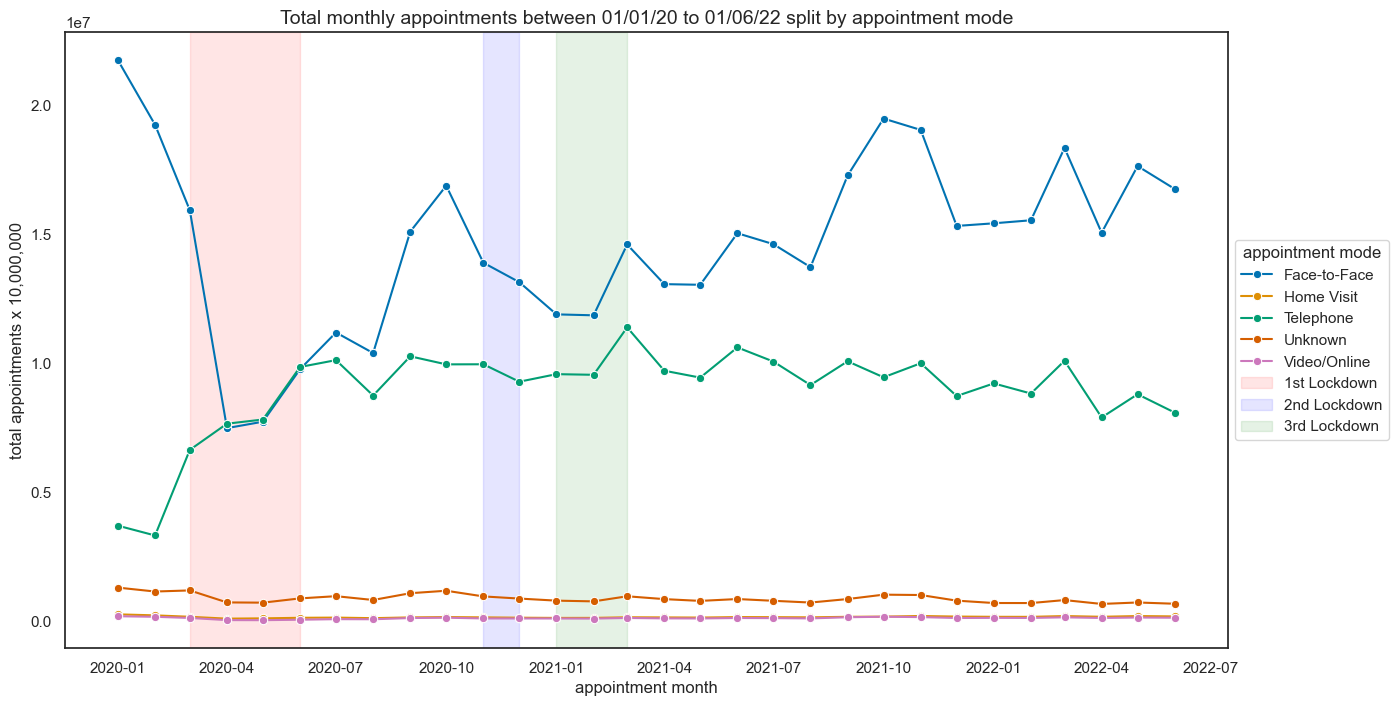

In [479]:
# create a lineplot to understand monthly appointments by appointment mode

# group total appointments by appointment month and mode
ar_appt_by_mode_monthly = ar_new.groupby(['appointment_month','appointment_mode'])['count_of_appointments'].sum().reset_index()\
                                .rename(columns={'count_of_appointments':'Total Appointments'})

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create the line plot
sns.lineplot(data=ar_appt_by_mode_monthly, x='appointment_month', y='Total Appointments', hue='appointment_mode',marker='o')

# set title
plt.title('Total monthly appointments between 01/01/20 to 01/06/22 split by appointment mode', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='appointment mode')

> Drop in face-to-face appointments in March 2020 (1st lockdown) and  rise of telephone appointments.

In [481]:
# explore 'face-to-face' and 'telephone' appointments in more detail

# subset data where appointment mode is either Face to Face or Telephone only
ar_mode_face_tel = ar_new[ar_new['appointment_mode'].isin(['Face-to-Face', 'Telephone'])]

# group total appointments by appointment month and mode
ar_appt_by_face_tel = ar_mode_face_tel.groupby(['appointment_month','appointment_mode'])[['count_of_appointments']]\
                                      .sum().reset_index().rename(columns={'count_of_appointments':'Total Appointments'})

# view the df
ar_appt_by_face_tel

appointment_month appointment_mode  Total Appointments
0         2020-01-01     Face-to-Face            21733394
1         2020-01-01        Telephone             3701775
2         2020-02-01     Face-to-Face            19230573
3         2020-02-01        Telephone             3322242
4         2020-03-01     Face-to-Face            15921794
5         2020-03-01        Telephone             6637656
6         2020-04-01     Face-to-Face             7480941
7         2020-04-01        Telephone             7652390
8         2020-05-01     Face-to-Face             7729597
9         2020-05-01        Telephone             7813734
10        2020-06-01     Face-to-Face             9763381
11        2020-06-01        Telephone             9849385
12        2020-07-01     Face-to-Face            11184673
13        2020-07-01        Telephone            10114285
14        2020-08-01     Face-to-Face            10388825
15        2020-08-01        Telephone             8742071
16        2020-09-01     Face-to-Face            15092880
17        2020-09-01        Telephone            10262198
18        2020-10-01     Face-to-Face            16870816
19        2020-10-01        Telephone             9950370
20        2020-11-01     Face-to-Face            13886990
21        2020-11-01        Telephone             9954012
22        2020-12-01     Face-to-Face            13133882
23        2020-12-01        Telephone             9278556
24        2021-01-01     Face-to-Face            11887083
25        2021-01-01        Telephone             9571141
26        2021-02-01     Face-to-Face            11850255
27        2021-02-01        Telephone             9546051
28        2021-03-01     Face-to-Face            14593975
29        2021-03-01        Telephone            11383424
30        2021-04-01     Face-to-Face            13058306
31        2021-04-01        Telephone             9704359
32        2021-05-01     Face-to-Face            13032902
33        2021-05-01        Telephone             9436985
34        2021-06-01     Face-to-Face            15030018
35        2021-06-01        Telephone            10606719
36        2021-07-01     Face-to-Face            14607857
37        2021-07-01        Telephone            10060423
38        2021-08-01     Face-to-Face            13717325
39        2021-08-01        Telephone             9149072
40        2021-09-01     Face-to-Face            17266602
41        2021-09-01        Telephone            10068770
42        2021-10-01     Face-to-Face            19471561
43        2021-10-01        Telephone             9449544
44        2021-11-01     Face-to-Face            19031327
45        2021-11-01        Telephone             9993842
46        2021-12-01     Face-to-Face            15312340
47        2021-12-01        Telephone             8723325
48        2022-01-01     Face-to-Face            15414102
49        2022-01-01        Telephone             9212553
50        2022-02-01     Face-to-Face            15531971
51        2022-02-01        Telephone             8820538
52        2022-03-01     Face-to-Face            18333743
53        2022-03-01        Telephone            10088419
54        2022-04-01     Face-to-Face            15049567
55        2022-04-01        Telephone             7893805
56        2022-05-01     Face-to-Face            17630858
57        2022-05-01        Telephone             8792743
58        2022-06-01     Face-to-Face            16744191
59        2022-06-01        Telephone             8082270

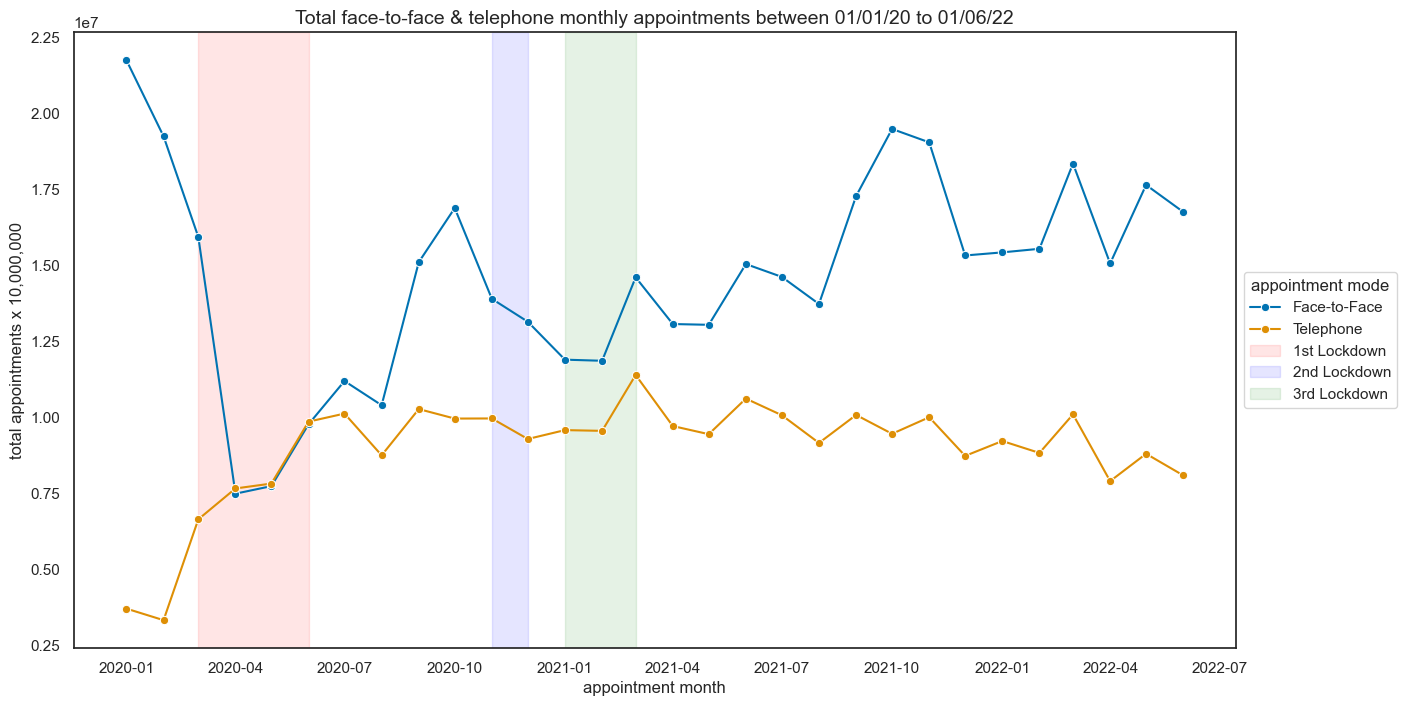

In [482]:
# create lineplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=ar_appt_by_face_tel, x='appointment_month', y='Total Appointments',hue='appointment_mode',marker='o')
               
# set title
plt.title('Total face-to-face & telephone monthly appointments between 01/01/20 to 01/06/22', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='appointment mode')

> Note - As Face-to-Face and Telephone appointments account for the most appointments by mode, our analysis will focus on these 2 modes mainly

In [484]:
# explore ratio of face to face and telephone appointments
ar_appt_by_face_tel['Percentage Split'] = (ar_appt_by_face_tel['Total Appointments']/
                                                ar_appt_by_face_tel.groupby(['appointment_month'])['Total Appointments']\
                                                .transform('sum')*100).round(2)

# view the df
ar_appt_by_face_tel

appointment_month appointment_mode  Total Appointments  Percentage Split
0         2020-01-01     Face-to-Face            21733394             85.45
1         2020-01-01        Telephone             3701775             14.55
2         2020-02-01     Face-to-Face            19230573             85.27
3         2020-02-01        Telephone             3322242             14.73
4         2020-03-01     Face-to-Face            15921794             70.58
5         2020-03-01        Telephone             6637656             29.42
6         2020-04-01     Face-to-Face             7480941             49.43
7         2020-04-01        Telephone             7652390             50.57
8         2020-05-01     Face-to-Face             7729597             49.73
9         2020-05-01        Telephone             7813734             50.27
10        2020-06-01     Face-to-Face             9763381             49.78
11        2020-06-01        Telephone             9849385             50.22
12        2020-07-01     Face-to-Face            11184673             52.51
13        2020-07-01        Telephone            10114285             47.49
14        2020-08-01     Face-to-Face            10388825             54.30
15        2020-08-01        Telephone             8742071             45.70
16        2020-09-01     Face-to-Face            15092880             59.53
17        2020-09-01        Telephone            10262198             40.47
18        2020-10-01     Face-to-Face            16870816             62.90
19        2020-10-01        Telephone             9950370             37.10
20        2020-11-01     Face-to-Face            13886990             58.25
21        2020-11-01        Telephone             9954012             41.75
22        2020-12-01     Face-to-Face            13133882             58.60
23        2020-12-01        Telephone             9278556             41.40
24        2021-01-01     Face-to-Face            11887083             55.40
25        2021-01-01        Telephone             9571141             44.60
26        2021-02-01     Face-to-Face            11850255             55.38
27        2021-02-01        Telephone             9546051             44.62
28        2021-03-01     Face-to-Face            14593975             56.18
29        2021-03-01        Telephone            11383424             43.82
30        2021-04-01     Face-to-Face            13058306             57.37
31        2021-04-01        Telephone             9704359             42.63
32        2021-05-01     Face-to-Face            13032902             58.00
33        2021-05-01        Telephone             9436985             42.00
34        2021-06-01     Face-to-Face            15030018             58.63
35        2021-06-01        Telephone            10606719             41.37
36        2021-07-01     Face-to-Face            14607857             59.22
37        2021-07-01        Telephone            10060423             40.78
38        2021-08-01     Face-to-Face            13717325             59.99
39        2021-08-01        Telephone             9149072             40.01
40        2021-09-01     Face-to-Face            17266602             63.17
41        2021-09-01        Telephone            10068770             36.83
42        2021-10-01     Face-to-Face            19471561             67.33
43        2021-10-01        Telephone             9449544             32.67
44        2021-11-01     Face-to-Face            19031327             65.57
45        2021-11-01        Telephone             9993842             34.43
46        2021-12-01     Face-to-Face            15312340             63.71
47        2021-12-01        Telephone             8723325             36.29
48        2022-01-01     Face-to-Face            15414102             62.59
49        2022-01-01        Telephone             9212553             37.41
50        2022-02-01     Face-to-Face            15531971             63.78
51        2022-02-01        Telephone             8

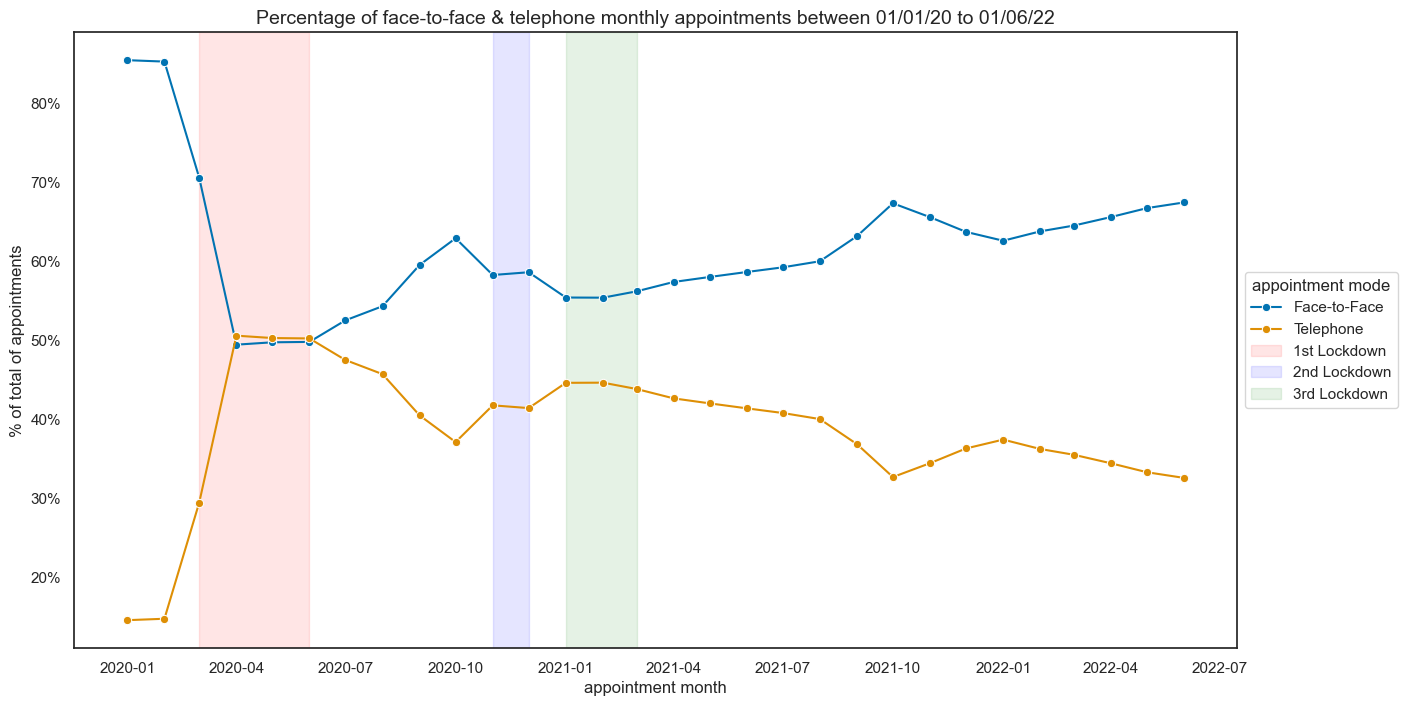

In [485]:
# create lineplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=ar_appt_by_face_tel, x='appointment_month', y='Percentage Split',hue='appointment_mode',marker='o')
               
# set title
plt.title('Percentage of face-to-face & telephone monthly appointments between 01/01/20 to 01/06/22', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('% of total of appointments', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='appointment mode')

> Interesting to see how telephone appointments went from c15% in Jan20 to more common that face to face appointments in April20 c50%. But after the first lockdown, face to face appointments have increased and telephone appointments have seen a decline. Also note the dip in telephone appointments in oct20 and oct21.

In [487]:
# explore face to face and telephone appointments by region

# group total appointments by appointment month,region,mode
ar_face_tel_region = ar_mode_face_tel.groupby(['appointment_month','region_name','appointment_mode'])[['count_of_appointments']]\
                                     .sum().reset_index().rename(columns={'appointment_month':'Appointment Month',
                                                                          'appointment_mode':'Appointment Mode',
                                                                          'count_of_appointments':'Total Appointments',
                                                                          'region_name' : 'Region Name'})

# calculate % split of face-to-face and telephone per month and region
ar_face_tel_region['Percentage Split'] = (ar_face_tel_region['Total Appointments']/
                                               ar_face_tel_region.groupby(['Appointment Month','Region Name'])\
                                               ['Total Appointments'].transform('sum')*100).round(2)

# create the pivot
ar_face_tel_region_pivot = ar_face_tel_region.pivot(index=['Appointment Month', 'Region Name'], columns='Appointment Mode', 
                                                    values='Percentage Split')

# view the pivot
ar_face_tel_region_pivot.head(14)

Appointment Mode                            Face-to-Face  Telephone
Appointment Month Region Name                                      
2020-01-01        East of England                  86.56      13.44
                  London                           84.40      15.60
                  Midlands                         86.66      13.34
                  North East and Yorkshire         88.09      11.91
                  North West                       87.09      12.91
                  South East                       82.52      17.48
                  South West                       81.73      18.27
2020-02-01        East of England                  86.47      13.53
                  London                           84.06      15.94
                  Midlands                         86.62      13.38
                  North East and Yorkshire         88.02      11.98
                  North West                       86.81      13.19
                  South East                       82.12      17.88
                  South West                       81.73      18.27

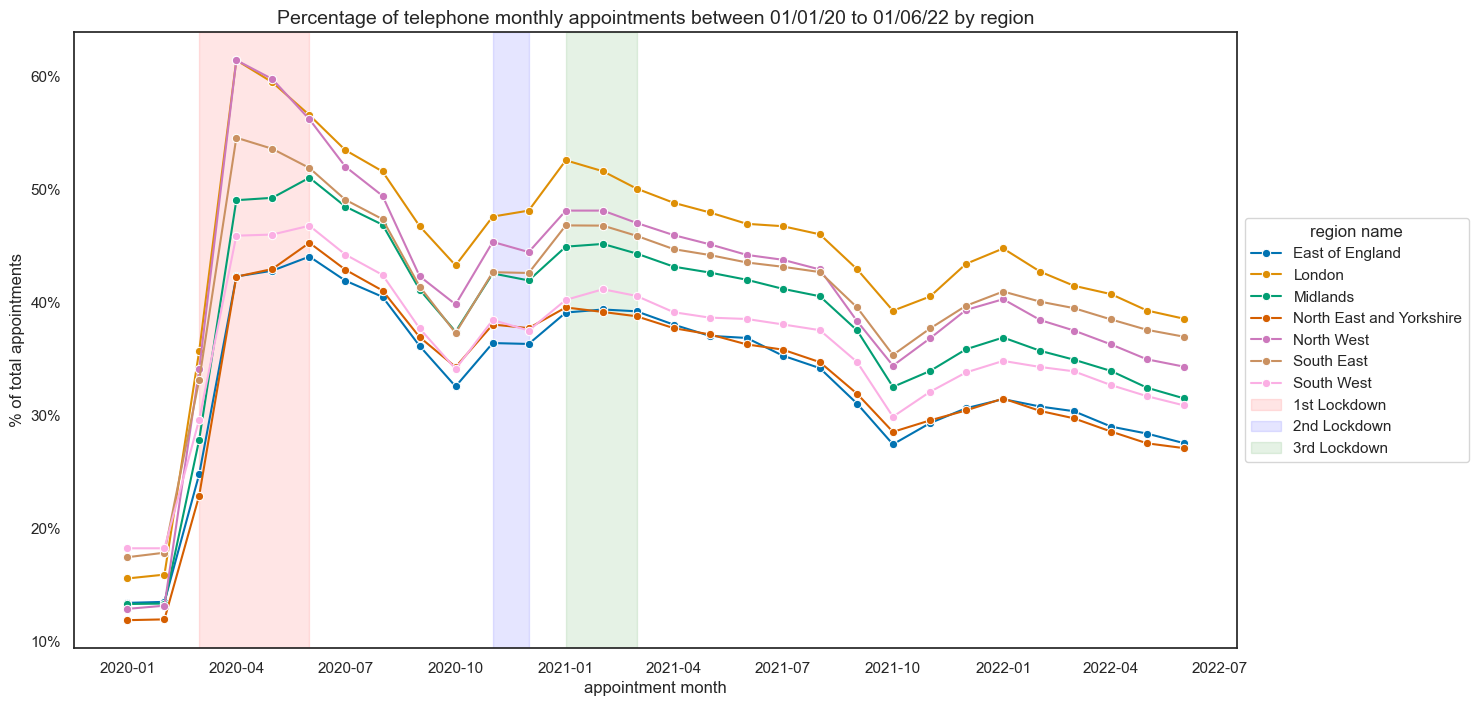

In [488]:
# explore telephone % by region independently

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()
 
# create line plot
sns.lineplot(data=ar_face_tel_region[ar_face_tel_region['Appointment Mode'] == 'Telephone'],
             x='Appointment Month',y='Percentage Split', hue='Region Name', marker='o')

# set title
plt.title('Percentage of telephone monthly appointments between 01/01/20 to 01/06/22 by region', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('% of total appointments', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='region name')

> London has the greatest percentage of telephone appointments but North West peaked over 60% in April20

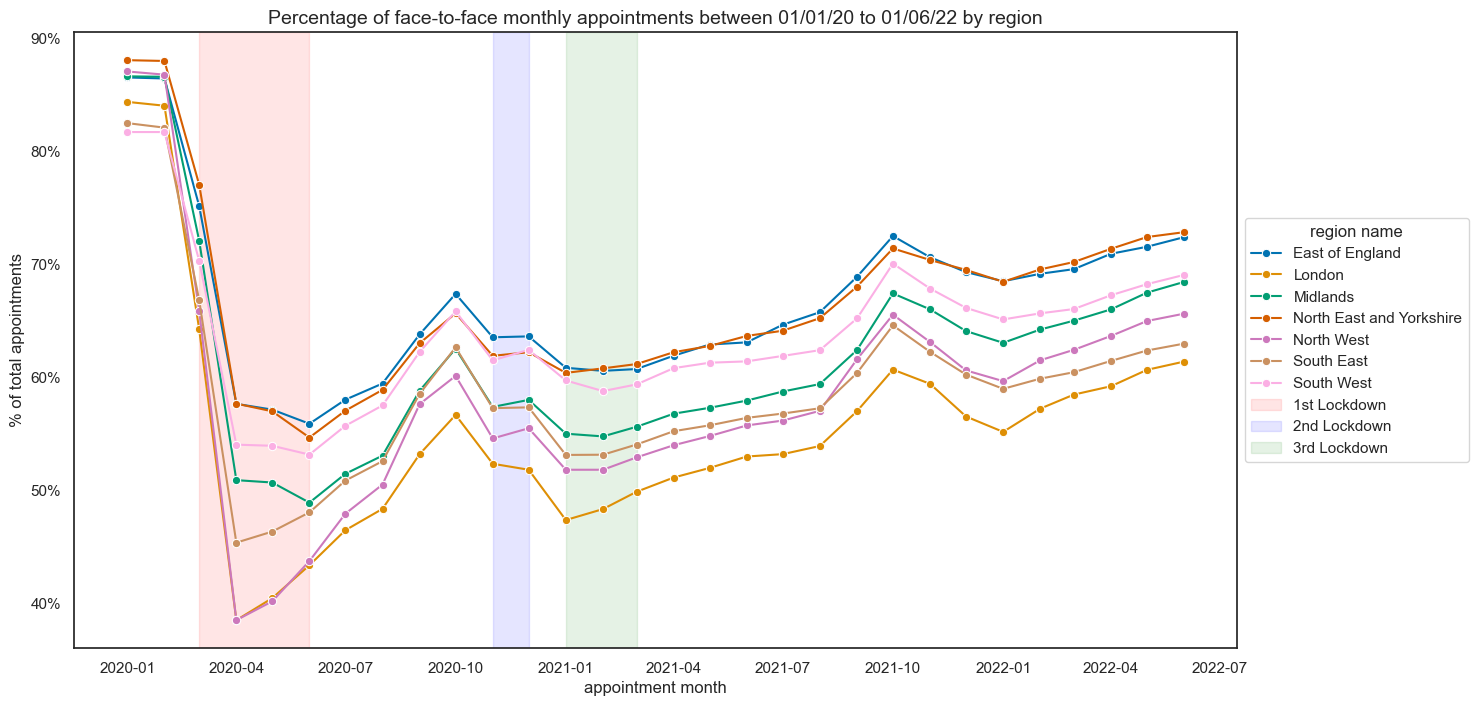

In [490]:
# explore face-to-face % by region independently

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()
 
# create line plot
sns.lineplot(data=ar_face_tel_region[ar_face_tel_region['Appointment Mode'] == 'Face-to-Face'],
             x='Appointment Month',y='Percentage Split', hue='Region Name', marker='o')

# set title
plt.title('Percentage of face-to-face monthly appointments between 01/01/20 to 01/06/22 by region', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('% of total appointments', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),title='region name')

> Huge decline for face to face appointments across all regions at the start of the first lockdown, with East of England leading the way with the most face-to-face appointments, peaking at c70% in Oct21. North West, Midlands, South west interestingly saw a rise in face-to-face appointments in the second lockdown, and nearly all regions saw an increase in face-to-face appointments in the third lockdown

In [492]:
# explore distribution of face-to-face appointments at icb level

# group total appointments by month,region,icb,mode
ar_face_tel_icb = ar_mode_face_tel.groupby(['appointment_month','region_name','icb_name','appointment_mode'])\
                              [['count_of_appointments']].sum().reset_index().rename(columns={'count_of_appointments':'Total Appointments'})
                                                               
# calculate % split of face-to-face appointments per month,region,icb
ar_face_tel_icb['Percentage Split'] = (ar_face_tel_icb['Total Appointments']\
                                       /ar_face_tel_icb.groupby(['appointment_month','region_name','icb_name'])\
                                        ['Total Appointments'].transform('sum')*100).round(2)

# view the df
ar_face_tel_icb

appointment_month      region_name  \
0           2020-01-01  East of England   
1           2020-01-01  East of England   
2           2020-01-01  East of England   
3           2020-01-01  East of England   
4           2020-01-01  East of England   
...                ...              ...   
2515        2022-06-01       South West   
2516        2022-06-01       South West   
2517        2022-06-01       South West   
2518        2022-06-01       South West   
2519        2022-06-01       South West   

                                       icb_name appointment_mode  \
0     NHS Bedfordshire, Luton and Milton Keynes     Face-to-Face   
1     NHS Bedfordshire, Luton and Milton Keynes        Telephone   
2           NHS Cambridgeshire and Peterborough     Face-to-Face   
3           NHS Cambridgeshire and Peterborough        Telephone   
4              NHS Hertfordshire and West Essex     Face-to-Face   
...                                         ...              ...   
2515                                 NHS Dorset        Telephone   
2516                        NHS Gloucestershire     Face-to-Face   
2517                        NHS Gloucestershire        Telephone   
2518                               NHS Somerset     Face-to-Face   
2519                               NHS Somerset        Telephone   

      Total Appointments  Percentage Split  
0                 378903             88.14  
1                  50996             11.86  
2                 372353             80.16  
3                  92181             19.84  
4                 520280             87.53  
...                  ...               ...  
2515               74274             21.31  
2516              232672             75.36  
2517               76058             24.64  
2518              133479             60.68  
2519               86482             39.32  

[2520 rows x 6 columns]

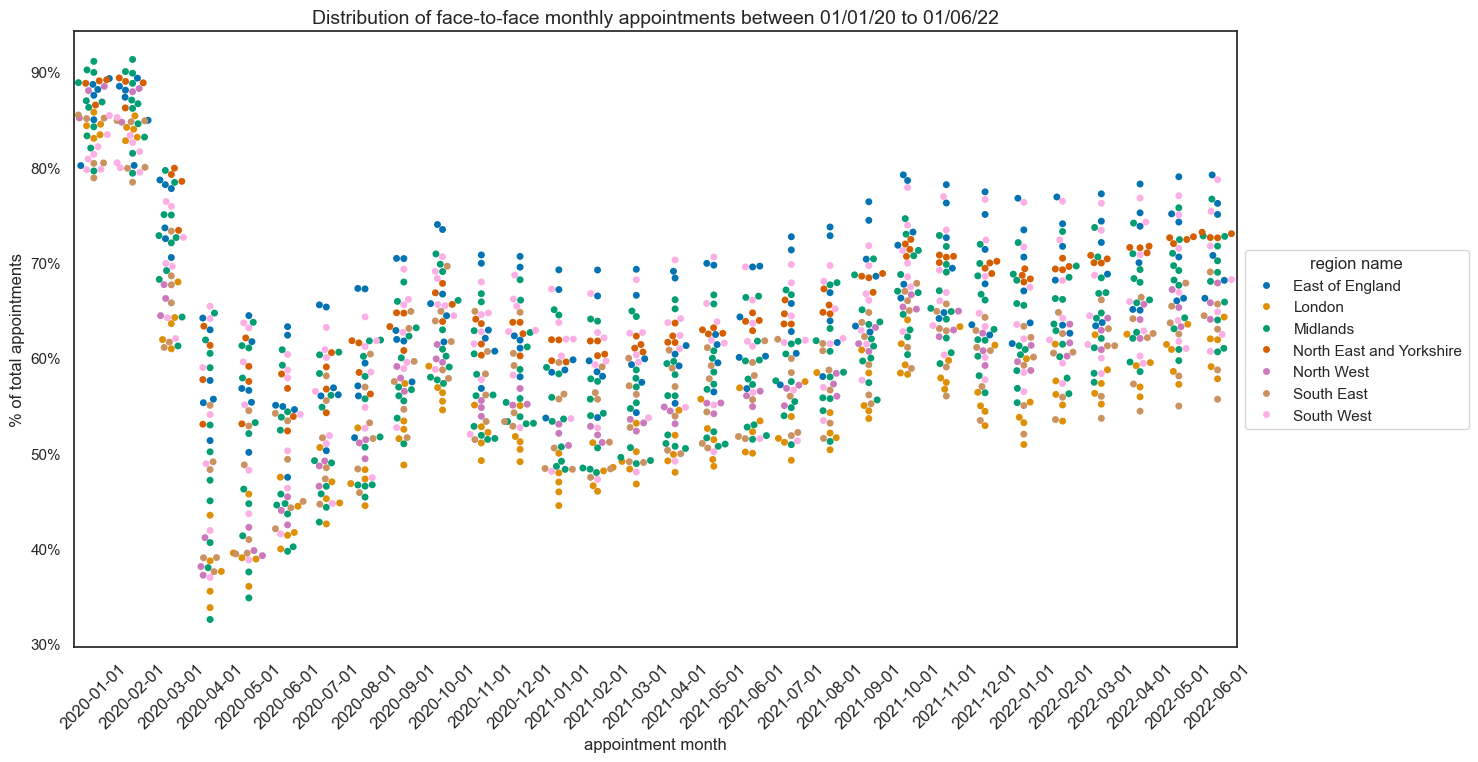

In [493]:
# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create swarm plot
sns.swarmplot(data=ar_face_tel_icb[ar_face_tel_icb['appointment_mode'] == 'Face-to-Face'],\
              x='appointment_month',y='Percentage Split', hue='region_name')

# set title
plt.title('Distribution of face-to-face monthly appointments between 01/01/20 to 01/06/22', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('% of total appointments', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# set x ticks for easier readability
plt.xticks(fontsize=12, rotation=45)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='region name')

> As the 1st lockdown came into force, we can see the decline in face to face appointments, but from the above graph we can see that ICBs mainly in the London region were ones with the lowest % of total appointments

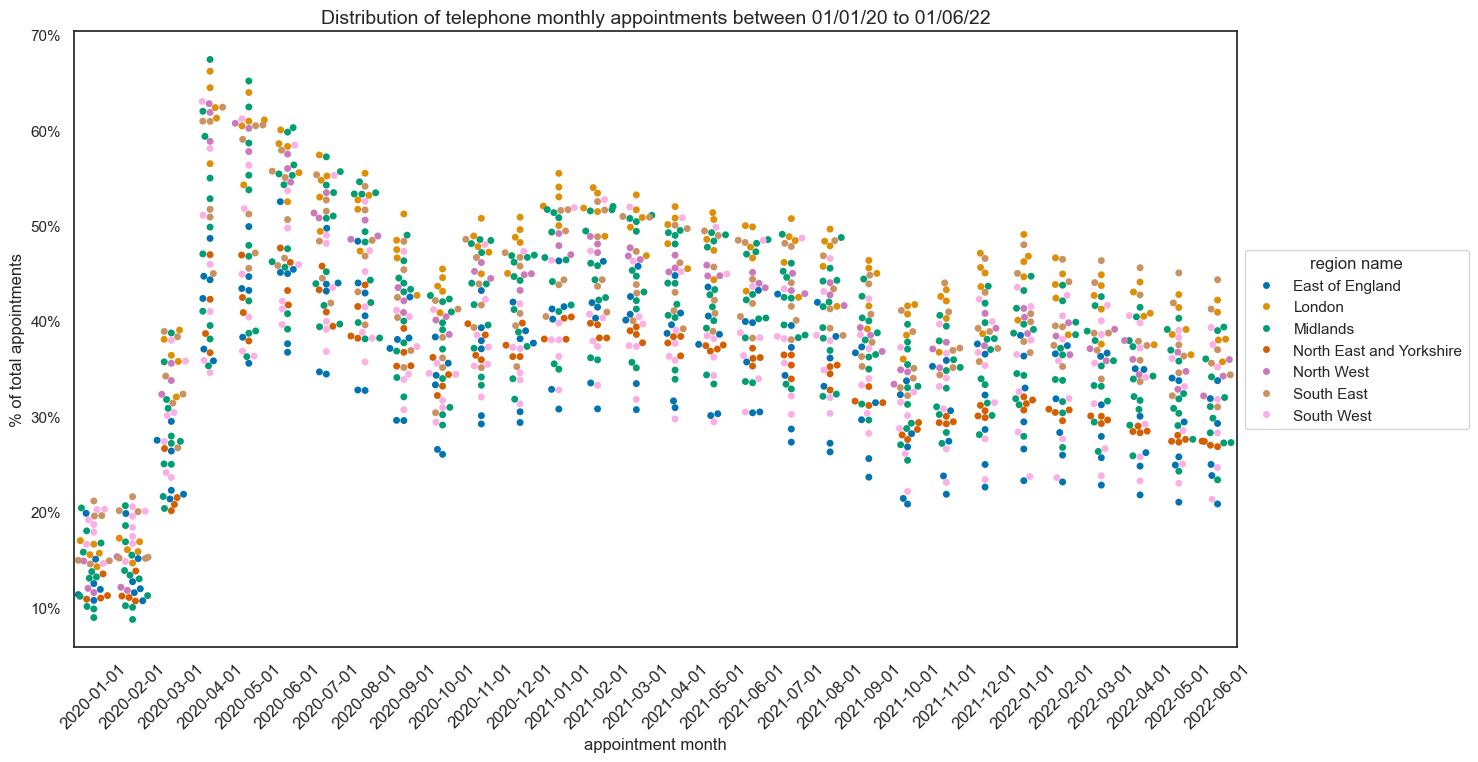

In [495]:
# explore distribution of Telephone appointments at icb level

# group total appointment by month,region,icb,mode
ar_face_tel_icb = ar_mode_face_tel.groupby(['appointment_month','region_name','icb_name','appointment_mode'])\
                              [['count_of_appointments']].sum().reset_index().rename(columns={'count_of_appointments':'Total Appointments'})
                                                               
# calculate % split of face-to-face appointments per month,region,icb
ar_face_tel_icb['Percentage Split'] = (ar_face_tel_icb['Total Appointments']\
                                       /ar_face_tel_icb.groupby(['appointment_month','region_name','icb_name'])\
                                        ['Total Appointments'].transform('sum')*100).round(2)

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create swarm plot
sns.swarmplot(data=ar_face_tel_icb[ar_face_tel_icb['appointment_mode'] == 'Telephone'],\
              x='appointment_month',y='Percentage Split', hue='region_name')

# set title
plt.title('Distribution of telephone monthly appointments between 01/01/20 to 01/06/22', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('% of total appointments', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# set x ticks for easier readability
plt.xticks(fontsize=12, rotation=45)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='region name')

> In contrast to the face-to-face graph, as the 1st lockdown came into force, we see the rise in telelphone appointments, mainly dominated by ICBS in the London region

## Appointment status analysis

> ### Note - For more accurate insights, we will only focus on appointment status = [Attended,DNA] i.e exclude unknowns

In [499]:
# subset the data for only attended and did not attend(dna) to work out attendance rates ('unknown' is not useful)
ar_appt_status_new = ar_new[ar_new['appointment_status'].isin(['Attended','DNA'])]

In [500]:
# group totalappointments by appointment month and status
ar_appt_status_series = ar_appt_status_new.groupby(['appointment_month','appointment_status'])[['count_of_appointments']].sum().reset_index()\
                                          .rename(columns={'count_of_appointments':'Total Appointments'})
                                                           
# add a new column to work out % split between of attended vs not attended
ar_appt_status_series['Percentage Split'] = (ar_appt_status_series['Total Appointments']/ar_appt_status_series.groupby(['appointment_month'])\
                                                                                        ['Total Appointments'].transform('sum')*100).round(2)

# view the df
ar_appt_status_series

appointment_month appointment_status  Total Appointments  Percentage Split
0         2020-01-01           Attended            24538291             94.98
1         2020-01-01                DNA             1298269              5.02
2         2020-02-01           Attended            21640067             94.68
3         2020-02-01                DNA             1215154              5.32
4         2020-03-01           Attended            20718865             94.67
5         2020-03-01                DNA             1166314              5.33
6         2020-04-01           Attended            13982824             96.69
7         2020-04-01                DNA              478766              3.31
8         2020-05-01           Attended            14962850             97.09
9         2020-05-01                DNA              449057              2.91
10        2020-06-01           Attended            18943022             96.96
11        2020-06-01                DNA              594382              3.04
12        2020-07-01           Attended            20606888             96.72
13        2020-07-01                DNA              698327              3.28
14        2020-08-01           Attended            18438932             96.50
15        2020-08-01                DNA              669462              3.50
16        2020-09-01           Attended            23988492             95.44
17        2020-09-01                DNA             1145971              4.56
18        2020-10-01           Attended            25529275             94.95
19        2020-10-01                DNA             1358138              5.05
20        2020-11-01           Attended            23072059             95.76
21        2020-11-01                DNA             1021408              4.24
22        2020-12-01           Attended            21592221             95.59
23        2020-12-01                DNA              996416              4.41
24        2021-01-01           Attended            20645718             95.82
25        2021-01-01                DNA              899833              4.18
26        2021-02-01           Attended            20736205             96.26
27        2021-02-01                DNA              804659              3.74
28        2021-03-01           Attended            25289991             96.33
29        2021-03-01                DNA              964719              3.67
30        2021-04-01           Attended            22056413             96.11
31        2021-04-01                DNA              893723              3.89
32        2021-05-01           Attended            21779605             96.12
33        2021-05-01                DNA              878219              3.88
34        2021-06-01           Attended            24815463             96.01
35        2021-06-01                DNA             1030367              3.99
36        2021-07-01           Attended            23761001             95.85
37        2021-07-01                DNA             1029665              4.15
38        2021-08-01           Attended            22081765             95.88
39        2021-08-01                DNA              949137              4.12
40        2021-09-01           Attended            25757066             95.12
41        2021-09-01                DNA             1321348              4.88
42        2021-10-01           Attended            27170506             94.55
43        2021-10-01                DNA             1565624              5.45
44        2021-11-01           Attended            27667665             95.09
45        2021-11-01                DNA             1428087              4.91
46        2021-12-01           Attended            22853483             95.02
47        2021-12-01                DNA             1198866              4.98
48        2022-01-01           Attended            23597196             95.64
49        2022-01-01                DNA             1076013              4.36
50        2022-02-01     

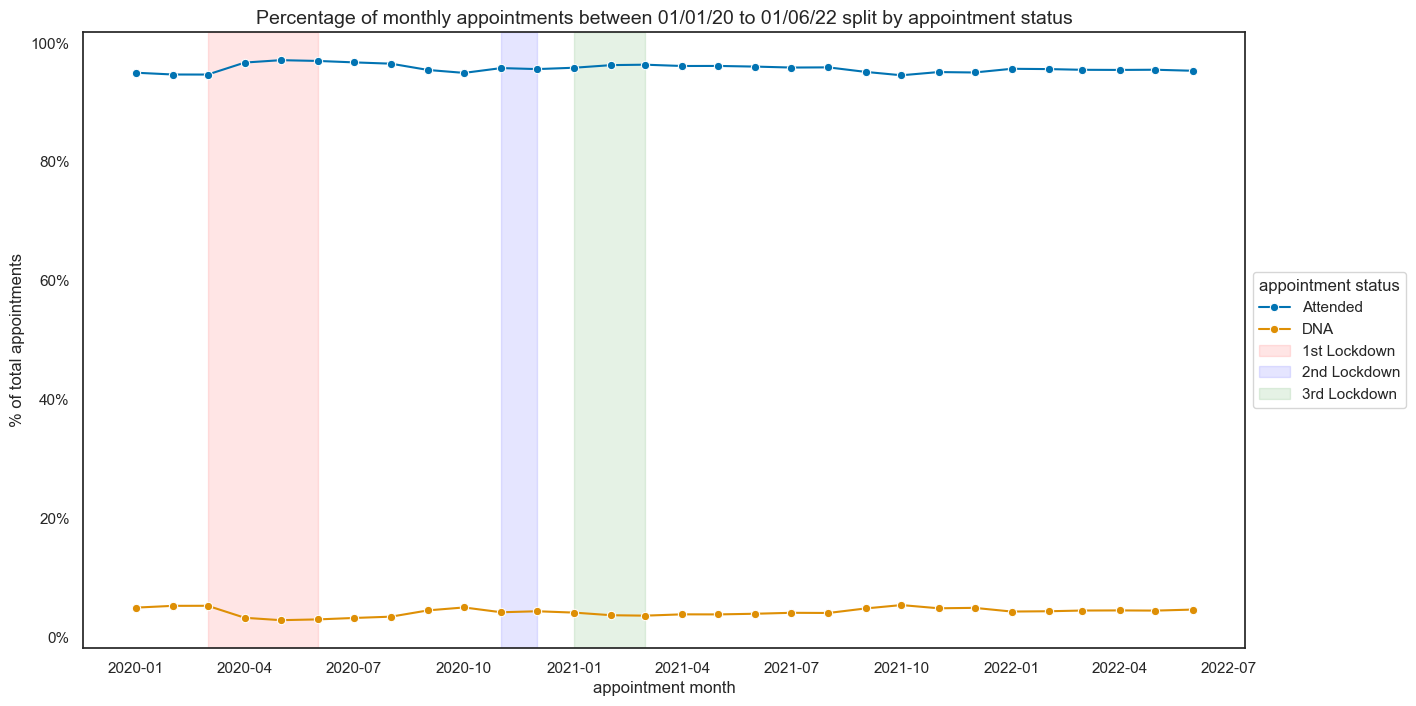

In [501]:
# create lineplot

# set the figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=ar_appt_status_series,x='appointment_month',y='Percentage Split', hue='appointment_status',marker='o')

# set title
plt.title('Percentage of monthly appointments between 01/01/20 to 01/06/22 split by appointment status', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('% of total appointments', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='appointment status')

> Attendance for telephone and face to face appointments was generally consistent between 01/20 and 06/22. in general c91% appointments were attended, and c4% did not attend. small rise in attended appointments in first lockdown.

In [503]:
# % OF ATTENDED APPOINTMENTS BY WAIT TIME AND APPOINTMENT MODE 

# subset the data for:
# exlude appointment status = 'unknown'
# include appointment mode = 'face-to-face' and 'telephone' appointments only
# exclude time between book and appointment = 'unknown/data quality'

# subset data based on above conditions
ar_mode_wait_att = ar_new.loc[(ar_new['appointment_status'] != 'Unknown') &\
                             (ar_new['appointment_mode'].isin(['Face-to-Face', 'Telephone'])) &\
                             (ar_new['time_between_book_and_appointment'] != 'Unknown / Data Quality')]

# group total appointments by icb,wait time,mode,status
ar_mode_wait_att_grouped = ar_mode_wait_att.groupby(['icb_name','time_between_book_and_appointment','appointment_mode','appointment_status'])\
                                           ['count_of_appointments'].sum().reset_index()\
                                           .rename(columns={'count_of_appointments':'Total Appointments'})
                                                                                                                     
# pivot the data to get attended vs total
attendance_pivot = ar_mode_wait_att_grouped.pivot_table(index=['icb_name','time_between_book_and_appointment','appointment_mode'],
                                                        columns = 'appointment_status',
                                                        values = 'Total Appointments',
                                                        fill_value = 0).reset_index()

# calculate attendance %
attendance_pivot['attendance_percentage'] = ((attendance_pivot.get('Attended', 0) / 
                                            (attendance_pivot.get('Attended', 0) + attendance_pivot.get('DNA', 0))) * 100).round(2)

# view the df
attendance_pivot

appointment_status                                                 icb_name  \
0                   NHS Bath and North East Somerset, Swindon and Wiltshire   
1                   NHS Bath and North East Somerset, Swindon and Wiltshire   
2                   NHS Bath and North East Somerset, Swindon and Wiltshire   
3                   NHS Bath and North East Somerset, Swindon and Wiltshire   
4                   NHS Bath and North East Somerset, Swindon and Wiltshire   
..                                                                      ...   
583                                                      NHS West Yorkshire   
584                                                      NHS West Yorkshire   
585                                                      NHS West Yorkshire   
586                                                      NHS West Yorkshire   
587                                                      NHS West Yorkshire   

appointment_status time_between_book_and_appointment appointment_mode  \
0                                              1 Day     Face-to-Face   
1                                              1 Day        Telephone   
2                                     15  to 21 Days     Face-to-Face   
3                                     15  to 21 Days        Telephone   
4                                        2 to 7 Days     Face-to-Face   
..                                               ...              ...   
583                                    8  to 14 Days        Telephone   
584                                More than 28 Days     Face-to-Face   
585                                More than 28 Days        Telephone   
586                                         Same Day     Face-to-Face   
587                                         Same Day        Telephone   

appointment_status   Attended       DNA  attendance_percentage  
0                    637109.0   24485.0                  96.30  
1                    290596.0    1315.0                  99.55  
2                    671217.0   47969.0                  93.33  
3                    155883.0    2070.0                  98.69  
4                   1836848.0   92900.0                  95.19  
..                        ...       ...                    ...  
583                  770259.0   13701.0                  98.25  
584                  877931.0  112905.0                  88.61  
585                  117318.0    3085.0                  97.44  
586                 8480253.0  101130.0                  98.82  
587                 7133303.0   25271.0                  99.65  

[588 rows x 6 columns]

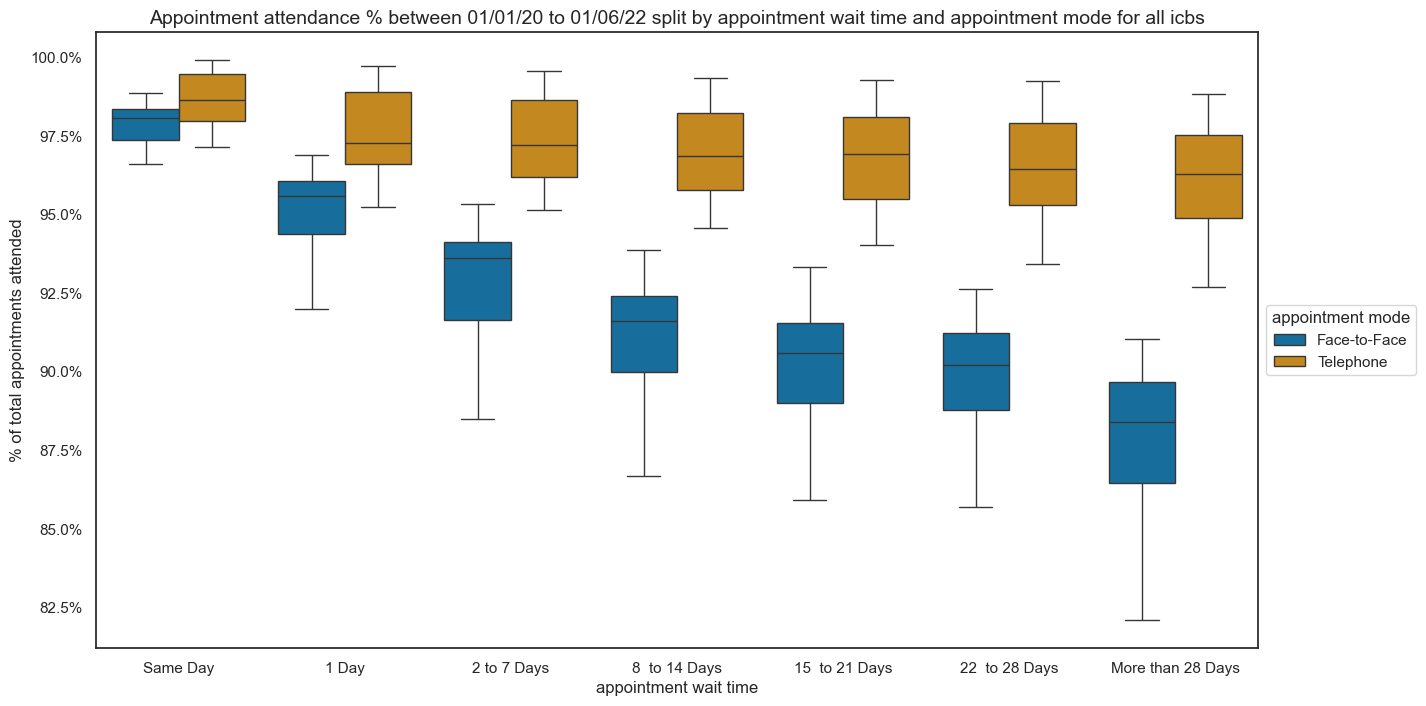

In [504]:
# create boxplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create box plot
sns.boxplot(data=attendance_pivot,x='time_between_book_and_appointment',y='attendance_percentage',hue='appointment_mode',
            order = ['Same Day','1 Day','2 to 7 Days','8  to 14 Days','15  to 21 Days','22  to 28 Days','More than 28 Days'])

# set title
plt.title('Appointment attendance % between 01/01/20 to 01/06/22 split by appointment wait time and appointment mode for all icbs', fontsize=14)

# set x and y labels
plt.xlabel('appointment wait time', fontsize=12)
plt.ylabel('% of total appointments attended', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='appointment mode')

> Attendance rates are higher for phone appointments across all wait times, but as appointment wait time increases, the gap between telephone attendance and face to face attendance increases. This suggests shorter wait times lead higher attendance

In [506]:
# BIVARIATE ANALYSIS - % OF ATTENDED APPOINTMENTS BY WAIT TIME AND Region

# group total appointments by icb,region,wait time,status
ar_reg_wait_att_grouped = ar_mode_wait_att.groupby(['icb_name','region_name','time_between_book_and_appointment','appointment_status'])\
                                          ['count_of_appointments'].sum().reset_index()\
                                          .rename(columns={'count_of_appointments':'Total Appointments'})
                                                           
# pivot the data to get attended vs total
attendance_reg_wait_pivot = ar_reg_wait_att_grouped.pivot_table(index=['icb_name','region_name','time_between_book_and_appointment'],
                                                                columns = 'appointment_status',
                                                                values = 'Total Appointments',
                                                                fill_value = 0).reset_index()

# calculate attendance %
attendance_reg_wait_pivot['Attendance Percentage'] = ((attendance_reg_wait_pivot.get('Attended', 0) / 
                                                     (attendance_reg_wait_pivot.get('Attended', 0) + 
                                                      attendance_reg_wait_pivot.get('DNA', 0))) * 100).round(2)

# view the df
attendance_reg_wait_pivot

appointment_status                                                 icb_name  \
0                   NHS Bath and North East Somerset, Swindon and Wiltshire   
1                   NHS Bath and North East Somerset, Swindon and Wiltshire   
2                   NHS Bath and North East Somerset, Swindon and Wiltshire   
3                   NHS Bath and North East Somerset, Swindon and Wiltshire   
4                   NHS Bath and North East Somerset, Swindon and Wiltshire   
..                                                                      ...   
289                                                      NHS West Yorkshire   
290                                                      NHS West Yorkshire   
291                                                      NHS West Yorkshire   
292                                                      NHS West Yorkshire   
293                                                      NHS West Yorkshire   

appointment_status               region_name  \
0                                 South West   
1                                 South West   
2                                 South West   
3                                 South West   
4                                 South West   
..                                       ...   
289                 North East and Yorkshire   
290                 North East and Yorkshire   
291                 North East and Yorkshire   
292                 North East and Yorkshire   
293                 North East and Yorkshire   

appointment_status time_between_book_and_appointment    Attended       DNA  \
0                                              1 Day    927705.0   25800.0   
1                                     15  to 21 Days    827100.0   50039.0   
2                                        2 to 7 Days   2471240.0   97853.0   
3                                     22  to 28 Days    520469.0   35075.0   
4                                      8  to 14 Days   1515244.0   84971.0   
..                                               ...         ...       ...   
289                                      2 to 7 Days   6058552.0  303136.0   
290                                   22  to 28 Days    985418.0   92750.0   
291                                    8  to 14 Days   3350251.0  253954.0   
292                                More than 28 Days    995249.0  115990.0   
293                                         Same Day  15613556.0  126401.0   

appointment_status  Attendance Percentage  
0                                   97.29  
1                                   94.30  
2                                   96.19  
3                                   93.69  
4                                   94.69  
..                                    ...  
289                                 95.23  
290                                 91.40  
291                                 92.95  
292                                 89.56  
293                                 99.20  

[294 rows x 6 columns]

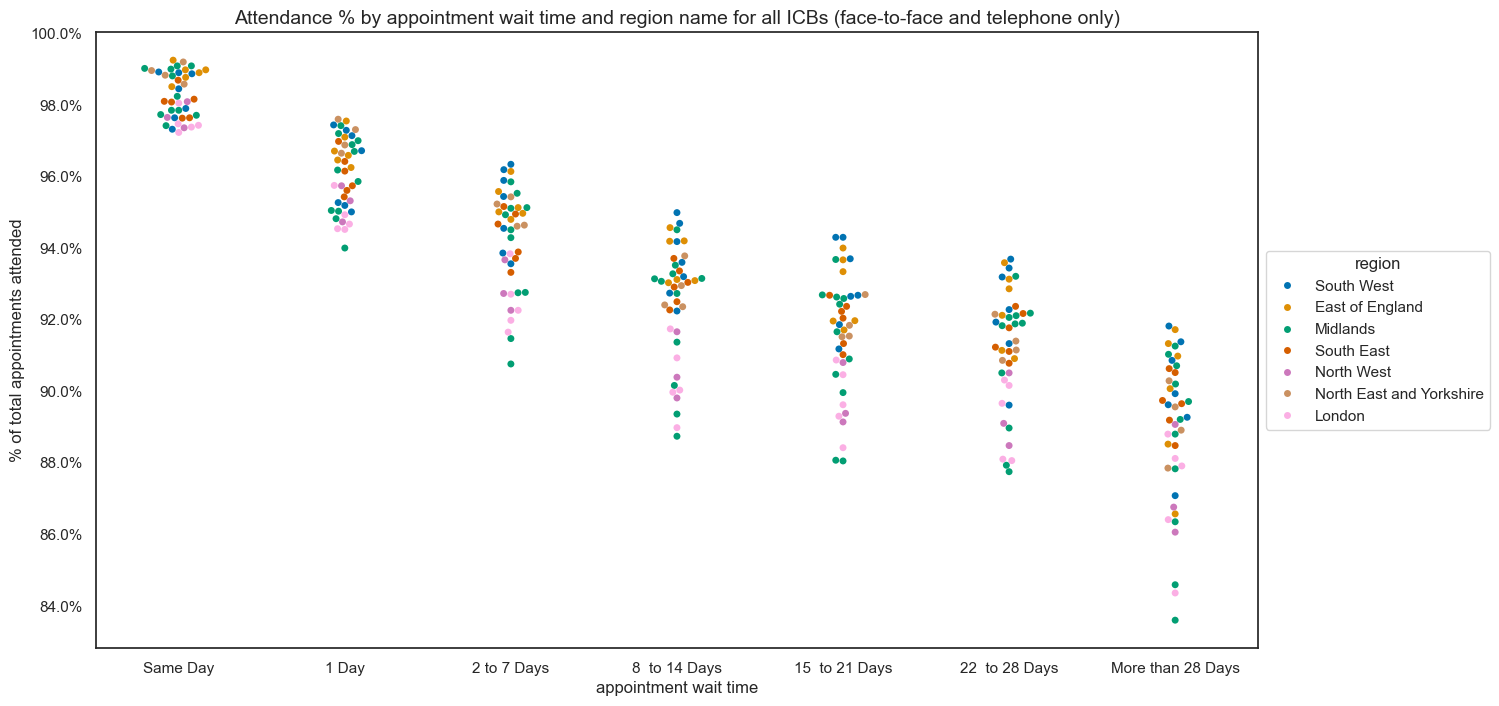

In [507]:
# create swarmplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create swarm plot
sns.swarmplot(data=attendance_reg_wait_pivot,x='time_between_book_and_appointment',y='Attendance Percentage',hue='region_name',
              order = ['Same Day','1 Day','2 to 7 Days','8  to 14 Days','15  to 21 Days','22  to 28 Days','More than 28 Days'])

# set title
plt.title('Attendance % by appointment wait time and region name for all ICBs (face-to-face and telephone only)', fontsize=14)

# set x and y labels
plt.xlabel('appointment wait time', fontsize=12)
plt.ylabel('% of total appointments attended', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='region')

> Attendance rates are higher for appointments with shorter wait times, across all ICB locations and regions.

In [509]:
# BIVARIATE ANALYSIS - % OF ATTENDED APPOINTMENTS BY MONTH AND APPOINTMENT MODE - LINE PLOT

# group total appointments by appointment month,mode,status
ar_att_mode_series = ar_mode_wait_att.groupby(['appointment_month','appointment_mode','appointment_status'])\
                                     ['count_of_appointments'].sum().reset_index()\
                                     .rename(columns={'count_of_appointments':'Total Appointments'})

# pivot the data to get attended vs total
attendance_mode_series_pivot = ar_att_mode_series.pivot_table(index=['appointment_month','appointment_mode'],
                                                              columns = 'appointment_status',
                                                              values = 'Total Appointments',
                                                              fill_value = 0).reset_index()

# calculate attendance %
attendance_mode_series_pivot['Attendance Percentage'] = ((attendance_mode_series_pivot.get('Attended', 0) / 
                                                       (attendance_mode_series_pivot.get('Attended', 0) + 
                                                        attendance_mode_series_pivot.get('DNA', 0))) * 100).round(2)

# view the df
attendance_mode_series_pivot

appointment_status appointment_month appointment_mode    Attended        DNA  \
0                         2020-01-01     Face-to-Face  19567940.0  1144469.0   
1                         2020-01-01        Telephone   3458660.0    76847.0   
2                         2020-02-01     Face-to-Face  17216899.0  1073226.0   
3                         2020-02-01        Telephone   3097589.0    72268.0   
4                         2020-03-01     Face-to-Face  13327599.0   961690.0   
5                         2020-03-01        Telephone   6171306.0   137583.0   
6                         2020-04-01     Face-to-Face   6052234.0   315424.0   
7                         2020-04-01        Telephone   7211883.0   130903.0   
8                         2020-05-01     Face-to-Face   6782252.0   272435.0   
9                         2020-05-01        Telephone   7421623.0   145124.0   
10                        2020-06-01     Face-to-Face   8658921.0   372744.0   
11                        2020-06-01        Telephone   9347220.0   182035.0   
12                        2020-07-01     Face-to-Face   9980743.0   457408.0   
13                        2020-07-01        Telephone   9589036.0   197058.0   
14                        2020-08-01     Face-to-Face   9276295.0   461085.0   
15                        2020-08-01        Telephone   8279597.0   169097.0   
16                        2020-09-01     Face-to-Face  13127967.0   889437.0   
17                        2020-09-01        Telephone   9698642.0   197539.0   
18                        2020-10-01     Face-to-Face  14732490.0  1104421.0   
19                        2020-10-01        Telephone   9519374.0   187606.0   
20                        2020-11-01     Face-to-Face  12480841.0   783831.0   
21                        2020-11-01        Telephone   9527739.0   185121.0   
22                        2020-12-01     Face-to-Face  11738114.0   772391.0   
23                        2020-12-01        Telephone   8870158.0   174467.0   
24                        2021-01-01     Face-to-Face  10588894.0   683734.0   
25                        2021-01-01        Telephone   9156743.0   167683.0   
26                        2021-02-01     Face-to-Face  10712132.0   597798.0   
27                        2021-02-01        Telephone   9141487.0   165219.0   
28                        2021-03-01     Face-to-Face  13281520.0   716308.0   
29                        2021-03-01        Telephone  10901138.0   201447.0   
30                        2021-04-01     Face-to-Face  11813512.0   667492.0   
31                        2021-04-01        Telephone   9269388.0   180793.0   
32                        2021-05-01     Face-to-Face  11852043.0   657354.0   
33                        2021-05-01        Telephone   9020684.0   179580.0   
34                        2021-06-01     Face-to-Face  13685466.0   772212.0   
35                        2021-06-01        Telephone  10121402.0   211030.0   
36                        2021-07-01     Face-to-Face  13235239.0   781982.0   
37                        2021-07-01        Telephone   9579241.0   205554.0   
38                        2021-08-01     Face-to-Face  12481558.0   725784.0   
39                        2021-08-01        Telephone   8724695.0   185850.0   
40                        2021-09-01     Face-to-Face  15142950.0  1066607.0   
41                        2021-09-01        Telephone   9576413.0   206549.0   
42                        2021-10-01     Face-to-Face  16983002.0  1314091.0   
43                        2021-10-01        Telephone   8979450.0   191535.0   
44                        2021-11-01     Face-to-Face  16951557.0  1168338.0   
45                        2021-11-01        Telephone   9498880.0   202353.0   
46                        2021-12-01     Face-to-Face  13598476.0   973623.0   
47                        2021-12-01        Telephone   8290784.0   176694.0   
48                        2022-01-01     Face-to-Face  13923060.0   853277.0   


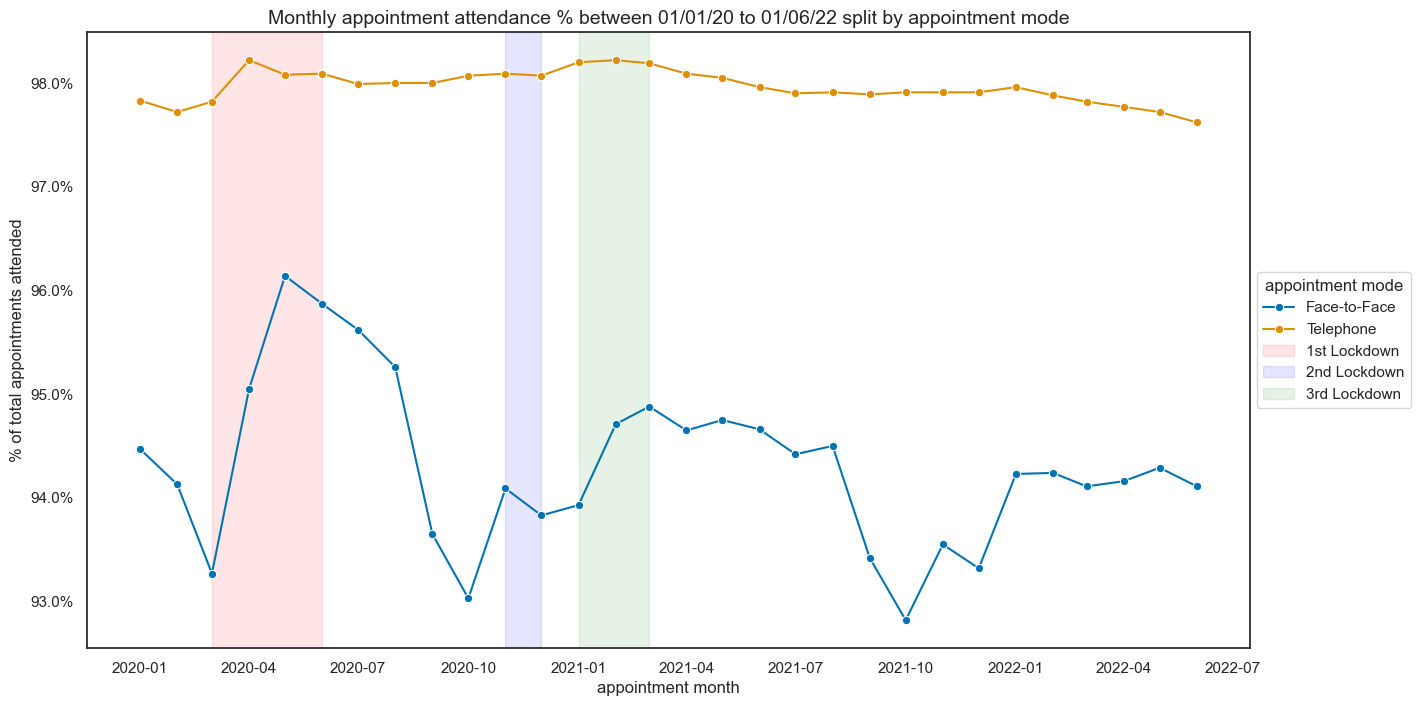

In [510]:
# create lineplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=attendance_mode_series_pivot,x='appointment_month',y='Attendance Percentage',hue='appointment_mode',errorbar=None,marker='o')

# set title
plt.title('Monthly appointment attendance % between 01/01/20 to 01/06/22 split by appointment mode', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('% of total appointments attended', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='appointment mode')

> Both face-to-face and telephone appointments have high attendance rates. considerable rise in face-to-face attendance in the first lockdown. after first lockdown, face-to-face appointments dropped considerably but telephone appointments remained consistent throughout period

In [512]:
# Wait Time vs. DNA Rate: Check if longer wait times correlate with higher DNA rates

# subset the data for:
# exclude 'unknown/data quality' wait times
# exclude 'unknown' appointment statuses

# group total appointments by wait time from filtered data
ar_wait_grouped = ar_new.loc[(ar_new['time_between_book_and_appointment'] != 'Unknown / Data Quality')& (ar_new['appointment_status'] != 'Unknown')]\
                        .groupby(['time_between_book_and_appointment'])['count_of_appointments'].sum()\
                        .reset_index().rename(columns={'count_of_appointments':'Total Appointments'})

# create a new df which only contains 'did not attend' appointments, excluding 'unkown/data quality' and group by wait time
ar_appt_dna = ar_new.loc[(ar_new['appointment_status'] == 'DNA') & (ar_new['time_between_book_and_appointment'] != 'Unknown / Data Quality')]\
                    .groupby(['time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()\
                    .rename(columns={'count_of_appointments':'Total Missed Appointments'})

# merge the above 2 dfs together using a inner join on the time between book and appointment column
ar_wait_dna = pd.merge(ar_wait_grouped,ar_appt_dna,on='time_between_book_and_appointment',how='inner')

# calculate the did not attend rate (dna rate%)
ar_wait_dna['DNA Rate %'] =((ar_wait_dna['Total Missed Appointments'] / ar_wait_dna['Total Appointments']) * 100).round(0)

# Create a dictionary using which we will remap the wait time to 'average days'
wait_dict = {'Same Day' : 0 ,'1 Day' : 1,'2 to 7 Days' : 4.5,'8  to 14 Days' : 11,'15  to 21 Days' : 18,'22  to 28 Days' : 25,
             'More than 28 Days' : 32}

# Remap the values of the dataframe
ar_wait_dna['time_between_book_and_appointment'] = ar_wait_dna['time_between_book_and_appointment'].map(wait_dict)

# sort values by time beween book and appointment
ar_wait_dna.sort_values(by=['time_between_book_and_appointment'],inplace=True)

# rename the columns
ar_wait_dna.columns = ['Average Wait Time', 'Total Appointments', 'Total Missed Appointments','DNA Rate %']

# view the df
ar_wait_dna

Average Wait Time  Total Appointments  Total Missed Appointments  \
6                0.0           334432921                    6052604   
0                1.0            65191369                    2634536   
2                4.5           146800498                    8697476   
4               11.0            81285476                    6193368   
1               18.0            39125505                    3282752   
3               25.0            22798299                    1999990   
5               32.0            18735685                    2036154   

   DNA Rate %  
6         2.0  
0         4.0  
2         6.0  
4         8.0  
1         8.0  
3         9.0  
5        11.0

> Converted time between booking and appointment to numerical values by calculating average between intervals (i.e 2 to 7 days is equal to 4.5 average days etc...). Removed 'unknown' wait times for better data quality. Assigned 'more than 28 days' as 32 days as a assumption 

In [514]:
# Compute Pearson correlation coefficient (r), which measures the linear relationship between wait time and DNA rate

# Calculate Pearson correlation
corr, p_value = pearsonr(ar_wait_dna["Average Wait Time"], ar_wait_dna["DNA Rate %"])

print(f"Pearson Correlation Coefficient: {corr:.2f}")
print(f"P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.93
P-value: 0.0024


> Computed pearson correlation coefficient and p value for better analysis. Pearson Correlation Coefficient = 0.89, tells us that there is strong positive correlation between wait time and dna rate. The P value of 0.0075 tells that this result is statistically significant and unlikely that this happened by random luck. key takeaway is that higher wait times generally lead to more missed appointments

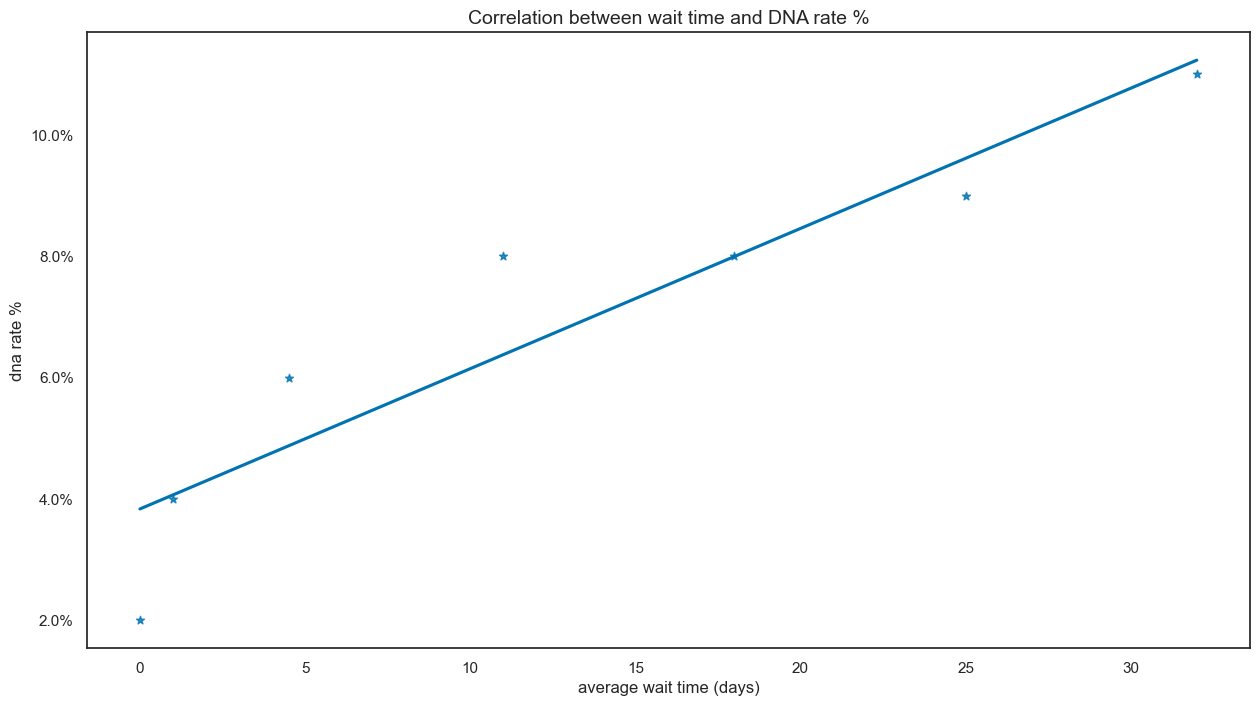

In [516]:
# create a scatterplot to see correlation

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create scatterplot
sns.regplot(data=ar_wait_dna, x='Average Wait Time', y='DNA Rate %', marker ='*',ci=None)
           
# set title
plt.title('Correlation between wait time and DNA rate %', fontsize=14)

# set x and y labels
plt.xlabel('average wait time (days)', fontsize=12)
plt.ylabel('dna rate %', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

> This scatter graph shows us that there is a positive correlation between higher wait times and missed appointment rate. As average wait time increases, the % of missed appointments also increases.

In [518]:
# average wait time by appointment mode

# subset the data by:
# exclude 'unknown/data quality' wait times
# only include telephone and face to face appointments

# group total appointments by wait time and appointment mode from the filtered data
ar_appt_by_wait_mode = ar_new[(ar_new['time_between_book_and_appointment'] != 'Unknown / Data Quality')
                       & ar_new['appointment_mode'].isin(['Telephone', 'Face-to-Face'])]\
                      .groupby(['appointment_mode','time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()\
                      .rename(columns={'count_of_appointments' : 'Total Appointments'})

# add new column 'average wait time' by remapping the values of the dataframe
ar_appt_by_wait_mode['average_wait_time'] = ar_appt_by_wait_mode['time_between_book_and_appointment'].map(wait_dict)

# subset the data by appointment mode
telephone_wait = ar_appt_by_wait_mode[ar_appt_by_wait_mode['appointment_mode'] == 'Telephone']
face_to_face_wait = ar_appt_by_wait_mode[ar_appt_by_wait_mode['appointment_mode'] == 'Face-to-Face']

# calculate weighted average per mode
avg_telephone = (telephone_wait['average_wait_time'] * telephone_wait["Total Appointments"]).sum() / telephone_wait["Total Appointments"].sum()
avg_face_to_face = (face_to_face_wait['average_wait_time'] * face_to_face_wait["Total Appointments"]).sum()\
                    / face_to_face_wait["Total Appointments"].sum()

print(f" The average wait time for telephone appointments is:{avg_telephone}")
print(f" The average wait time for face-to-face appointments is:{avg_face_to_face}")

 The average wait time for telephone appointments is:2.9640645937602383
 The average wait time for face-to-face appointments is:6.606024127877809


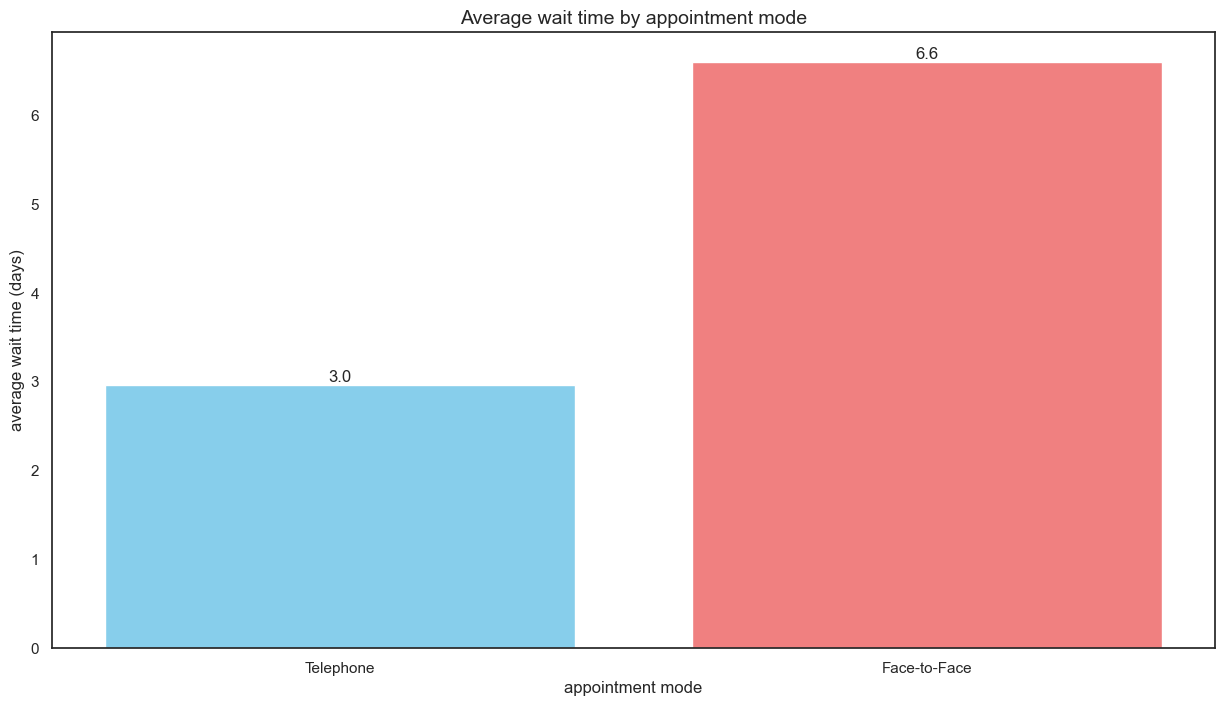

In [519]:
# create bar chart

# Data for the bar chart
categories = ['Telephone', 'Face-to-Face']
wait_times = [avg_telephone, avg_face_to_face]

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create bar chart
barplot_avg_wait_mode = plt.bar(categories, wait_times, color=['skyblue', 'lightcoral'])

# set x and y labels
plt.xlabel('appointment mode',fontsize=12)
plt.ylabel('average wait time (days)',fontsize=12)

# set title
plt.title('Average wait time by appointment mode',fontsize=14)

# Add values on top of the bars
for i, time in enumerate(wait_times):
    plt.text(i, time, str(round(time, 1)), ha='center', va='bottom')

# show the figure
plt.show()

> We know attendance for telephone appointments is greater, but its also supported by the fact that the average wait time for telephone appointments is half the time for face to face appointments

In [521]:
# hcp type vs. DNA Rate: Are patients more likely to miss GP appointments compared to other staff?

# subset the data for:
# exclude 'unknown' hcp types
# exclude 'unknown' appointment statuses

# group total appointments by hcp type from filtered data
ar_hcp_grouped = ar_new.loc[(ar_new['hcp_type'] != 'Unknown') & (ar_new['appointment_status'] != 'Unknown')]\
                       .groupby(['hcp_type'])['count_of_appointments'].sum()\
                       .reset_index().rename(columns={'count_of_appointments':'Total Appointments'})

# create a new df which only contains 'did not attend' appointments, excluding 'unkown' hcp types and group by hcp type
ar_appt_hcp_dna = ar_new.loc[(ar_new['appointment_status'] == 'DNA') & (ar_new['hcp_type'] != 'Unknown')]\
                        .groupby(['hcp_type'])['count_of_appointments'].sum().reset_index()\
                        .rename(columns={'count_of_appointments':'Total Missed Appointments'})

# merge the above 2 dfs together using an inner join on the hcp_type column
ar_hcp_dna = pd.merge(ar_hcp_grouped,ar_appt_hcp_dna,on='hcp_type',how='inner')

# calculate the did not attend rate (dna rate %)
ar_hcp_dna['DNA Rate %'] =((ar_hcp_dna['Total Missed Appointments'] / ar_hcp_dna['Total Appointments']) * 100).round(0)

# view the df
ar_hcp_dna

hcp_type  Total Appointments  Total Missed Appointments  \
0                    GP           367275940                    9428935   
1  Other Practice staff           319958912                   20829335   

   DNA Rate %  
0         3.0  
1         7.0

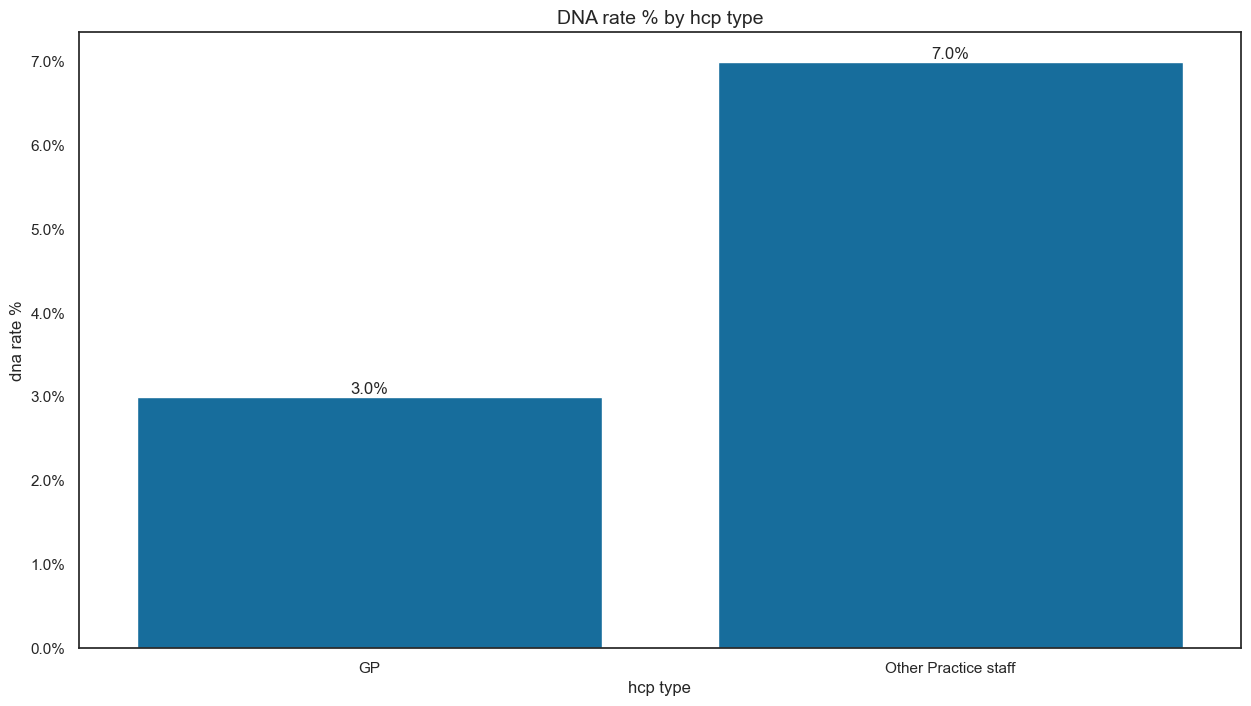

In [522]:
# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create a barplot
ax = sns.barplot(data=ar_hcp_dna, x='hcp_type',y='DNA Rate %')

# set x and y labels
plt.xlabel('hcp type',fontsize=12)
plt.ylabel('dna rate %',fontsize=12)

# set title
plt.title('DNA rate % by hcp type',fontsize=14)

# Annotate bars with percentages
for p in ax.patches:
    percentage = '{:.1f}%'.format(p.get_height())  
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom') 

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# view figure
plt.show()

> Other Practice staff have a higher DNA rate% than GPs. This tells us that there is a higher possibility that patients are likely to miss Other Practice staff appointments compared to GPs

In [524]:
# wait time by hcp type

# subset the data for:
# exclude 'unknown' hcp types
# exclude 'unknown/ data quality' wait times

# group total appointments by hcp type and wait time, aggregate by total appointments
ar_appt_by_wait_hcp = ar_new.loc[(ar_new['hcp_type'] != 'Unknown') & (ar_new['time_between_book_and_appointment'] != 'Unknown / Data Quality')]\
                            .groupby(['hcp_type','time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()\
                            .rename(columns={'count_of_appointments':'Total Appointments'})

# Remap the wait time values
ar_appt_by_wait_hcp['average wait time'] = ar_appt_by_wait_hcp['time_between_book_and_appointment'].map(wait_dict)

# subset the data by hcp type
gp_wait = ar_appt_by_wait_hcp[ar_appt_by_wait_hcp['hcp_type'] == 'GP']
other_staff_wait = ar_appt_by_wait_hcp[ar_appt_by_wait_hcp['hcp_type'] == 'Other Practice staff']

# calculate weighted average per hcp type
avg_gp = (gp_wait['average wait time'] * gp_wait["Total Appointments"]).sum() / gp_wait["Total Appointments"].sum()
avg_other_staff = (other_staff_wait['average wait time'] * other_staff_wait["Total Appointments"]).sum()\
                   / other_staff_wait["Total Appointments"].sum()

print(f"Avg Wait Time (GP): {avg_gp:.2f} days")
print(f"Avg Wait Time (Other Practice staff): {avg_other_staff:.2f} days")

Avg Wait Time (GP): 3.34 days
Avg Wait Time (Other Practice staff): 7.41 days


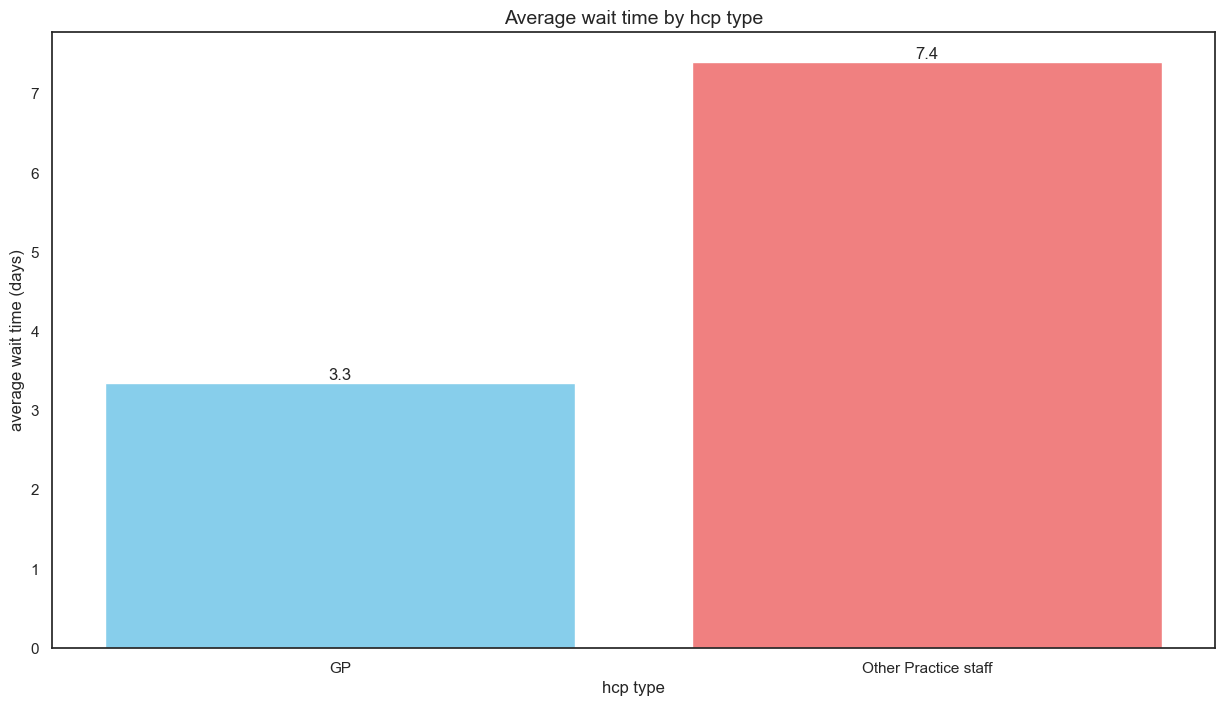

In [525]:
# Data for the bar chart
categories = ['GP', 'Other Practice staff']
wait_times = [avg_gp, avg_other_staff]

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create bar chart
ax = plt.bar(categories, wait_times, color=['skyblue', 'lightcoral'])

# set x and y labels
plt.xlabel('hcp type',fontsize=12)
plt.ylabel('average wait time (days)',fontsize=12)

# set title
plt.title('Average wait time by hcp type',fontsize=14)

# Add values on top of the bars
for i, time in enumerate(wait_times):
    plt.text(i, time, str(round(time, 1)), ha='center', va='bottom')

# show the figure
plt.show()

> The picture is clear here, Other practice staff have more than double the wait time for appointments compared to GPs. We also know that other practice staff have a higher DNA rate. This should definitley be addressed by the NHS management team.

In [527]:
# november 21 was the period with the most appointments by sum of total appointments
# understand what happened in november 21 - regions/appointment mode insights

# subset data to be for november 2021 only - i.e the busiest month/year 
ar_nov21 = ar_new.loc[(ar_new['appointment_month'] == '2021-11-01')]

# group total appointments by region and appointment mode
ar_nov21_reg_wait = ar_nov21.groupby(['region_name','appointment_mode'])['count_of_appointments'].sum().reset_index()\
                            .rename(columns={'count_of_appointments':'Total Appointments'})

# pivot the df by region name and appointment mode
ar_nov21_reg_wait_pivot = ar_nov21_reg_wait.pivot_table(index='region_name',columns='appointment_mode',values='Total Appointments',
                                                        aggfunc=np.sum,margins=True,margins_name='Total')

# view the pivot
ar_nov21_reg_wait_pivot

appointment_mode          Face-to-Face  Home Visit  Telephone  Unknown  \
region_name                                                              
East of England                2312253       12428     960666   167661   
London                         2538230       19249    1731240    69536   
Midlands                       3742113       42442    1924563   192809   
North East and Yorkshire       3296250       25272    1385028   190525   
North West                     2215254       51230    1292535   118107   
South East                     2781113       33872    1684165   106907   
South West                     2146114       18859    1015645   170424   
Total                         19031327      203352    9993842  1015969   

appointment_mode          Video/Online     Total  
region_name                                       
East of England                  27440   3480448  
London                           35554   4393809  
Midlands                         25483   5927410  
North East and Yorkshire         30366   4927441  
North West                        8841   3685967  
South East                       16958   4623015  
South West                       15938   3366980  
Total                           160580  30405070

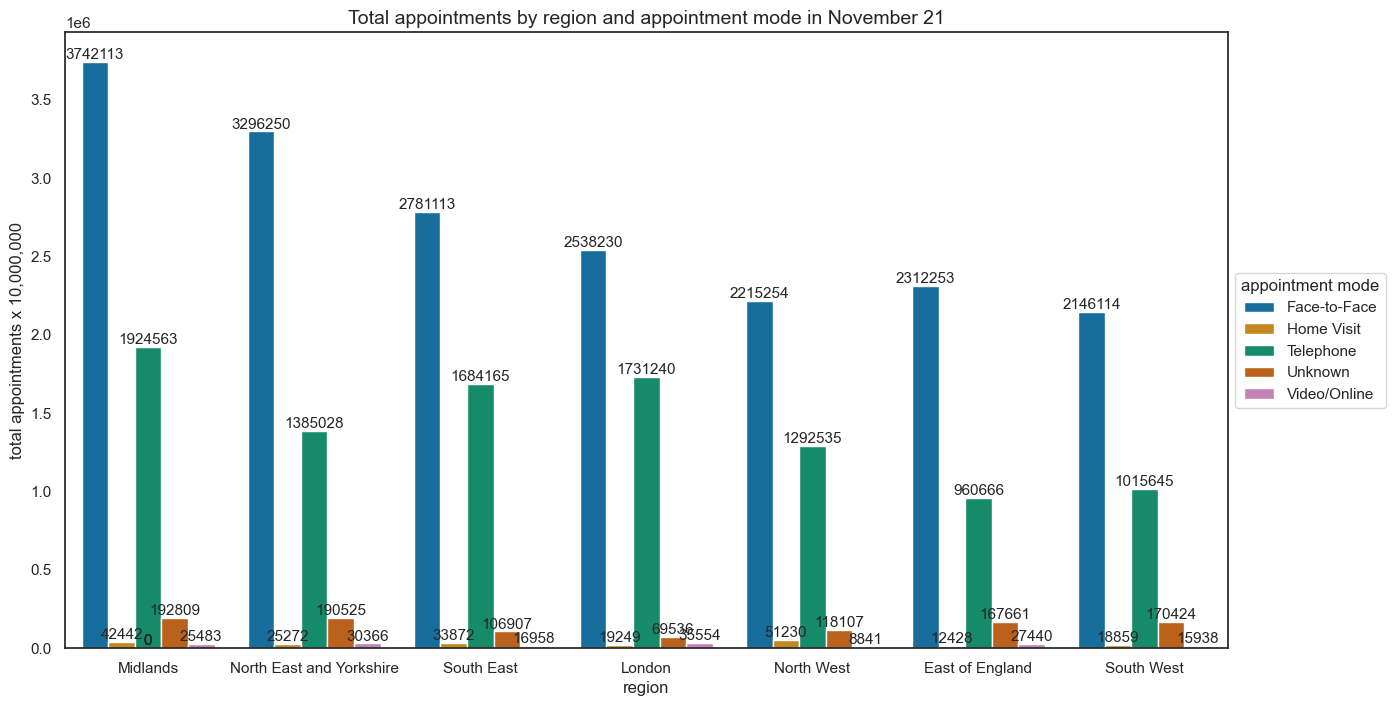

In [528]:
# create a barplot from the above pivot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create barplot
ax = sns.barplot(data=ar_nov21_reg_wait,x='region_name',y='Total Appointments',hue='appointment_mode',\
                 order=['Midlands','North East and Yorkshire','South East','London','North West','East of England','South West'])

# set title
plt.title('Total appointments by region and appointment mode in November 21', fontsize=14)

# set x and y labels
plt.xlabel('region', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='appointment mode')

# Annotate bars with numbers
for p in ax.patches:
    percentage = '{:.0f}'.format(p.get_height())  
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom',fontsize=11)

# show the figure
plt.show()

> We know november 21 was the month/year with the most appointments, but looking deeper we can see that specifically midlands was the region with the most appointments, accounting for 19% of total appointments. specifically face-to-face appointments being the mode with the highest appointments, accounting for 63% of appointments in the midlands.

In [530]:
# total appointment by appointment mode and hcp type

# subset the data for:
# exclude 'unknown' hcp types
# include face to face and telephone appointments only

# group total appointments by hcp type and appointment mode from filtered data
ar_hcp_mode = ar_new[(ar_new['hcp_type'] != 'Unknown') & ar_new['appointment_mode'].isin(['Telephone', 'Face-to-Face'])]\
                    .groupby(['hcp_type','appointment_mode'])['count_of_appointments'].sum().reset_index()\
                    .rename(columns={'count_of_appointments' : 'Total Appointments'})

# pivot the data to get for easier readability
ar_hcp_mode_pivot_table = pd.pivot_table(ar_hcp_mode, values='Total Appointments', index='hcp_type', columns='appointment_mode', aggfunc='sum', 
                                         margins=True, margins_name='Total')

# Calculate percentage split per appointment mode
ar_hcp_mode_pivot_table_new = ar_hcp_mode_pivot_table.div(ar_hcp_mode_pivot_table.iloc[:,-1], axis=0).mul(100).round(2)

# view the df
ar_hcp_mode_pivot_table_new

appointment_mode      Face-to-Face  Telephone  Total
hcp_type                                            
GP                           48.90      51.10  100.0
Other Practice staff         77.39      22.61  100.0
Total                        62.30      37.70  100.0

<Figure size 1500x800 with 0 Axes>

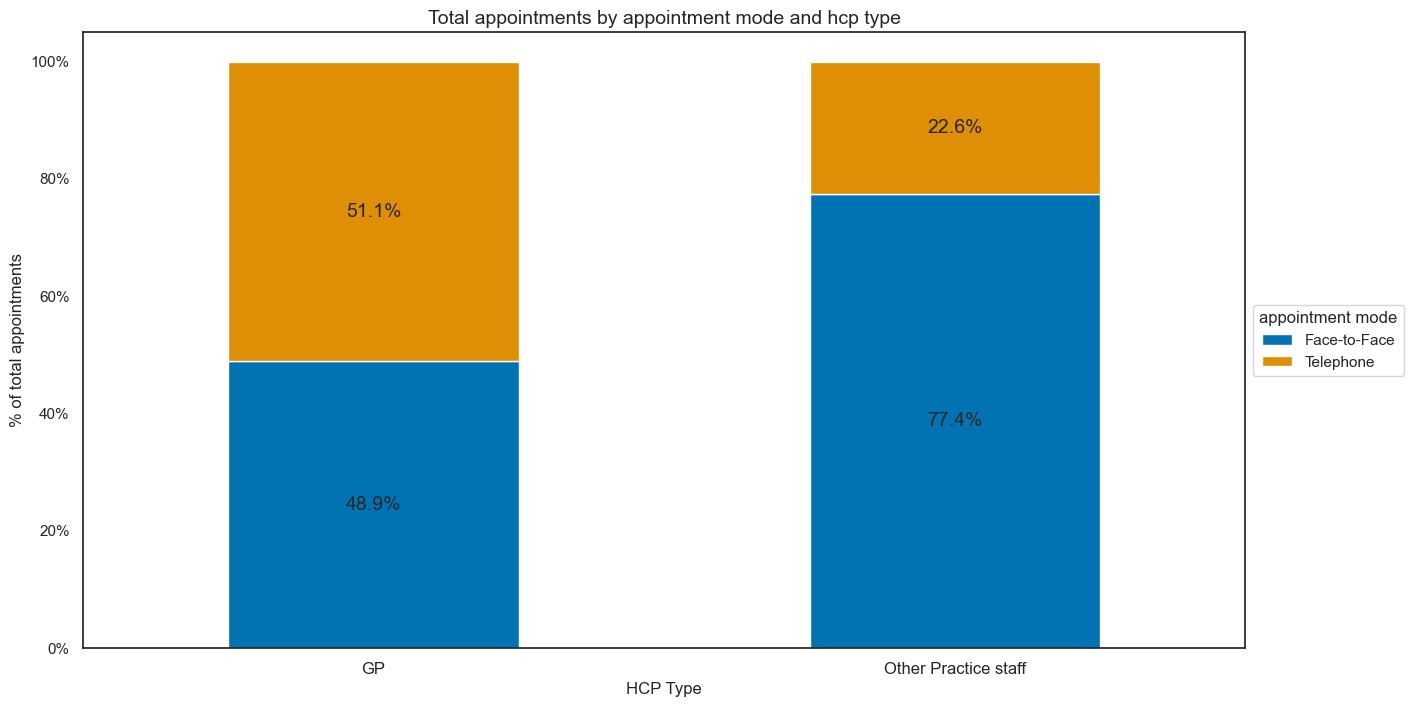

In [531]:
# create stacked barchart

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# Plot the pivot table as a stacked bar chart
ax = ar_hcp_mode_pivot_table_new.iloc[:-1,:-1].plot(kind='bar', stacked=True)

# set x and y labels
plt.xlabel('HCP Type',fontsize=12)
plt.ylabel('% of total appointments',fontsize=12)

# set title
plt.title('Total appointments by appointment mode and hcp type',fontsize=14)

# set legend
plt.legend(loc= 'center left', bbox_to_anchor=(1, 0.5),title='appointment mode')

# Add data labels
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.1f}%'.format(height), (x+width/2, y+height/2), 
                ha='center', va='center', fontsize=14) 

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# set x ticks for easier readability
plt.xticks(fontsize=12, rotation=0)

# show the figure
plt.show()

> We know GPs have the most appointments, but its interesting to see that the split by appointment mode shows that GPs take proportionally similar face to face appointments and telephone appointments, but theres a wider gap between face-to-face and telephone for other practice staff

In [533]:
# % OF ATTENDED APPOINTMENTS BY REGION

# subset the data for:
# exclude 'unknown' appointment statuses

# group total appointments from filtered data
ar_att_by_region = ar_new.loc[(ar_new['appointment_status'] != 'Unknown')]\
                         .groupby(['region_name','appointment_status'])['count_of_appointments'].sum()\
                         .reset_index().rename(columns={'count_of_appointments':'Total Appointments'})
                                                           
# pivot the data to get attended vs total
attendance_region_pivot = ar_att_by_region.pivot_table(index='region_name',columns = 'appointment_status',values = 'Total Appointments',
                                                       fill_value = 0).reset_index()

# calculate attendance %
attendance_region_pivot['Attendance Percentage'] = ((attendance_region_pivot.get('Attended', 0) / 
                                                   (attendance_region_pivot.get('Attended', 0) + 
                                                    attendance_region_pivot.get('DNA', 0))) * 100).round(2)

# calculate DNA %
attendance_region_pivot['DNA Percentage'] = 100 - attendance_region_pivot['Attendance Percentage']

# sort the values by attendance percentage
attendance_region_pivot.sort_values(by='Attendance Percentage',ascending=True)

appointment_status               region_name     Attended        DNA  \
4                                 North West   79774059.0  4569359.0   
1                                     London   97642875.0  5457490.0   
2                                   Midlands  131091777.0  6082480.0   
5                                 South East  102635388.0  4565051.0   
6                                 South West   75997183.0  3047210.0   
3                   North East and Yorkshire  111199679.0  4362852.0   
0                            East of England   79414915.0  2826791.0   

appointment_status  Attendance Percentage  DNA Percentage  
4                                   94.58            5.42  
1                                   94.71            5.29  
2                                   95.57            4.43  
5                                   95.74            4.26  
6                                   96.14            3.86  
3                                   96.22            3.78  
0                                   96.56            3.44

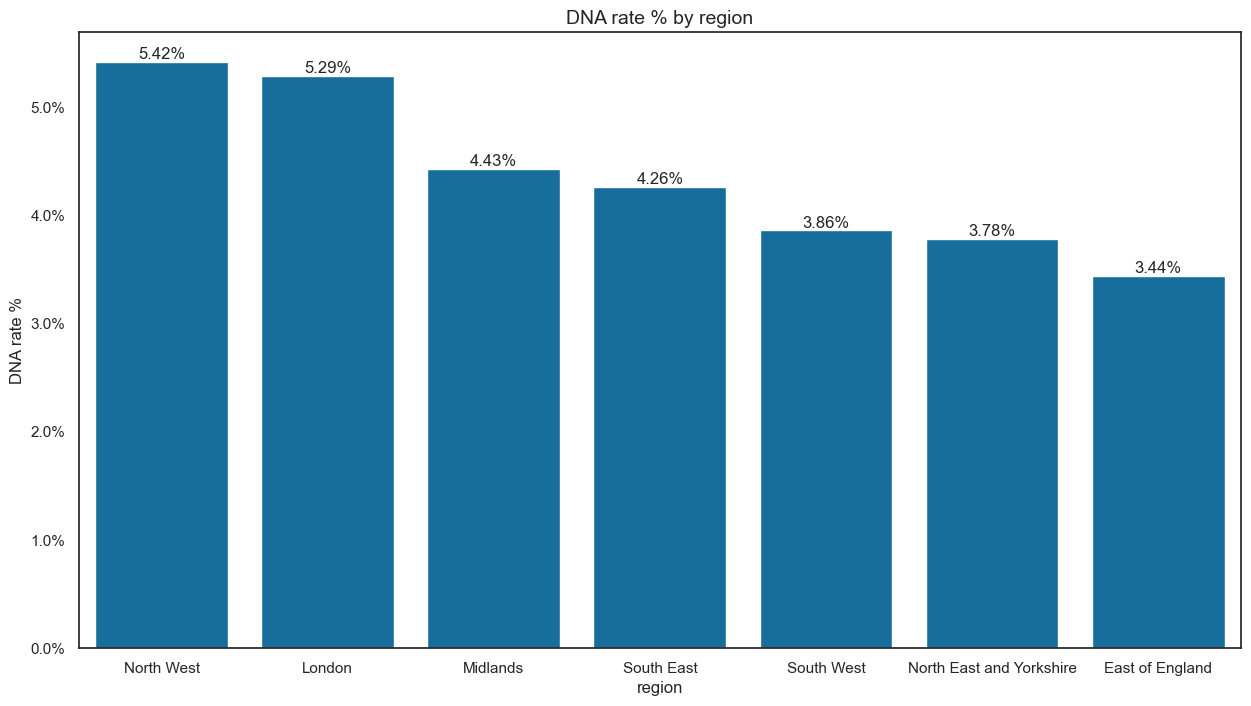

In [534]:
# create barplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create barplot
ax = sns.barplot(data=attendance_region_pivot,x='region_name',y='DNA Percentage',\
                 order=['North West','London','Midlands','South East','South West','North East and Yorkshire','East of England'])

# set title
plt.title('DNA rate % by region', fontsize=14)

# set x and y labels
plt.xlabel('region', fontsize=12)
plt.ylabel('DNA rate %', fontsize=12)

# Annotate bars with percentages
for p in ax.patches:
    percentage = '{:.2f}%'.format(p.get_height())  
    x = p.get_x() + p.get_width() / 2  
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom') 

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# view figure
plt.show()

> North West and London have the highest DNA Rate % 

In [536]:
# Average wait time by region

# subset the data for:
# exclude 'unknown/data quality' wait times

# group total appointments by wait time and region from filtered data
ar_appt_by_wait_reg = ar_new[(ar_new['time_between_book_and_appointment'] != 'Unknown / Data Quality')]\
                            .groupby(['region_name','time_between_book_and_appointment'])['count_of_appointments'].sum().reset_index()\
                            .rename(columns={'count_of_appointments' : 'Total Appointments'})

# add new column 'average wait time' by remapping the values of the dataframe
ar_appt_by_wait_reg['average_wait_time'] = ar_appt_by_wait_reg['time_between_book_and_appointment'].map(wait_dict)

# subset the data by region
east_england_wait = ar_appt_by_wait_reg[ar_appt_by_wait_reg['region_name'] == 'East of England']
london_wait = ar_appt_by_wait_reg[ar_appt_by_wait_reg['region_name'] == 'London']
midlands_wait = ar_appt_by_wait_reg[ar_appt_by_wait_reg['region_name'] == 'Midlands']
north_east_yorkshire_wait = ar_appt_by_wait_reg[ar_appt_by_wait_reg['region_name'] == 'North East and Yorkshire']
north_west_wait = ar_appt_by_wait_reg[ar_appt_by_wait_reg['region_name'] == 'North West']
south_east_wait = ar_appt_by_wait_reg[ar_appt_by_wait_reg['region_name'] == 'South East']
south_west_wait = ar_appt_by_wait_reg[ar_appt_by_wait_reg['region_name'] == 'South West']

# calculate weighted average per region
avg_east_england = (east_england_wait['average_wait_time'] * east_england_wait["Total Appointments"]).sum()\
                    / east_england_wait["Total Appointments"].sum()
avg_london = (london_wait['average_wait_time'] * london_wait["Total Appointments"]).sum() / london_wait["Total Appointments"].sum()
avg_midlands = (midlands_wait['average_wait_time'] * midlands_wait["Total Appointments"]).sum() / midlands_wait["Total Appointments"].sum()
avg_north_east_yorkshire = (north_east_yorkshire_wait['average_wait_time'] * north_east_yorkshire_wait["Total Appointments"]).sum()\
                            / north_east_yorkshire_wait["Total Appointments"].sum()
avg_north_west = (north_west_wait['average_wait_time'] * north_west_wait["Total Appointments"]).sum() / north_west_wait["Total Appointments"].sum()
avg_south_east = (south_east_wait['average_wait_time'] * south_east_wait["Total Appointments"]).sum() / south_east_wait["Total Appointments"].sum()
avg_south_west = (south_west_wait['average_wait_time'] * south_west_wait["Total Appointments"]).sum() / south_west_wait["Total Appointments"].sum()

# Data for the bar chart
categories = ['South West', 'North East and Yorkshire', 'East of England', 'South East', 'Midlands', 'North West', 'London']
wait_times = [avg_south_west, avg_north_east_yorkshire, avg_east_england, avg_south_east, avg_midlands, avg_north_west, avg_london]

print(f"The average wait time for East of England region is: {avg_east_england} ")
print(f"The average wait time for London region is: {avg_london} ")
print(f"The average wait time for Midlands region is: {avg_midlands} ")
print(f"The average wait time for North East and Yorkshire region is: {avg_north_east_yorkshire} ")
print(f"The average wait time for North West region is: {avg_north_west} ")
print(f"The average wait time for South East region is: {avg_south_east} ")
print(f"The average wait time for South West region is: {avg_south_west} ")

The average wait time for East of England region is: 5.439193341602607 
The average wait time for London region is: 4.11944948883391 
The average wait time for Midlands region is: 5.146278043384193 
The average wait time for North East and Yorkshire region is: 5.526471001215865 
The average wait time for North West region is: 4.979037369665092 
The average wait time for South East region is: 5.38534811954714 
The average wait time for South West region is: 5.946524894195001 


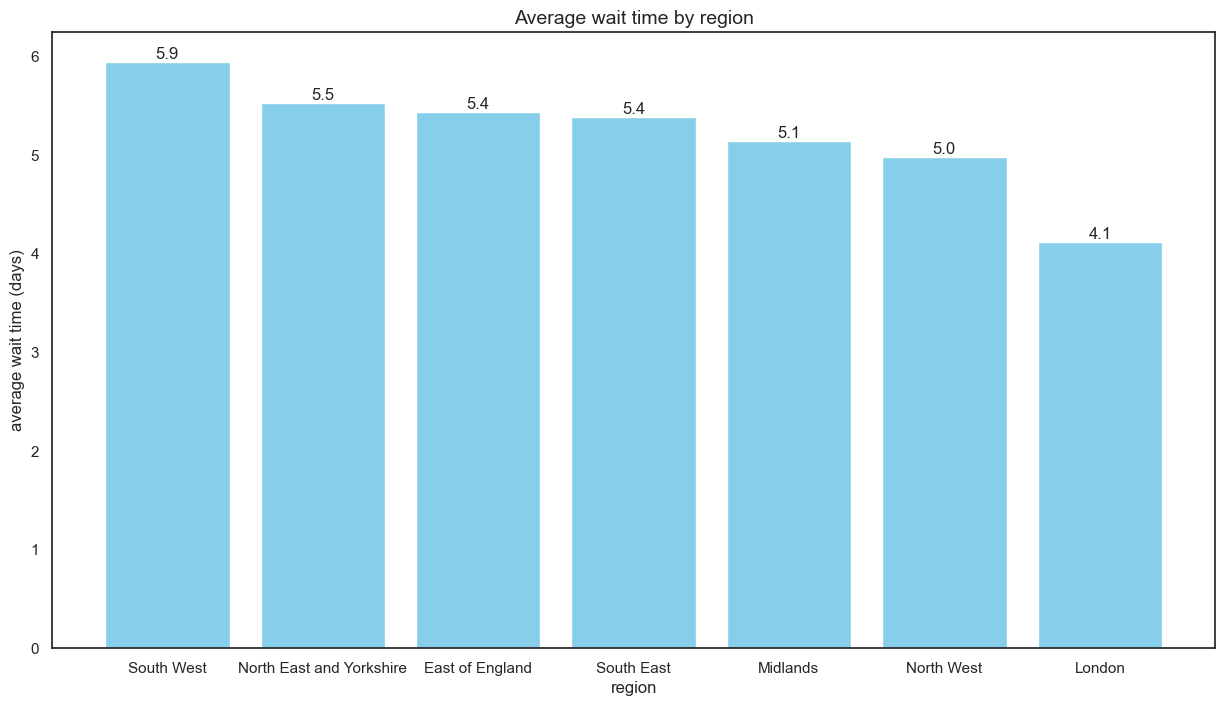

In [537]:
# create barchart

# Data for the bar chart
categories = ['South West', 'North East and Yorkshire', 'East of England', 'South East', 'Midlands', 'North West', 'London']
wait_times = [avg_south_west, avg_north_east_yorkshire, avg_east_england, avg_south_east, avg_midlands, avg_north_west, avg_london]

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create bar chart
barplot_avg_wait_region = plt.bar(categories, wait_times, color=['skyblue'])

# set x and y labels
plt.xlabel('region',fontsize=12)
plt.ylabel('average wait time (days)',fontsize=12)

# set title
plt.title('Average wait time by region',fontsize=14)

# Add values on top of the bars
for i, time in enumerate(wait_times):
    plt.text(i, time, str(round(time, 1)), ha='center', va='bottom')

# show the figure
plt.show()

> South West region has the highest average wait time, whereas London has the lowest. Interestingly, London has the 2nd highest DNA rate but this is not shown in by a higher average wait time. This suggests there is a disparity between missed appointments and average wait time for different regions, and possibly the need to understand more about specific regional dynamics

### Further exploratory analysis

In [540]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc['appointment_month'] = nc['appointment_month'].astype(str)

# check info to see if data was formatted as a string
nc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
 8   appointment_day        817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 56.1+ MB


Text(0, 0.5, 'total appointments x 10,000,000')

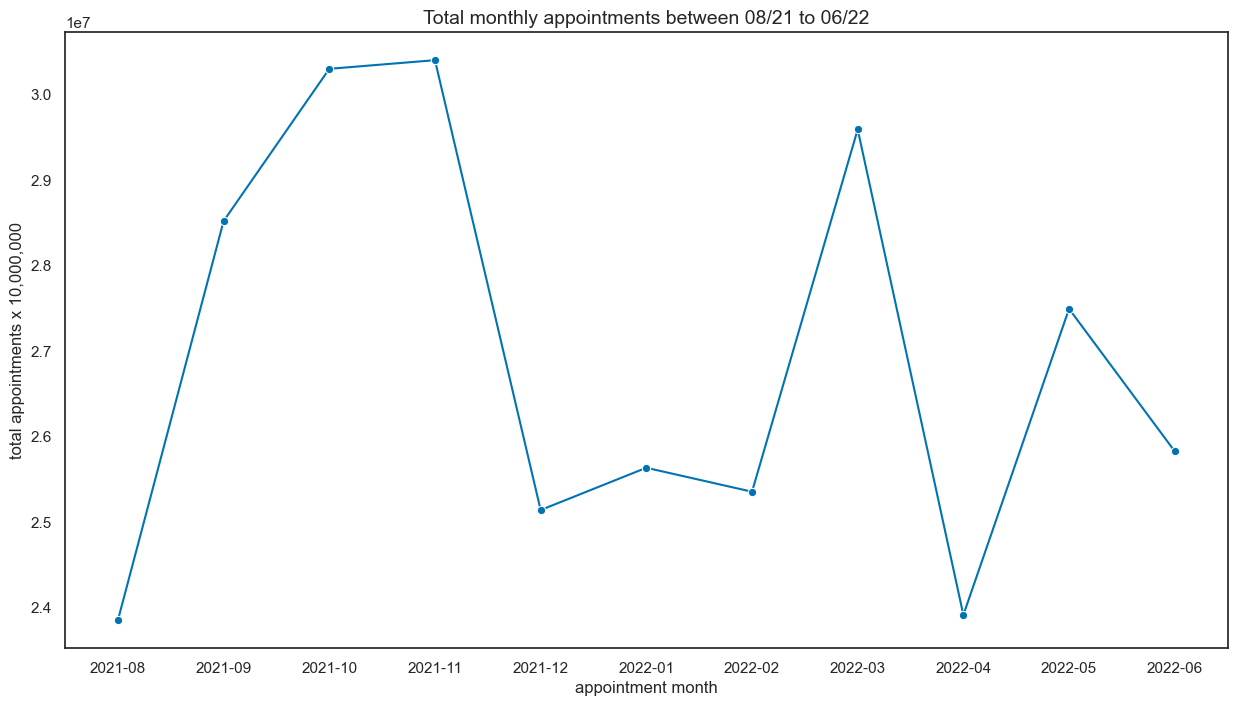

In [541]:
# Aggregate on monthly level and determine the sum of records per month.

# Note - already created df previously (nc_appt_by_month)

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=nc_appt_by_month,x='Appointment Month',y='Total Appointments',ci=None, marker='o')

# set title
plt.title('Total monthly appointments between 08/21 to 06/22', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

**Service settings:**

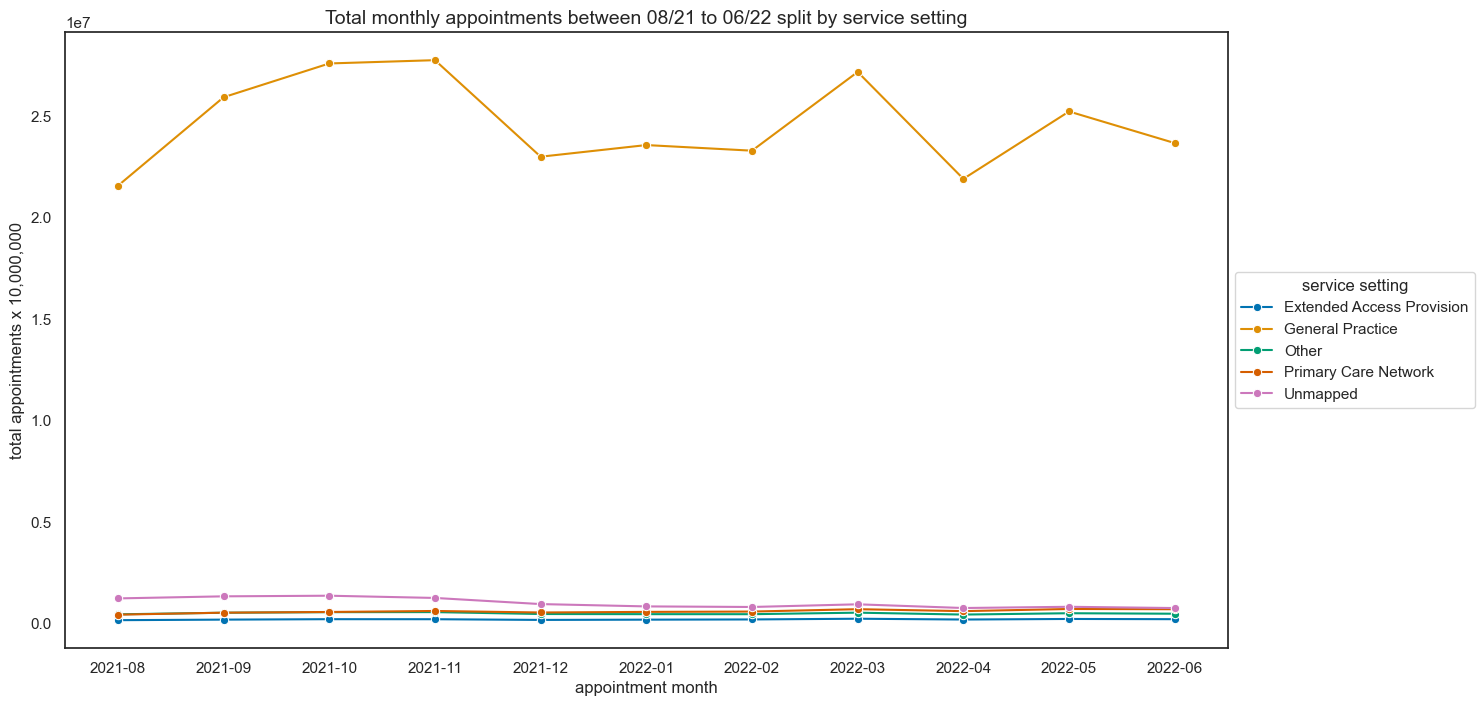

In [543]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.

# group total appointments by appointment month and service setting
nc_ss_series = nc.groupby(['appointment_month','service_setting'])['count_of_appointments'].sum().reset_index()\
                 .rename(columns={'count_of_appointments':'Total Appointments'})

# set the figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=nc_ss_series,x='appointment_month',y='Total Appointments',errorbar=None,hue='service_setting',marker='o')

# set title
plt.title('Total monthly appointments between 08/21 to 06/22 split by service setting', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='service setting')

> This chart confirms that general practice dominates as the service setting with the highest number of total appointments

**Context types:**

In [546]:
# Create a separate data set that can be used in future weeks. 

# group total appointments by appointment month and context type
nc_ct_series = nc.groupby(['appointment_month','context_type'])['count_of_appointments'].sum().reset_index()\
                .rename(columns={'count_of_appointments':'Total Appointments'})

# View df
nc_ct_series

appointment_month            context_type  Total Appointments
0            2021-08  Care Related Encounter            20255235
1            2021-08    Inconsistent Mapping             2363093
2            2021-08                Unmapped             1233843
3            2021-09  Care Related Encounter            24404251
4            2021-09    Inconsistent Mapping             2782135
5            2021-09                Unmapped             1336115
6            2021-10  Care Related Encounter            26125201
7            2021-10    Inconsistent Mapping             2811977
8            2021-10                Unmapped             1366656
9            2021-11  Care Related Encounter            26282778
10           2021-11    Inconsistent Mapping             2865796
11           2021-11                Unmapped             1256496
12           2021-12  Care Related Encounter            21798612
13           2021-12    Inconsistent Mapping             2387907
14           2021-12                Unmapped              954257
15           2022-01  Care Related Encounter            22441947
16           2022-01    Inconsistent Mapping             2353965
17           2022-01                Unmapped              839562
18           2022-02  Care Related Encounter            22211021
19           2022-02    Inconsistent Mapping             2332993
20           2022-02                Unmapped              811246
21           2022-03  Care Related Encounter            25928850
22           2022-03    Inconsistent Mapping             2723276
23           2022-03                Unmapped              942912
24           2022-04  Care Related Encounter            20904193
25           2022-04    Inconsistent Mapping             2248554
26           2022-04                Unmapped              760313
27           2022-05  Care Related Encounter            24101243
28           2022-05    Inconsistent Mapping             2573495
29           2022-05                Unmapped              820770
30           2022-06  Care Related Encounter            22621827
31           2022-06    Inconsistent Mapping             2447611
32           2022-06                Unmapped              758640

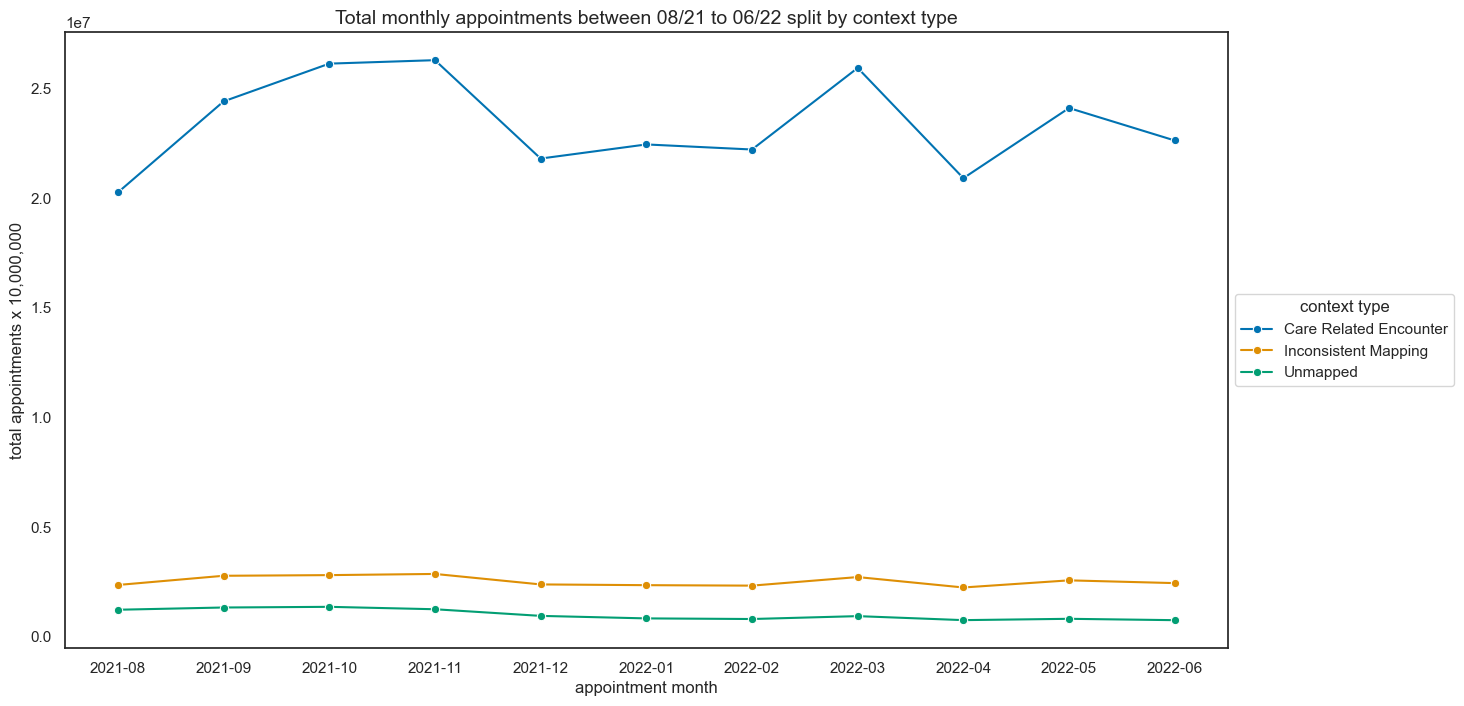

In [547]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=nc_ct_series,x='appointment_month',y='Total Appointments',errorbar=None,hue='context_type', marker='o')

# set title
plt.title('Total monthly appointments between 08/21 to 06/22 split by context type', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='context type')

> Huge dips for care related encounter during winter period - possible need to investigate

**National categories:**

In [550]:
# Create a separate data set that can be used in future weeks. 

# group total appointments by appointment month and national category
nc_nc_series = nc.groupby(['appointment_month','national_category'])['count_of_appointments'].sum().reset_index()\
                 .rename(columns={'count_of_appointments':'Total Appointments'})

# View df
nc_nc_series

appointment_month  \
0             2021-08   
1             2021-08   
2             2021-08   
3             2021-08   
4             2021-08   
..                ...   
193           2022-06   
194           2022-06   
195           2022-06   
196           2022-06   
197           2022-06   

                                                       national_category  \
0    Care Home Needs Assessment & Personalised Care and Support Planning   
1                                                        Care Home Visit   
2                                                        Clinical Triage   
3                                             General Consultation Acute   
4                                           General Consultation Routine   
..                                                                   ...   
193                                           Social Prescribing Service   
194                                         Structured Medication Review   
195                                                             Unmapped   
196                                          Unplanned Clinical Activity   
197                                                              Walk-in   

     Total Appointments  
0                 29676  
1                 47583  
2               3704207  
3               4280920  
4               7756045  
..                  ...  
193               55066  
194              187800  
195              758640  
196              274491  
197               35935  

[198 rows x 3 columns]

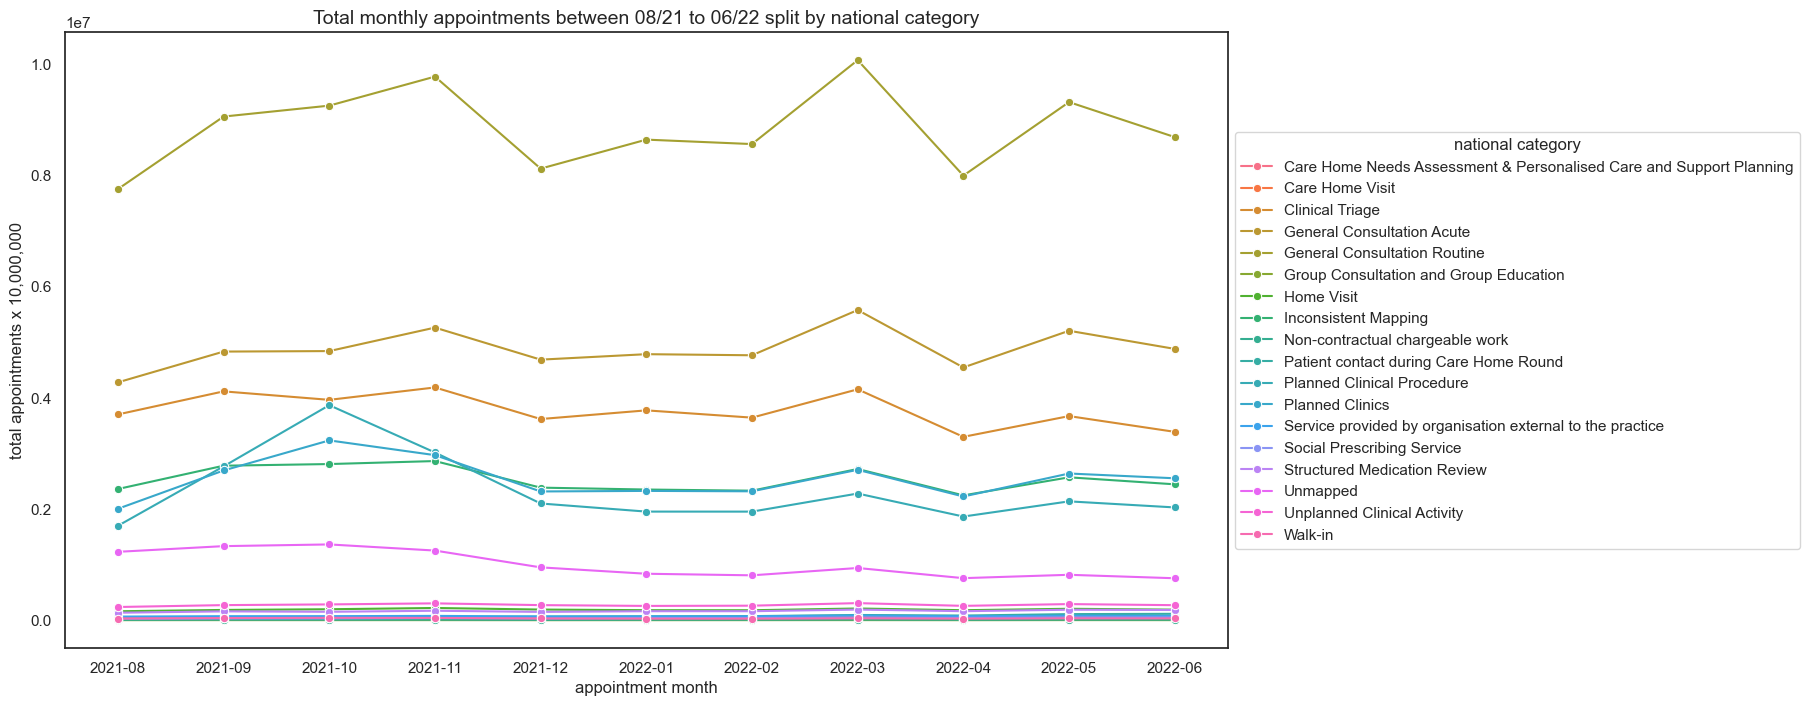

In [551]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.

# set the figure size
plt.figure(figsize=(15,8))

# create line plot
sns.lineplot(data=nc_nc_series,x='appointment_month',y='Total Appointments',errorbar=None,hue='national_category', marker='o')

# set title
plt.title('Total monthly appointments between 08/21 to 06/22 split by national category', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='national category')

>  Rise in clinical appointments in the Autumn of 2021, otherwise fairly similar trends for majority

### Seasonal analysis


**Summer (August 2021):**

In [555]:
# Create a separate data set that can be used in future weeks. 

# subset the data to only look at August 2021
nc_aug21 = nc.loc[(nc['appointment_month'] == '2021-08')]

# group total appointments by appointment date and service setting
nc_aug21_ss = nc_aug21.groupby(['appointment_date','service_setting'])['count_of_appointments'].sum().reset_index()\
                      .rename(columns={'count_of_appointments':'Total Appointments'})

# view df
nc_aug21_ss.head()

appointment_date            service_setting  Total Appointments
0       2021-08-01  Extended Access Provision                 438
1       2021-08-01           General Practice                3411
2       2021-08-01                      Other                 401
3       2021-08-01       Primary Care Network                 323
4       2021-08-01                   Unmapped                1054

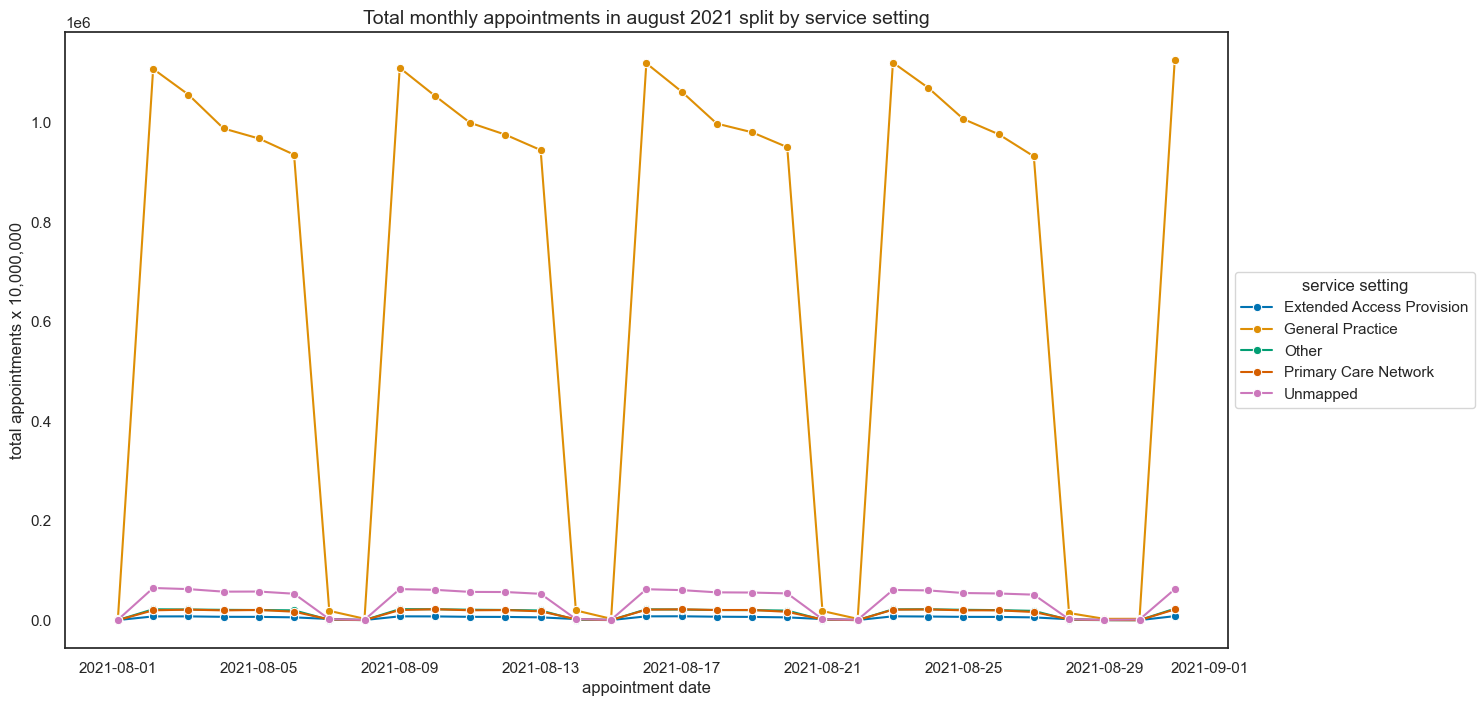

In [556]:
# Create a lineplot.

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=nc_aug21_ss,x='appointment_date',y='Total Appointments',errorbar=None,hue='service_setting',marker='o')

# set title
plt.title('Total monthly appointments in august 2021 split by service setting', fontsize=14)

# set x and y labels
plt.xlabel('appointment date', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='service setting')

**Autumn (October 2021):**

In [558]:
# Look at October 2021 in more detail to allow a closer look.

# subset the data to only look at October 2021
nc_oct21 = nc.loc[(nc['appointment_month'] == '2021-10')]

# group total appointments by appointment date and service setting
nc_oct21_ss = nc_oct21.groupby(['appointment_date','service_setting'])['count_of_appointments'].sum().reset_index()\
                      .rename(columns={'count_of_appointments':'Total Appointments'})

# view the df
nc_oct21_ss.head()

appointment_date            service_setting  Total Appointments
0       2021-10-01  Extended Access Provision                7107
1       2021-10-01           General Practice             1130646
2       2021-10-01                      Other               22639
3       2021-10-01       Primary Care Network               22974
4       2021-10-01                   Unmapped               56201

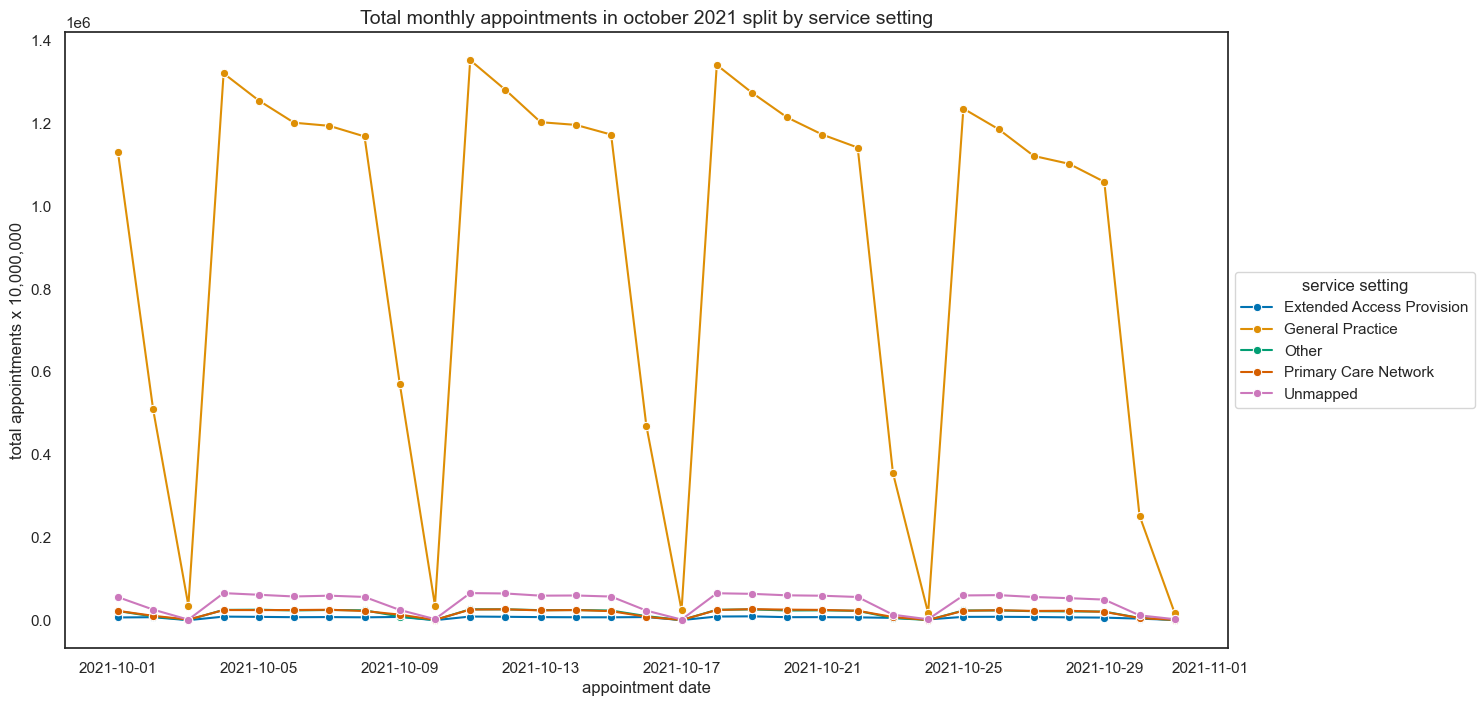

In [559]:
# Create a lineplot.

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=nc_oct21_ss,x='appointment_date',y='Total Appointments',errorbar=None,hue='service_setting', marker='o')

# set title
plt.title('Total monthly appointments in october 2021 split by service setting', fontsize=14)

# set x and y labels
plt.xlabel('appointment date', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='service setting')

**Winter (January 2022):**

In [561]:
# Look at January 2022 in more detail to allow a closer look.

# subset the data to only look at January 2022
nc_jan22 = nc.loc[(nc['appointment_month'] == '2022-01')]

# group total appointments by appointment date and service setting
nc_jan22_ss = nc_jan22.groupby(['appointment_date','service_setting'])['count_of_appointments'].sum().reset_index()\
                      .rename(columns={'count_of_appointments':'Total Appointments'})

# view df
nc_jan22_ss.head()

appointment_date            service_setting  Total Appointments
0       2022-01-01  Extended Access Provision                 246
1       2022-01-01           General Practice                3578
2       2022-01-01                      Other                 280
3       2022-01-01       Primary Care Network                 215
4       2022-01-01                   Unmapped                 572

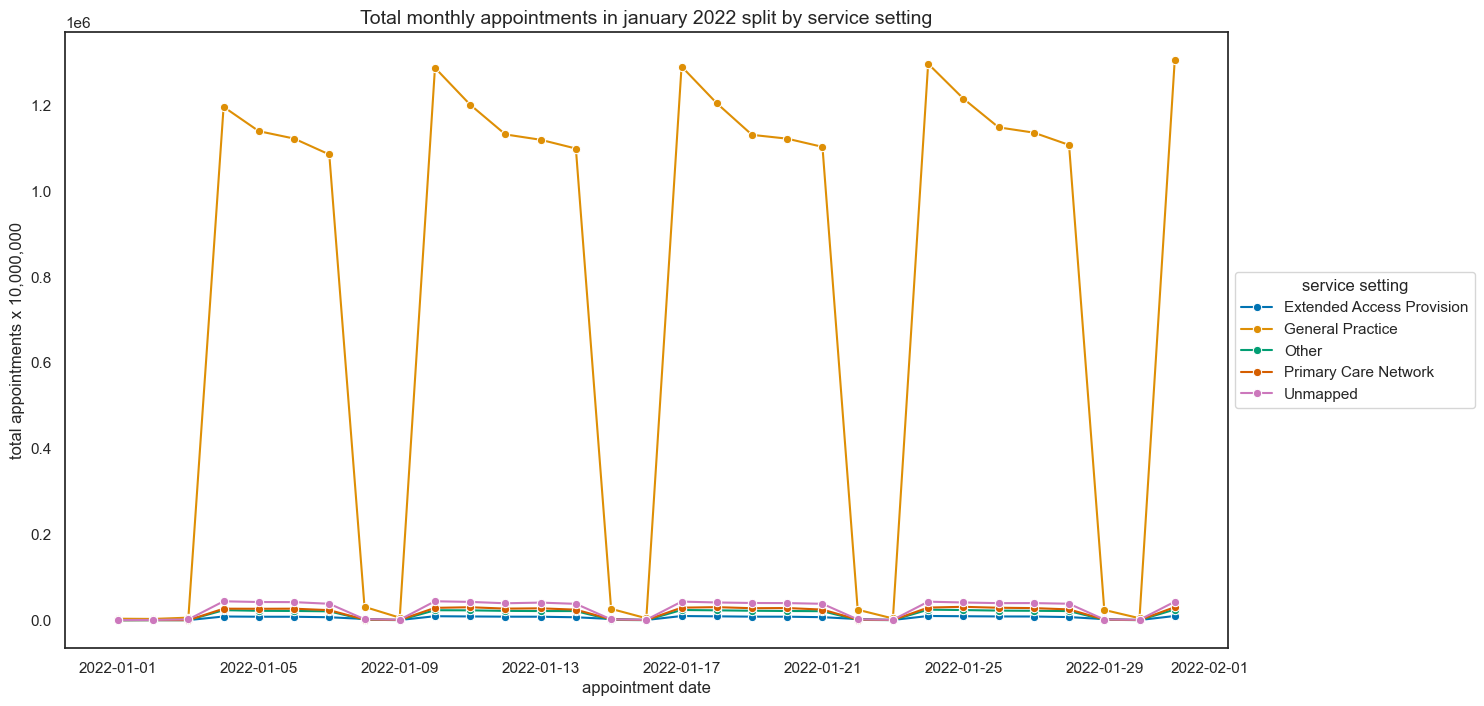

In [562]:
# Create a lineplot.

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=nc_jan22_ss,x='appointment_date',y='Total Appointments',errorbar=None,hue='service_setting', marker='o')

# set title
plt.title('Total monthly appointments in january 2022 split by service setting', fontsize=14)

# set x and y labels
plt.xlabel('appointment date', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='service setting')

**Spring (April 2022):**

In [564]:
# Look at April 2022 in more detail to allow a closer look.

# subset the data to only look at April 2022
nc_apr22 = nc.loc[(nc['appointment_month'] == '2022-04')]

# group total appointments by appointment date and service setting
nc_apr22_ss = nc_apr22.groupby(['appointment_date','service_setting'])['count_of_appointments'].sum().reset_index()\
                      .rename(columns={'count_of_appointments':'Total Appointments'})

# view df
nc_apr22_ss.head()

appointment_date            service_setting  Total Appointments
0       2022-04-01  Extended Access Provision                8011
1       2022-04-01           General Practice             1085037
2       2022-04-01                      Other               21077
3       2022-04-01       Primary Care Network               26493
4       2022-04-01                   Unmapped               36836

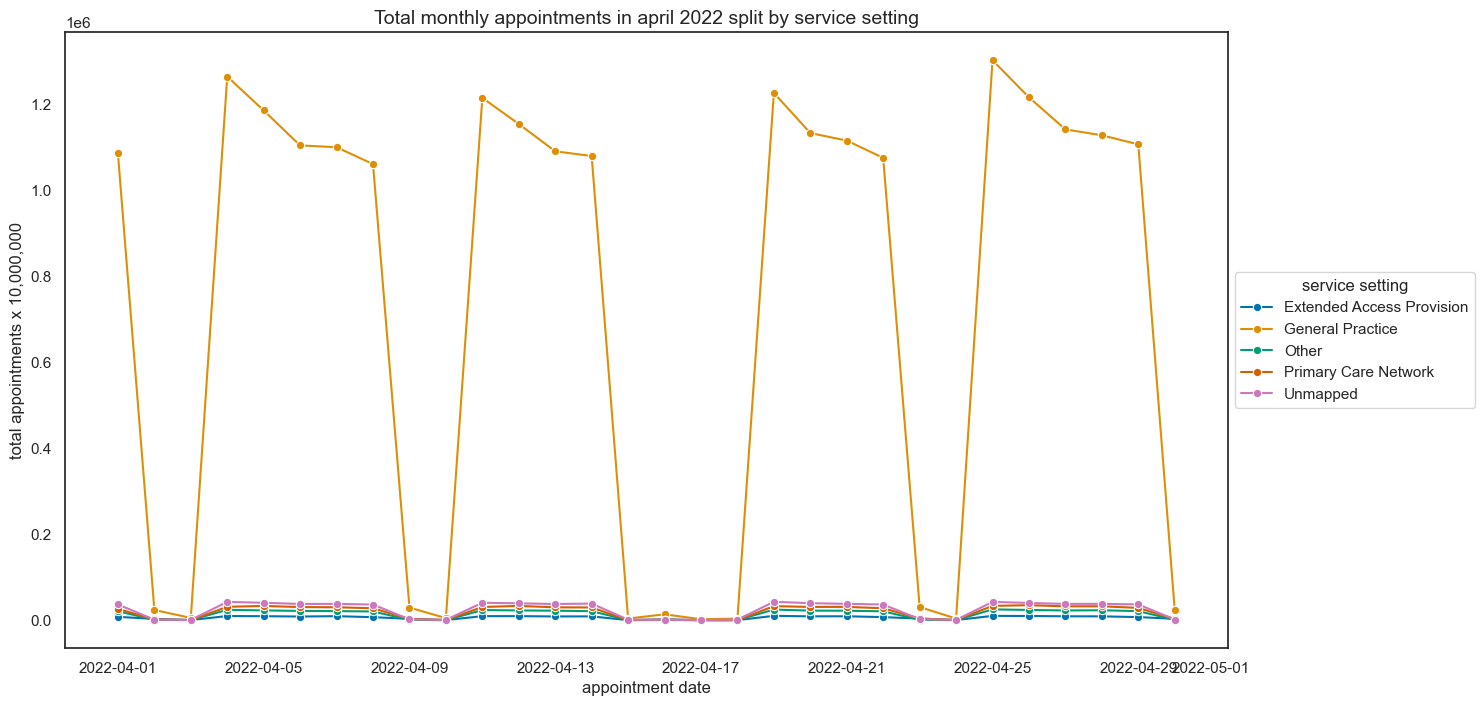

In [565]:
# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=nc_apr22_ss,x='appointment_date',y='Total Appointments',errorbar=None,hue='service_setting', marker='o')

# set title
plt.title('Total monthly appointments in april 2022 split by service setting', fontsize=14)

# set x and y labels
plt.xlabel('appointment date', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='service setting')

## General Practice insights

In [567]:
# explore GP practice data only as majority of appointments in this service setting

# subset the data to only include 'service_setting' = [General practice']
nc_ss_gp = nc.loc[(nc['service_setting'] == 'General Practice')]

# view df
nc_ss_gp.head()

appointment_date icb_ons_code                       sub_icb_location_name  \
2        2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
3        2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
4        2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
5        2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   
12       2021-08-02    E54000050  NHS North East and North Cumbria ICB - 00L   

     service_setting            context_type             national_category  \
2   General Practice  Care Related Encounter                    Home Visit   
3   General Practice  Care Related Encounter    General Consultation Acute   
4   General Practice  Care Related Encounter  Structured Medication Review   
5   General Practice  Care Related Encounter               Care Home Visit   
12  General Practice    Inconsistent Mapping          Inconsistent Mapping   

    count_of_appointments appointment_month appointment_day  
2                      79           2021-08          Monday  
3                     725           2021-08          Monday  
4                       2           2021-08          Monday  
5                      11           2021-08          Monday  
12                    619           2021-08          Monday

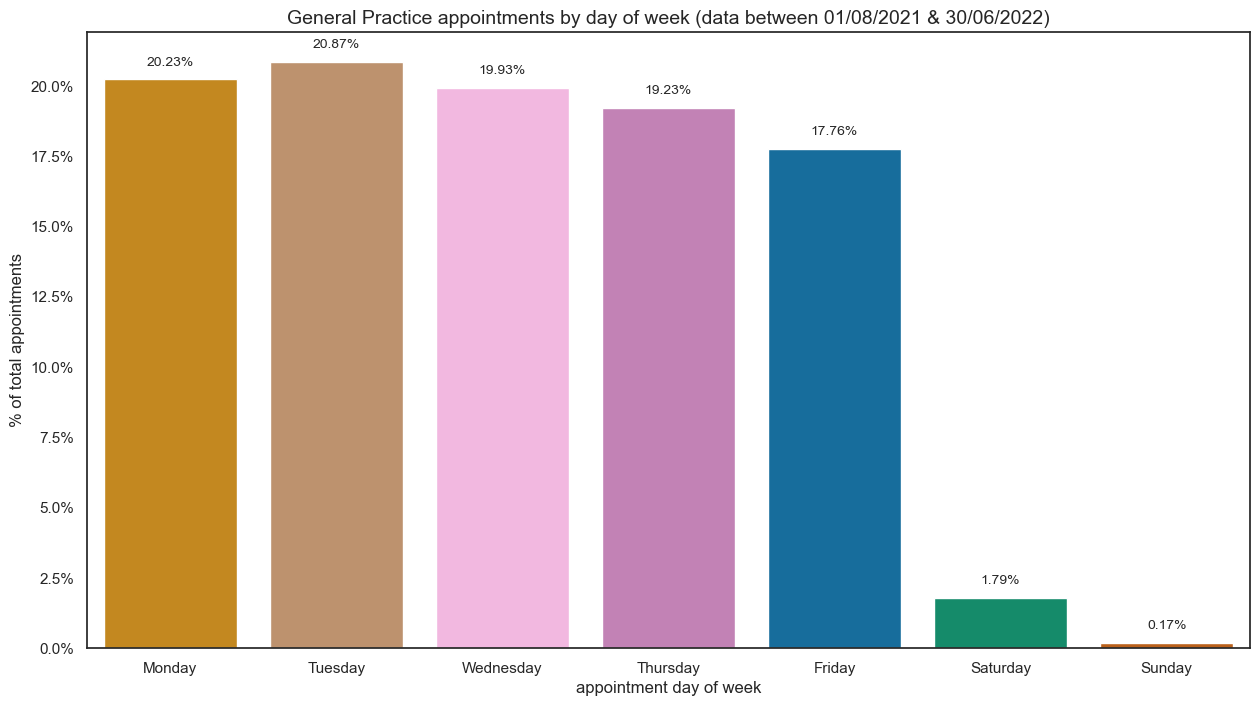

In [568]:
# explore 'general practice' appointnments by day of week

# group total appointments by appointment day of week
nc_ss_gp_day = nc_ss_gp.groupby(['appointment_day'])['count_of_appointments'].sum().reset_index()\
                       .rename(columns={'count_of_appointments':'Total Appointments'})

# add a new column to get % of total appointments
nc_ss_gp_day['% of Total Appointments'] = ((nc_ss_gp_day['Total Appointments'] /  nc_ss_gp_day['Total Appointments'].sum()) * 100).round(2)

# set the figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create bar plot
ax = sns.barplot(data=nc_ss_gp_day,x='appointment_day',y='% of Total Appointments',
                 order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'],hue='appointment_day')

# Add labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5, 
        f'{p.get_height():.2f}%',  
        ha='center',fontsize=10)

# set title
plt.title('General Practice appointments by day of week (data between 01/08/2021 & 30/06/2022)', fontsize=14)

# set x and y labels
plt.xlabel('appointment day of week', fontsize=12)
plt.ylabel('% of total appointments', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# show plot
plt.show()

> Tuesday is the most common day for 'General Practice' appointments (20.9%), ignoring Saturday and Sundays which have extremely low level of appointments, there is definitley some exploration needed to shift appointments to Friday.

# Utilisation Analysis

In [571]:
# nhs provided figure of maximum daily capacity = 1200000
daily_max_capacity = 1200000

# explore utilisation at monthly level using 'ar' dataframe

# group total appointments by appointment month
utilisation_monthly = ar_new.groupby(['appointment_month'])['count_of_appointments'].sum().reset_index()\
                            .rename(columns={'count_of_appointments':'Total appointments'})

# add a new column to calculate monthly utilisation % (assuming 30 days in any given month)
utilisation_monthly['Utilisation%'] = ((utilisation_monthly['Total appointments']/ (daily_max_capacity * 30)) * 100).round(1)

# view the df
utilisation_monthly

appointment_month  Total appointments  Utilisation%
0         2020-01-01            27199296          75.6
1         2020-02-01            24104621          67.0
2         2020-03-01            24053468          66.8
3         2020-04-01            16007881          44.5
4         2020-05-01            16417212          45.6
5         2020-06-01            20690805          57.5
6         2020-07-01            22491437          62.5
7         2020-08-01            20150520          56.0
8         2020-09-01            26714255          74.2
9         2020-10-01            28301932          78.6
10        2020-11-01            25061602          69.6
11        2020-12-01            23535936          65.4
12        2021-01-01            22492069          62.5
13        2021-02-01            22399569          62.2
14        2021-03-01            27225424          75.6
15        2021-04-01            23879932          66.3
16        2021-05-01            23508395          65.3
17        2021-06-01            26784182          74.4
18        2021-07-01            25739219          71.5
19        2021-08-01            23852171          66.3
20        2021-09-01            28522501          79.2
21        2021-10-01            30303834          84.2
22        2021-11-01            30405070          84.5
23        2021-12-01            25140776          69.8
24        2022-01-01            25635474          71.2
25        2022-02-01            25355260          70.4
26        2022-03-01            29595038          82.2
27        2022-04-01            23913060          66.4
28        2022-05-01            27495508          76.4
29        2022-06-01            25828078          71.7

> Monthly capacity never exceeded 100%, however the highest utilisation ever got was in November 21 at 84.5%. This suggests that there was adequate capacity for the entire period in question

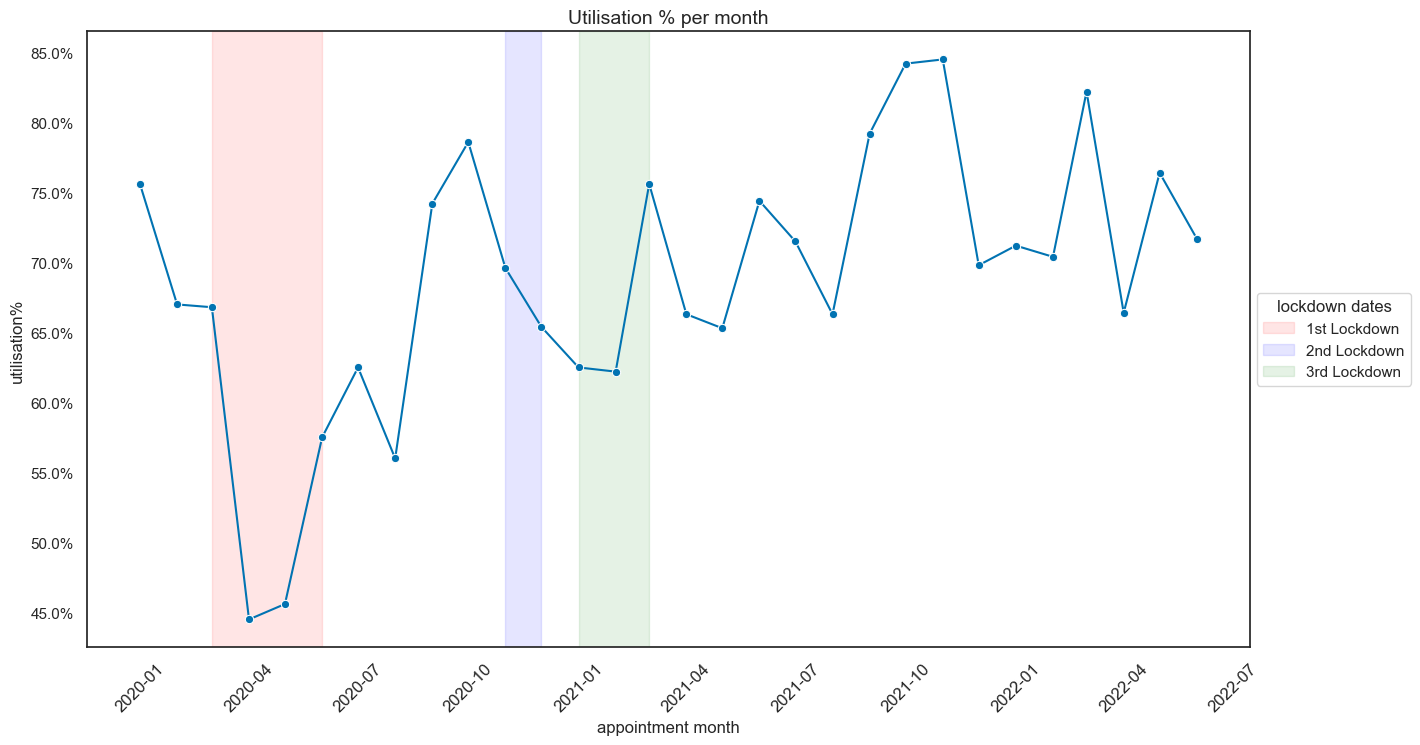

In [573]:
# create a lineplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=utilisation_monthly,x='appointment_month',y='Utilisation%',marker='o')

# set x ticks for easier readability
plt.xticks(fontsize=12, rotation=45)

# set title
plt.title('Utilisation % per month', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('utilisation%', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='lockdown dates')

> As shown above capacity never exceeded 100% and reached a maximum of 84.5% in November 21, suggesting enough resources to keep up with demand for appointments

In [575]:
# explore utilisation at daily level using 'nc' dataframe

# group total appointments by appointment date
utilisation_daily = nc.groupby(['appointment_date'])['count_of_appointments'].sum().reset_index()\
                      .rename(columns={'count_of_appointments':'Total appointments'})

# add a new column to work out daily utilisation and utilisation %
utilisation_daily['Utilisation'] = daily_max_capacity
utilisation_daily['Utilisation%'] = (utilisation_daily['Total appointments']/ (utilisation_daily['Utilisation']) * 100).round(1)

# add day of week to the df
utilisation_daily['day_of_week'] = utilisation_daily['appointment_date'].dt.day_name()

# view the df
utilisation_daily

appointment_date  Total appointments  Utilisation  Utilisation%  \
0         2021-08-01                5627      1200000           0.5   
1         2021-08-02             1222768      1200000         101.9   
2         2021-08-03             1169920      1200000          97.5   
3         2021-08-04             1093532      1200000          91.1   
4         2021-08-05             1074043      1200000          89.5   
..               ...                 ...          ...           ...   
329       2022-06-26                6574      1200000           0.5   
330       2022-06-27             1410883      1200000         117.6   
331       2022-06-28             1335598      1200000         111.3   
332       2022-06-29             1237258      1200000         103.1   
333       2022-06-30             1226746      1200000         102.2   

    day_of_week  
0        Sunday  
1        Monday  
2       Tuesday  
3     Wednesday  
4      Thursday  
..          ...  
329      Sunday  
330      Monday  
331     Tuesday  
332   Wednesday  
333    Thursday  

[334 rows x 5 columns]

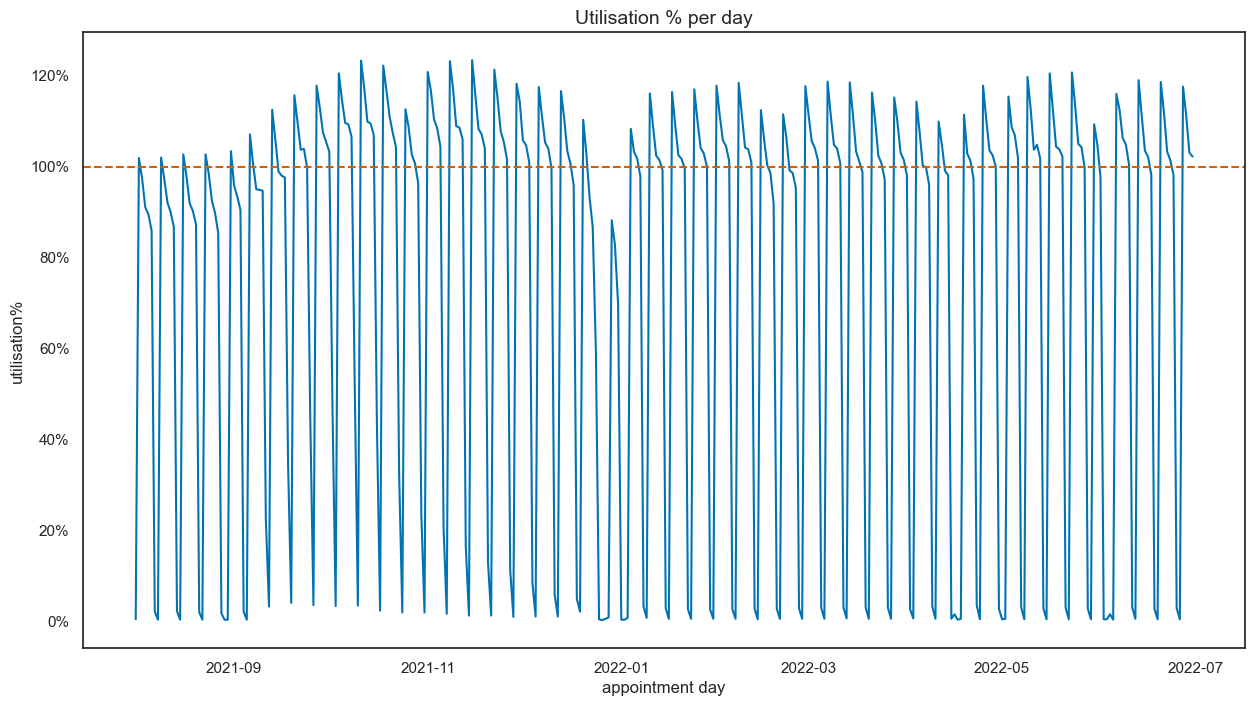

In [576]:
# create lineplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=utilisation_daily,x='appointment_date',y='Utilisation%')

# set title
plt.title('Utilisation % per day', fontsize=14)

# set x and y labels
plt.xlabel('appointment day', fontsize=12)
plt.ylabel('utilisation%', fontsize=12)

# Format y-axis labels as percentages
plt.gca().yaxis.set_major_formatter(mticker.PercentFormatter())

# specifying horizontal line type for NHS maximum capacity at 100%
plt.axhline(y = 100, color = 'r', linestyle = '--')

> Using the nc data frame we are able to see the utilisation at 'day' level which shows there were periods where utilisation exceeded capacity. The dips represent weekend and holidays

In [578]:
# show count of utiilisation above max capacity (1.2m) by day of week

# create a new column called 'above_utilisation' to check if a day was above utilisation, assign 1 if above, otherwise 0
utilisation_daily['above_utilisation'] = np.where(utilisation_daily['Total appointments'] > utilisation_daily['Utilisation'], 1, 0)

# group sum above_utilisation by day of week to work out number of days per day of week above capapcity
utilisation_day_above_capacity = utilisation_daily.groupby(['day_of_week'])['above_utilisation'].sum().sort_values(ascending=False).reset_index()

print(f" The total number of days between 01/08/2021 & 30/06/22 where the NHS operated over capacity was:\
{utilisation_day_above_capacity['above_utilisation'].sum()}")

# view the df
utilisation_day_above_capacity

 The total number of days between 01/08/2021 & 30/06/22 where the NHS operated over capacity was:175


day_of_week  above_utilisation
0      Monday                 43
1     Tuesday                 43
2   Wednesday                 36
3    Thursday                 34
4      Friday                 19
5    Saturday                  0
6      Sunday                  0

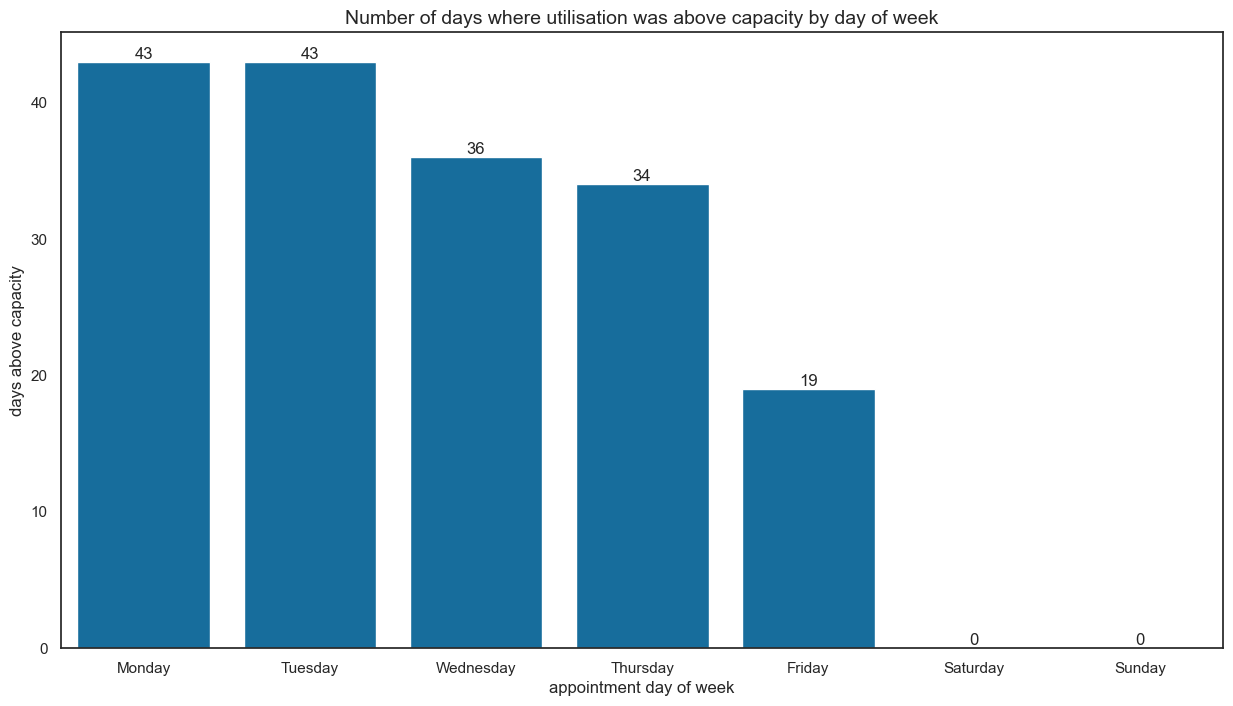

In [579]:
# create barplot

# set figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create bar plot
ax = sns.barplot(data=utilisation_day_above_capacity,x='day_of_week',y='above_utilisation')

# set title
plt.title('Number of days where utilisation was above capacity by day of week', fontsize=14)

# set x and y labels
plt.xlabel('appointment day of week', fontsize=12)
plt.ylabel('days above capacity', fontsize=12)

# Annotate bars with values
for p in ax.patches:
    value = '{:.0f}'.format(p.get_height())  
    x = p.get_x() + p.get_width()/2
    y = p.get_height()
    ax.annotate(value, (x, y), ha='center', va='bottom')

# show the figure
plt.show()

> From the nc df, out of the 334 days analysed, the NHS exceeded capacity on 175 days, this accounts for 52% of the data. Also Monday and Tuesday were the most common days where capacity was exceeded (43 days for both days)

> *Capacity is a broad term used to describe the capability, in terms of available resources, that the NHS has to deliver services. It is wrong to think of capacity solely in terms of the number of beds available in acute hospitals. Capacity covers all the equipment (including beds for inpatient services) and the range of appropriately qualified staff that are needed to provide care across all health and care settings.*
>
> link -  https://nhsproviders.org/mapping-the-nhs-winter/capacity

# Twitter Analysis

> Note - Explored and analysed twitter data, but decided not to include in technical report and presentation as not linked to my area of focus

> *Through cleaned, ethically sourced social media data which adheres to GDPR rules there are benefits of analysing social media data to gather sentinment. As the Twitter data relates to personal data, care must be taken that this data is sourced appropriately*
>
> link - https://www.ucl.ac.uk/data-protection/handling-personal-data-responsibly


# Tweets Dataset - sense check

In [586]:
# validate the data using above defined validate_data user defined function
validate_data(tweets)

{'shape': (1174, 10),
 'null_values': tweet_id                     0
 tweet_full_text              0
 tweet_entities               0
 tweet_entities_hashtags    167
 tweet_metadata               0
 tweet_retweet_count          0
 tweet_favorite_count         0
 tweet_favorited              0
 tweet_retweeted              0
 tweet_lang                   0
 dtype: int64,
 'data_types': tweet_id                    int64
 tweet_full_text            object
 tweet_entities             object
 tweet_entities_hashtags    object
 tweet_metadata             object
 tweet_retweet_count         int64
 tweet_favorite_count        int64
 tweet_favorited              bool
 tweet_retweeted              bool
 tweet_lang                 object
 dtype: object,
 'duplicate_values': 0,
 'summary_statistics':            tweet_id  tweet_retweet_count  tweet_favorite_count
 count  1.174000e+03          1174.000000            1174.00000
 mean   1.567612e+18             8.629472               0.37138
 std    2.

In [587]:
# view the columns and data types and non null values
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1174 entries, 0 to 1173
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   tweet_id                 1174 non-null   int64 
 1   tweet_full_text          1174 non-null   object
 2   tweet_entities           1174 non-null   object
 3   tweet_entities_hashtags  1007 non-null   object
 4   tweet_metadata           1174 non-null   object
 5   tweet_retweet_count      1174 non-null   int64 
 6   tweet_favorite_count     1174 non-null   int64 
 7   tweet_favorited          1174 non-null   bool  
 8   tweet_retweeted          1174 non-null   bool  
 9   tweet_lang               1174 non-null   object
dtypes: bool(2), int64(3), object(5)
memory usage: 75.8+ KB


In [588]:
# View the top 5 rows of the data set.
tweets.head()

tweet_id  \
0  1567629223795527681   
1  1567582846612553728   
2  1567582787070304256   
3  1567582767625428992   
4  1567582720460570625   

                                                                                                                                                                                           tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata  tweet_retweet_count  \
0  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   
1  {'iso_language_code': 'en', 'result_type': 'recent'}                    2   
2  {'iso_language_code': 'en', 'result_type': 'recent'}                   39   
3  {'iso_language_code': 'en', 'result_type': 'recent'}                    5   
4  {'iso_language_code': 'en', 'result_type': 'recent'}                    0   

   tweet_favorite_count  tweet_favorited  tweet_retweeted tweet_lang  
0                     0            False            False         en  
1                     0            False            False         en  
2                     0            False            False         en  
3                     0            False            False         en  
4           

In [589]:
# View the last 5 rows of the data set.
tweets.tail()

tweet_id  \
1169  1567583004209332227   
1170  1567582945342267393   
1171  1567582936014241792   
1172  1567582892892782592   
1173  1567582846847533058   

                                                                                                                                                                                              tweet_full_text  \
1169                                                           RT @PotomacPhotonic: Potomac #Innovation Report:  #precisionFabrication techniques Optimize #Microfluidic Mixing of Viscous Fluids \n\n#manuf…   
1170  Not a cent towards workers who would like to advance their training, especially those already employed by SHA or who for various reasons cannot obtain a student loan. Half of our department applie...   
1171  The @hfmaorg Region 9 presents "The Value of ESG to the Healthcare Industry" and our own Kris Russell and Ron Present will be the key speakers. This #webinar will be taking place 9/13 and will exp...   
1172                                    Happy physiotherapy 🩺 day 🎉..\n#bpt #physiotherapy \n#HealthyNation #healthcare \n#medicalcare \n#csjmu .\n@WHO \n@MoHFW_INDIA \n@nitish_0210 https://t.co/NQHdIoYymC   
1173                                                             RT @KimcoStaffing: Apply now to work for #MediQuestStaffing as EVS - #Hospital - 1st #shift -  Interviewing Now!! (#NewportBeach) #job http…   

                                                                                                                                                                                               tweet_entities  \
1169  {'hashtags': [{'text': 'Innovation', 'indices': [29, 40]}, {'text': 'precisionFabrication', 'indices': [50, 71]}, {'text': 'Microfluidic', 'indices': [92, 105]}], 'symbols': [], 'user_mentions': [...   
1170  {'hashtags': [{'text': 'SKPoli', 'indices': [232, 239]}, {'text': 'healthcare', 'indices': [240, 251]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/33f7Dz5FrU', 'expanded_u...   
1171  {'hashtags': [{'text': 'webinar', 'indices': [149, 157]}, {'text': 'ESG', 'indices': [209, 213]}, {'text': 'healthcare', 'indices': [235, 246]}], 'symbols': [], 'user_mentions': [{'screen_name': '...   
1172  {'hashtags': [{'text': 'bpt', 'indices': [30, 34]}, {'text': 'physiotherapy', 'indices': [35, 49]}, {'text': 'HealthyNation', 'indices': [51, 65]}, {'text': 'healthcare', 'indices': [66, 77]}, {'t...   
1173  {'hashtags': [{'text': 'MediQuestStaffing', 'indices': [41, 59]}, {'text': 'Hospital', 'indices': [69, 78]}, {'text': 'shift', 'indices': [85, 91]}, {'text': 'NewportBeach', 'indices': [115, 128]}...   

                                                      tweet_entities_hashtags  \
1169                        #Innovation, #precisionFabrication, #Microfluidic   
1170                                                     #SKPoli, #healthcare   
1171                                              #webinar, #ESG, #healthcare   
1172  #bpt, #physiotherapy, #HealthyNation, #healthcare, #medicalcare, #csjmu   
1173               #MediQuestStaffing, #Hospital, #shift, #NewportBeach, #job   

                                            tweet_metadata  \
1169  {'iso_language_code': 'en', 'result_type': 'recent'}   
1170  {'iso_language_code': 'en', 'result_type': 'recent'}   
1171  {'iso_language_code': 'en', 'result_type': 'recent'}   
1172  {'iso_language_code': 'en', 'result_type': 'recent'}   
1173  {'iso_language_code': 'en', 'result_type': 'recent'}   

      tweet_retweet_count  tweet_favorite_count  tweet_favorited  \
1169                    1                     0            False   
1170                    0                     1            False   
1171                    0                     0            False   
1172                    0                     5            False   
1173                    2                     0            False   

      tweet_retweeted tweet_lang  
1169            False       

> 167 tweets without hashtags, but we will proceed to analyse without making any changes as the data might be valuable

> Healthcare is the most popular hashtag in this dataset

> English is the most popular language

> There are 961 unqiue tweets which might indicate that the remaining 213 tweets are either retweets or just copies

In [592]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.

# determine statistics of object columns
tweets.describe(include = ['O'])

tweet_full_text  \
count                                                                                                                                           1174   
unique                                                                                                                                           961   
top     RT @khaleejtimes: .@BurjeelHoldings, a private healthcare services provider, has partnered with superstar @iamsrk as its new brand ambassad…   
freq                                                                                                                                              15   

                                                                                                                                                                                                 tweet_entities  \
count                                                                                                                                                                                                      1174   
unique                                                                                                                                                                                                      945   
top     {'hashtags': [], 'symbols': [], 'user_mentions': [{'screen_name': 'khaleejtimes', 'name': 'Khaleej Times', 'id': 18860860, 'id_str': '18860860', 'indices': [3, 16]}, {'screen_name': 'BurjeelHoldin...   
freq                                                                                                                                                                                                         15   

       tweet_entities_hashtags  \
count                     1007   
unique                     710   
top                #healthcare   
freq                        88   

                                              tweet_metadata tweet_lang  
count                                                   1174       1174  
unique                                                     1          1  
top     {'iso_language_code': 'en', 'result_type': 'recent'}         en  
freq                                                    1174       1174

In [593]:
# Analysis of retweets and favourites
retweet_counts = tweets['tweet_retweet_count'].value_counts()
favorite_counts = tweets['tweet_favorite_count'].value_counts()

# print the retweet and favourite counts
print(retweet_counts)
print(favorite_counts)

tweet_retweet_count
0      526
1      215
2      114
3       70
5       35
4       27
7       18
12      16
8       15
73      14
9       13
6       12
208     12
35      10
37       6
11       6
10       5
53       5
44       4
150      4
63       4
76       3
85       3
41       3
62       3
207      3
68       3
78       2
23       2
24       2
72       2
16       2
13       1
49       1
48       1
15       1
107      1
14       1
79       1
20       1
39       1
19       1
303      1
57       1
40       1
54       1
169      1
Name: count, dtype: int64
tweet_favorite_count
0     1027
1       91
2       16
3       13
4        7
5        5
6        2
17       1
12       1
10       1
8        1
13       1
11       1
7        1
20       1
28       1
14       1
18       1
9        1
42       1
Name: count, dtype: int64


> It would not be useful to exclusively look at retweets and favourites

> About 45% of tweets have no retweets (526 out of 1174). About 88% of tweets have no favorites (1027 out of 1174)

> Favourites and retweets are good indicators of engagement but engagement doesn't necessarily = sentiment

In [595]:
# Hashtag analysis. 
# Creating a new DataFrame containing only the text.
tweets_text = tweets.select_dtypes(include=['object']).copy()

# View the DataFrame.
tweets_text.head()

tweet_full_text  \
0  As Arkansas’ first Comprehensive Stroke Certified Center, UAMS provides Arkansans with access to the most advanced stoke care. Join us in our mission to make a difference in the health and well-be...   
1                                                              RT @AndreaGrammer: Work-life balance is at the foundation of how decisions are made and where #PremiseHealth is headed.  We're #hiring for…   
2                                                           RT @OntarioGreens: $10 billion can go a long way to fixing our broken #Healthcare system.\n\nYet Doug Ford would rather spend it ALL on a hig…   
3                                                             RT @modrnhealthcr: 🚨#NEW:🚨 Insurance companies are figuring out the best ways to collect information about members’ race and ethnicity data…   
4  ICYMI: Our recent blogs on Cybersecurity in Accounting https://t.co/4nnK0FiVVL and Digital Transformation in Healthcare Finance https://t.co/jIqn52lHD3 are a great read, take a look!\n\n#blogs #di...   

                                                                                                                                                                                            tweet_entities  \
0  {'hashtags': [{'text': 'Healthcare', 'indices': [253, 264]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/yw0cstfmSI', 'expanded_url': 'https://bit.ly/3BiSKbs', 'display_url...   
1  {'hashtags': [{'text': 'PremiseHealth', 'indices': [94, 108]}, {'text': 'hiring', 'indices': [127, 134]}], 'symbols': [], 'user_mentions': [{'screen_name': 'AndreaGrammer', 'name': 'Andrea Grammer...   
2  {'hashtags': [{'text': 'Healthcare', 'indices': [70, 81]}], 'symbols': [], 'user_mentions': [{'screen_name': 'OntarioGreens', 'name': 'Green Party of Ontario', 'id': 37115912, 'id_str': '37115912'...   
3  {'hashtags': [{'text': 'NEW', 'indices': [20, 24]}], 'symbols': [], 'user_mentions': [{'screen_name': 'modrnhealthcr', 'name': 'Modern Healthcare', 'id': 18935711, 'id_str': '18935711', 'indices':...   
4  {'hashtags': [{'text': 'blogs', 'indices': [184, 190]}, {'text': 'digitaltransformation', 'indices': [191, 213]}, {'text': 'cybersecurity', 'indices': [214, 228]}, {'text': 'accounting', 'indices'...   

                                                              tweet_entities_hashtags  \
0                                                                         #Healthcare   
1                                                             #PremiseHealth, #hiring   
2                                                                         #Healthcare   
3                                                                                #NEW   
4  #blogs, #digitaltransformation, #cybersecurity, #accounting, #finance, #healthcare   

                                         tweet_metadata tweet_lang  
0  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
1  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
2  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
3  {'iso_language_code': 'en', 'result_type': 'recent'}         en  
4  {'iso_language_code': 'en', 'result_type': 'recent'}         en

In [596]:
# Loop through the messages, and create a list of values containing the # symbol.

# Creating a variable to store the hashtag data
tags = []
 
# Loop through the messages and create a list of values containing the # symbol.
for y in [x.split(' ') for x in tweets['tweet_full_text'].values]:
    for z in y:
        if '#' in z:
            # Change to lowercase and append to the tags list
            tags.append(z.lower())

In [597]:
# Display the first 30 records.

# Creating a Pandas Series to count the values in the list
tags_series = pd.Series(tags)

# Display the Series with counts
print(tags_series.value_counts())  

# Display the list of tags - first 30 records
print(tags[:30])  

#healthcare      716
#health           80
#medicine         41
#ai               40
#job              38
                ... 
#evestudy          1
#patientdata…      1
#secure            1
#sms               1
\n#csjmu           1
Name: count, Length: 1754, dtype: int64
['#healthcare', '#premisehealth', '#hiring', '#healthcare', '🚨#new:🚨', 'look!\n\n#blogs', '#digitaltransformation', '#cybersecurity', '#accounting', '#finance', '#healthcare', 'https://t.co/jrgqeqdme4\n.\n#firstcoastcna', '#cnaexam', '#cnaexampreparation', '#jacksonville', '#cnatraining', '#nurse', '#nursing', '#nurselife', '#nursepractitioner', '#nurseproblems', '#nursingschool', '#healthcare', '🚨#new:🚨', '#disparities.', '@karahartnett\n#healthcare', '#alert', '#insurance', '#data\nhttps://t.co/h9hlamr7p9', '#healthcare']


In [598]:
# Convert the Series to a DataFrame and reset the index
tags_df = tags_series.value_counts().reset_index()

# Rename the columns for easier readability
tags_df.columns = ['word', 'count']  

# view the df
tags_df 

word  count
0       #healthcare    716
1           #health     80
2         #medicine     41
3               #ai     40
4              #job     38
...             ...    ...
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

[1754 rows x 2 columns]

> Healthcare hashtag massively outstrips other hashtags as the most popular (count=716)

In [600]:
# Fix the count datatype.
tags_df['count'] = tags_df['count'].astype(int)  

# View the data types
tags_df.dtypes

word     object
count     int32
dtype: object

In [601]:
# view the shape
tags_df.shape

(1754, 2)

In [602]:
# view the top 5 rows
tags_df.head()

word  count
0  #healthcare    716
1      #health     80
2    #medicine     41
3          #ai     40
4         #job     38

In [603]:
# view the last 5 rows
tags_df.tail()

word  count
1749      #evestudy      1
1750  #patientdata…      1
1751        #secure      1
1752           #sms      1
1753       \n#csjmu      1

In [604]:
# determine missing values
tags_df.isnull().sum()

word     0
count    0
dtype: int64

In [605]:
# Display records where the count is larger than 10.
tags_df[tags_df['count']>10]

word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #wellness     15
25                  #healthtech     15
26  #doctorofveterinarymedicine     14
27                     #science     14
28                    #medicare     14
29                     #covid19     14
30                #telemedicine     13
31                 #healthcare.     13
32                        #tech     13
33                      #foamed     13
34                 #patientcare     13
35                   #education     13
36                      #doctor     12
37                #mentalhealth     12
38                   #hospitals     12
39                  #innovation     11
40                  #telehealth     11
41                 #healthcare?     11
42                #healthcareit     11
43                         #usa     11
44                      #nurses     11
45     drugs\n\n#tipsfornewdocs     11
46       #digitaltransformation     11

In [606]:
# Create a Seaborn barplot indicating records with a count >10 records.

# store the records with a count>10 in a new df
tags_count_greater_10 = tags_df[tags_df['count']>10]

# how many words have count more than 10?
print(f" Count of word greater than 10 is: {len(tags_count_greater_10)}")

#view the df
tags_count_greater_10

 Count of word greater than 10 is: 47


word  count
0                   #healthcare    716
1                       #health     80
2                     #medicine     41
3                           #ai     40
4                          #job     38
5                      #medical     35
6                     #strategy     30
7               #pharmaceutical     28
8                #digitalhealth     25
9                       #pharma     25
10                   #marketing     25
11                  #medtwitter     24
12                     #biotech     24
13     #competitiveintelligence     24
14                       #meded     23
15                     #vaccine     18
16                      #hiring     18
17                        #news     17
18             #machinelearning     17
19                  #technology     17
20                 #coronavirus     16
21             #womeninmedicine     16
22                       #covid     16
23        #competitivemarketing     16
24                    #wellness     15
25                  #healthtech     15
26  #doctorofveterinarymedicine     14
27                     #science     14
28                    #medicare     14
29                     #covid19     14
30                #telemedicine     13
31                 #healthcare.     13
32                        #tech     13
33                      #foamed     13
34                 #patientcare     13
35                   #education     13
36                      #doctor     12
37                #mentalhealth     12
38                   #hospitals     12
39                  #innovation     11
40                  #telehealth     11
41                 #healthcare?     11
42                #healthcareit     11
43                         #usa     11
44                      #nurses     11
45     drugs\n\n#tipsfornewdocs     11
46       #digitaltransformation     11

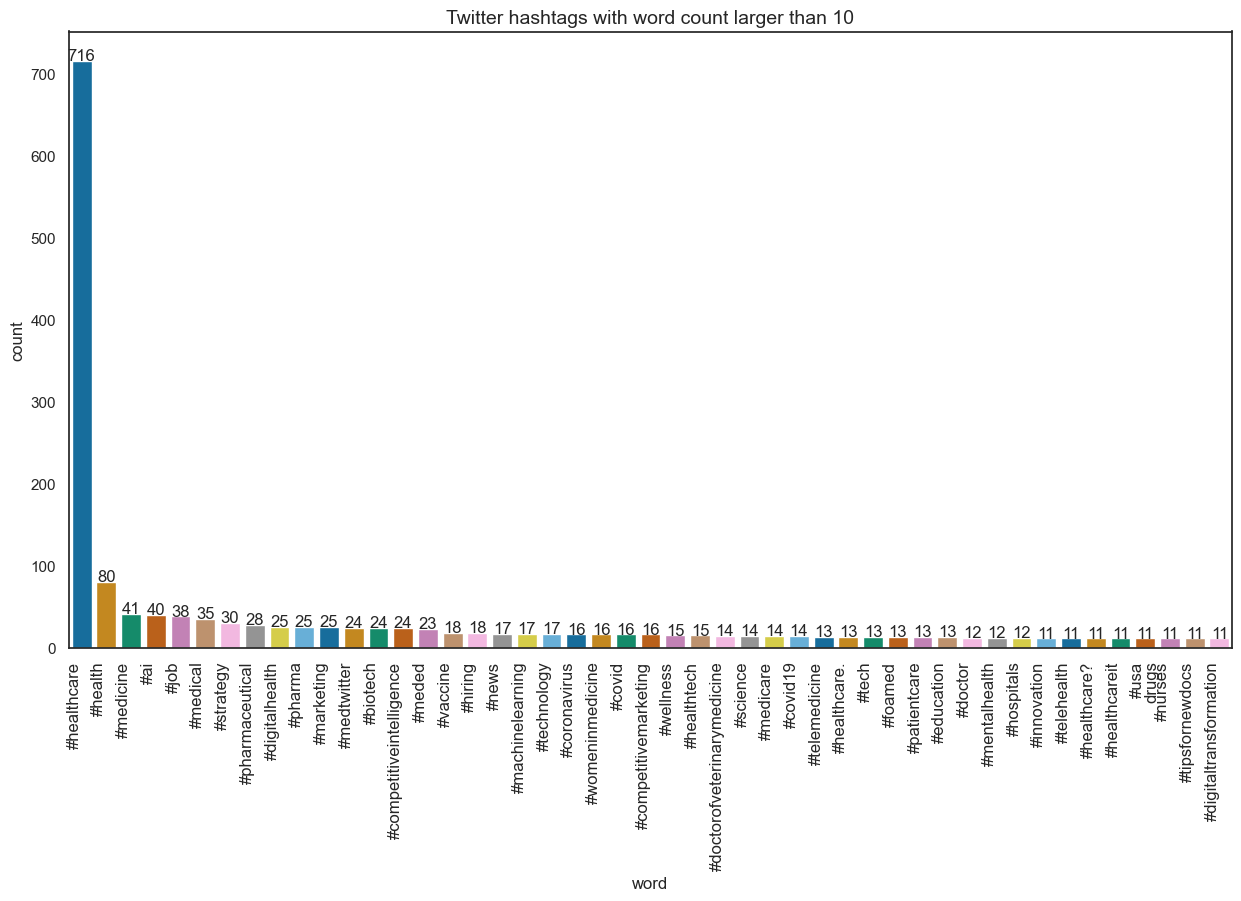

In [607]:
# set the figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create bar plot
ax = sns.barplot(data=tags_count_greater_10,x='word',y='count',palette="colorblind")
                 
# Add labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5, 
        f'{p.get_height():.0f}',  
        ha='center')

# set title
plt.title('Twitter hashtags with word count larger than 10', fontsize=14)

# set x and y labels
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)

# set x ticks for easier readability
plt.xticks(fontsize=12, rotation=90,ha='right')

# show plot
plt.show()

> The above chart is clutered, so create new graph where count>15 and removes the over represented hashtags (#healthcare & #health)

In [609]:
# Filter records where the count is larger than 15 exclude specific over represented hashtags
tags_count_filtered = tags_count_greater_10.query('count > 15 and word not in ["#healthcare", "#health"]')

# Display the first 10 rows of the filtered DataFrame
tags_count_filtered.head(10)  

word  count
2         #medicine     41
3               #ai     40
4              #job     38
5          #medical     35
6         #strategy     30
7   #pharmaceutical     28
8    #digitalhealth     25
9           #pharma     25
10       #marketing     25
11      #medtwitter     24

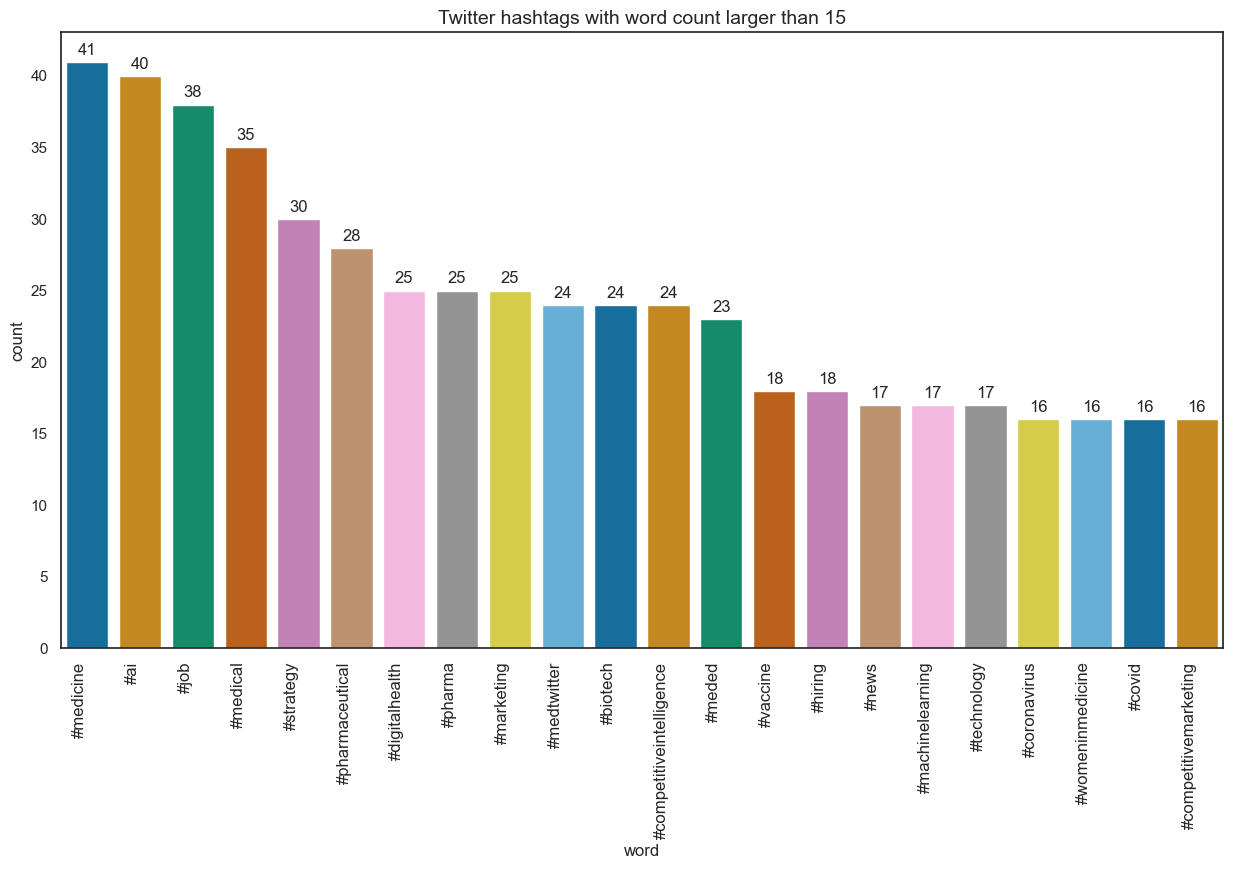

In [610]:
# set the figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create bar plot
ax = sns.barplot(data=tags_count_filtered,x='word',y='count',palette="colorblind")
                 
# Add labels on top of each bar
for p in ax.patches:
    ax.text(
        p.get_x() + p.get_width() / 2,
        p.get_height() + 0.5, 
        f'{p.get_height():.0f}',  
        ha='center')

# set title
plt.title('Twitter hashtags with word count larger than 15', fontsize=14)

# set x and y labels
plt.xlabel('word', fontsize=12)
plt.ylabel('count', fontsize=12)

# set x ticks for easier readability
plt.xticks(fontsize=12, rotation=90,ha='right')

# show plot
plt.show()

> Popular hashtags are #ai #digitalhealth #biotech suggested high sentinment about technology within the health sector

## Additional insights

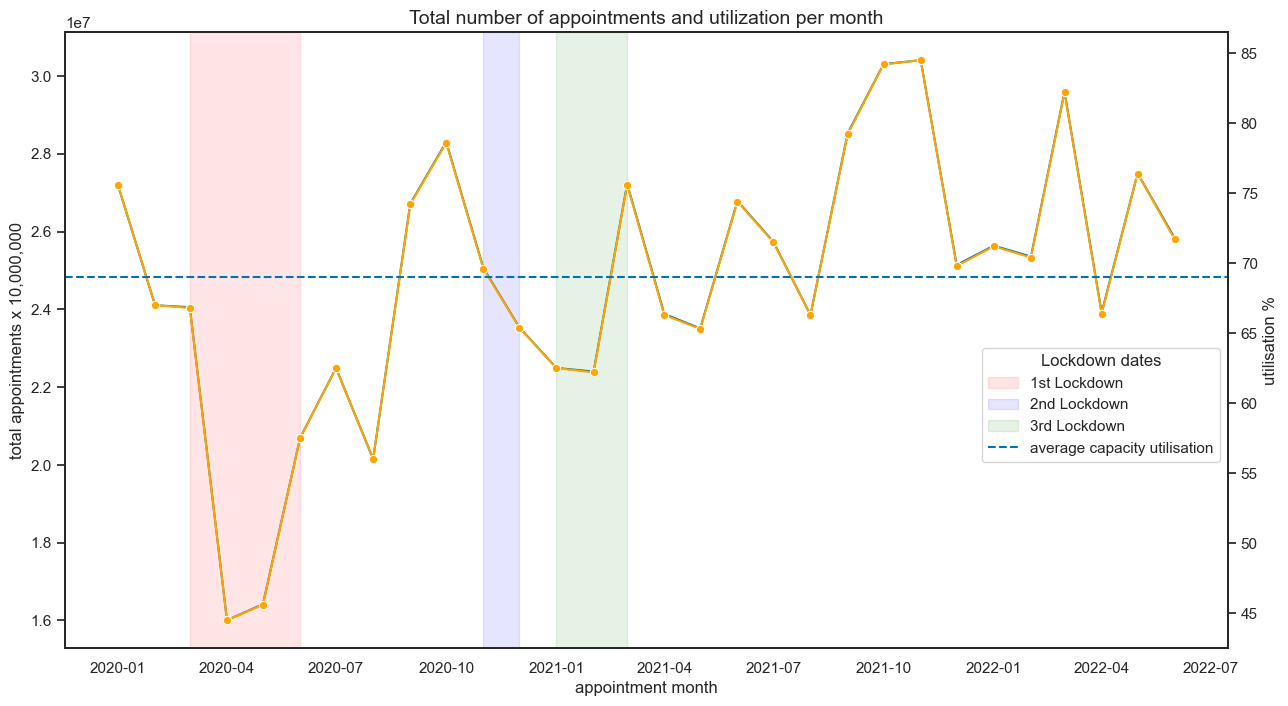

In [613]:
# lineplot with total appointments and utilisation

# set the figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# Create a lineplot overlaying total of appointment count by month with utilization
ax1 = sns.lineplot(x='appointment_month',y='Total appointments',data=utilisation_monthly,estimator=sum,ci=None)

# set x and y labels for axis 1
ax1.set_xlabel('appointment month', fontsize=12)
ax1.set_ylabel('total appointments x 10,000,000', fontsize=12)

# set title
ax1.set_title("Total number of appointments and utilization per month", fontsize = 14)

# Create a secondary y-axis for utilization.
ax2 = ax1.twinx()

# create second lineplot
sns.lineplot(x='appointment_month',y='Utilisation%',data=utilisation_monthly,ci=None,color="orange",ax=ax2,marker='o')

# set y labels for axis 2
ax2.set_ylabel("utilisation %")

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# add horiztonal line to highlight average utilisation
plt.axhline(y=69,linestyle='--',label='average capacity utilisation')

# set legend
plt.legend(loc='best', title="Lockdown dates", bbox_to_anchor=(1, 0.5))

> As we already know, monthly utilisation peaks at 84.5%. This was in November 2021 with 30405070 total appointments. 

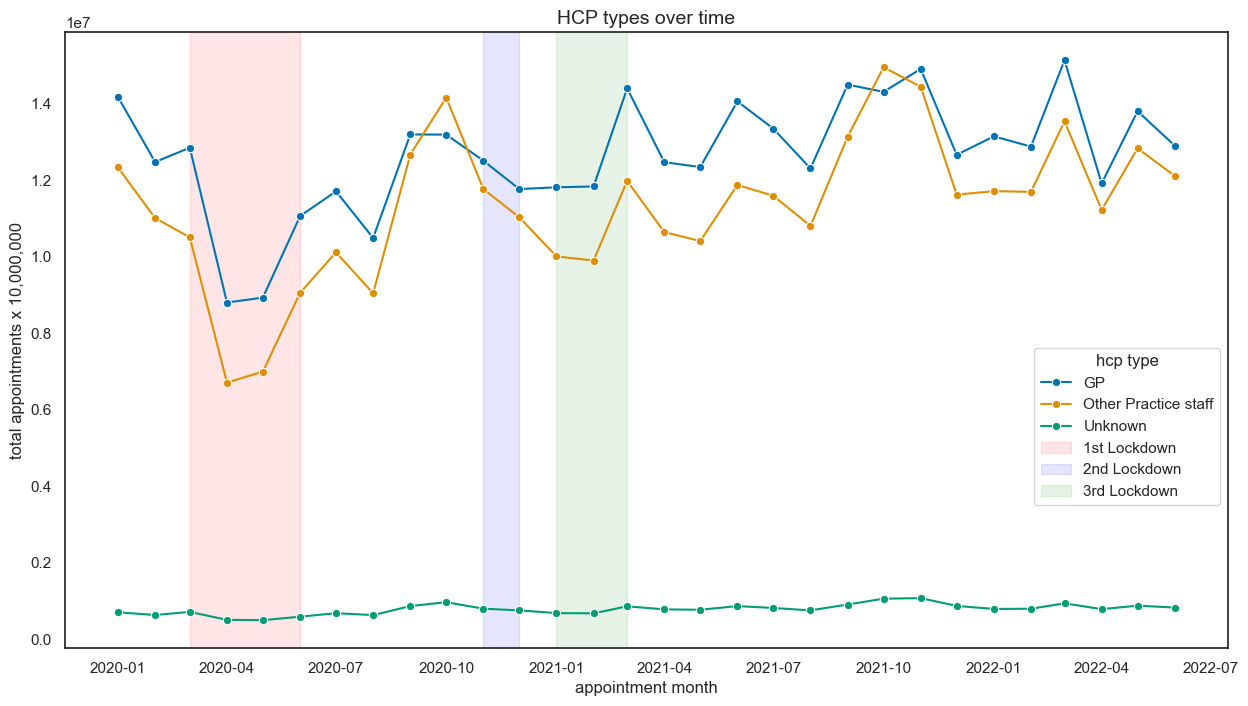

In [615]:
# lineplot with hcp types over time

# group total appointments by appointment month and hcp type
ar_hcp_series = ar_new.groupby(['appointment_month','hcp_type'])['count_of_appointments'].sum().reset_index()\
                      .rename(columns={'count_of_appointments':'Total appointments'})

# set the figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# Create a lineplot overlaying total of appointment count by month with utilization
sns.lineplot(x='appointment_month',y='Total appointments',data=ar_hcp_series, hue='hcp_type',marker='o')

# set x and y labels for axis 1
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set title
plt.title("HCP types over time", fontsize = 14)

# Add vertical annotation span lines to highlight lockdown dates
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2020-06'), alpha=0.1, color='red',label = '1st Lockdown')
plt.axvspan(pd.to_datetime('2020-11'), pd.to_datetime('2020-12'), alpha=0.1, color='blue',label = '2nd Lockdown')
plt.axvspan(pd.to_datetime('2021-01'), pd.to_datetime('2021-03'), alpha=0.1, color='green',label = '3rd Lockdown')

# set legend
plt.legend(loc='best', title='hcp type', bbox_to_anchor=(1, 0.5))

> Excluding 'unknown', the above graph shows similar appointment trends for GP and Other practice staff with spikes and dips during the same periods. We can observe a huge dip in the 1st lockdown, but interestingly a reasonable spike in the 3rd lockdown for both. Also, during the busy autumn period we observe a spike in Other practice staff appointments, surpassing GP appointments.

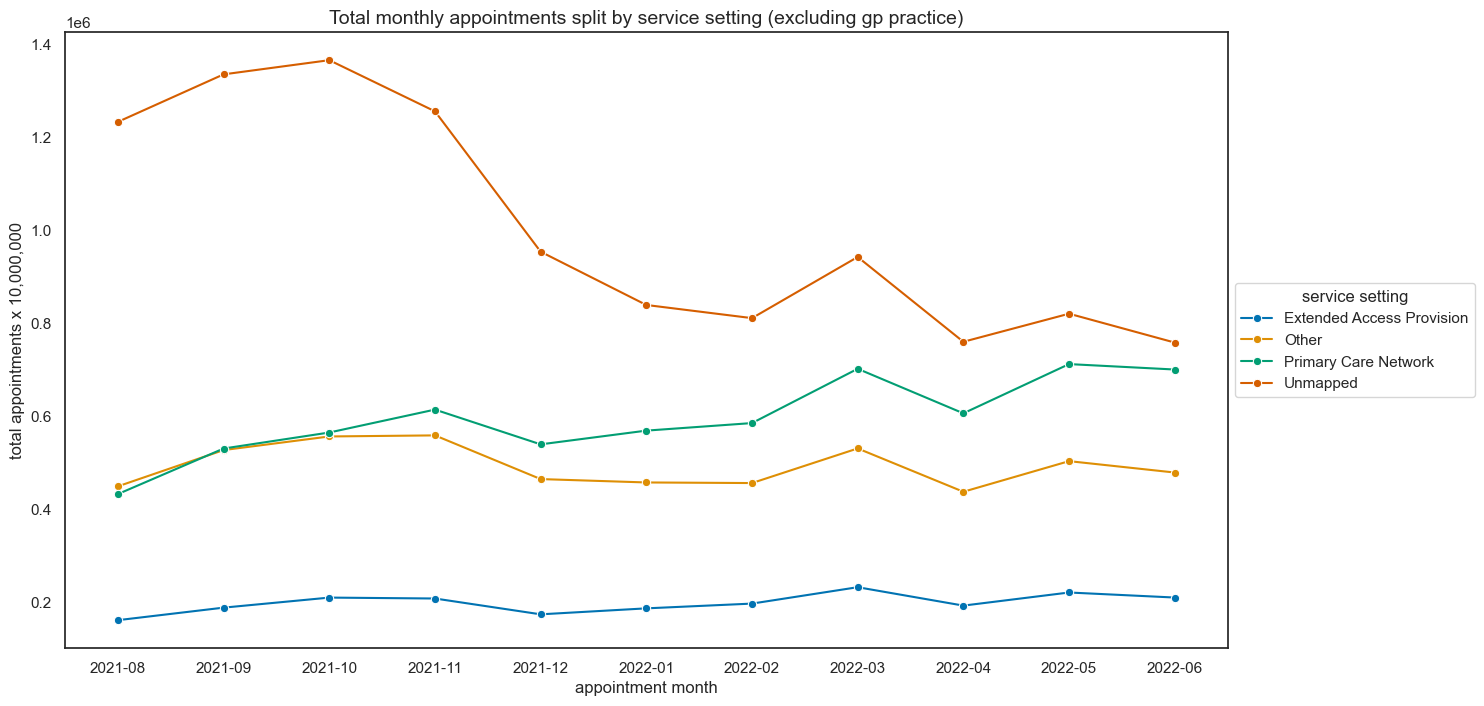

In [617]:
# explore service settings without GP

# we can modify the graph we already created previously which shows total appointments by service settings

# set the figure size
plt.figure(figsize=(15,8))

# tighten plot for easier viewing
plt.tight_layout()

# create line plot
sns.lineplot(data=nc_ss_series[nc_ss_series['service_setting'] != 'General Practice'],x='appointment_month',y='Total Appointments',
             errorbar=None,hue='service_setting',marker='o')

# set title
plt.title('Total monthly appointments split by service setting (excluding gp practice)', fontsize=14)

# set x and y labels
plt.xlabel('appointment month', fontsize=12)
plt.ylabel('total appointments x 10,000,000', fontsize=12)

# set legend
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='service setting')

> By excluding General Practice which accounted for most of the total appointments we get a much better view of how the others are performing. It looks like 'Unmapped' has been declining over the period with a upwards trend for Primary Care Network. A reason for this might be an increase in investment 

>### Insights


 - Strong positive correlation between ‘ average wait time (days)’ and ‘DNA (did not attend) rate %’. Pearson Correlation Coefficient = 0.89 & P- value = 0.0075. Thus, this result is statistically significant, and implies higher wait times = more missed appointments.
 - Attendance rates are higher for telephone appointments across all wait times, but as wait time increases, the gap between telephone attendance and face to face attendance increases.
 - London has the greatest proportion of telephone appointments, although the Northwest also peaked at over 60% in April 2020
 - 4.16% of total appointments not attended (DNA), which are costing the NHS £927M annually (assuming £30 per missed GP appointment) ¹. North West and London regions have the highest DNA rates (5.33% and 5.26% respectively)
 - Other practice staff have the highest DNA rate of 7%, whereas for GP’s its 3%. Furthermore, average wait time for other practice staff is 7.4 days and for GP appointments is 3.3 days.
 - GPs handle 51% of appointments, Other practice staff handle 46% of appointments. But GPs handle 51% telephone, 49% face-to-face appointments which shows more favourability towards telephone. Other practice staff handle 23% telephone, 77% face-to-face showing the divide between appointment modes and favourability towards face-to-face for Other practice staff.
 - Tuesdays have the most appointments (20.9%), followed by Monday, then Wednesday through to Sunday. Mondays generally have more appointments but their total is brought down by bank/public holidays.
 - Attendance has not changed very much through the covid-19 pandemic, although there is a slight increase in attendance from April 2020 (start of the first lockdown)
 - The NHS, with a daily capacity limit of 1.2 million appointments, faced exceeding this capacity on 175 of the 334 days analysed (52%). Monday (43) and Tuesday (43) emerged as the most common days when capacity was exceeded.

>### Recommendations

**Incentivize more telephone over face-to-face appointments:** In general, we can see that attendance for telephone appointments is greater. A limitation is that we don’t know what groups of patients prefer telephone appointments, but we could consider offering telephone appointments for groups more likely to miss face-to-face appointments (e.g younger patients or those with mobility issues).

**Keep time between booking and appointment short:** These appointments are more likely to be attended. Options such as triage-based scheduling and improving appointment reminders could help significantly.

 **Same-Day Appointments:** Given that same-day appointments are attended the most, prioritize scheduling and promoting same-day appointments to increase attendance rates.

**Increase staff capacity earlier in the week:** Or transfer Monday & Tuesday appointments to Thursday and Fridays to keep up with demand.

**Monitor staff specific DNA rates:** Other practice staff are falling behind GPs by DNA rate and average wait time, but they conduct proportionally more face-to-face appointments, would expanding telephone appointments for them help reduce missed appointments?

**Target regions which have the highest DNA rate - London and North West:** Consider slight overbooking models (e.g double booking 5-10% of slots) to optimize capacity. Also investigate local factors (e.g., transport access, demographics) causing appointments to being missed. 

**Twitter:** Twitter data proved less directly useful, but potential insights can be unlocked through cleaned, ethical analysis using relevant keywords and hashtags.

>### Analytical Recommendations

> The metadata highlights that the data was not designed for analysis, lacking national standard for data entry resulting in widespread data quality issues. Here are my analytical recommendations which I believe would help us better understand reasons for missed appointments.  

 -	We need more data, especially at a more granular level i.e. information on the role of the health care professional associated with the appointment.
 -	Improving data quality issues (i.e. no unknown/unmapped values)
 -	Reporting at ICB level and standardized to monthly level for more accuracy
 -	Enrich data with demographics, regional information to tailor interventions to customer segments 
 -	Predictive analytics to determine the likelihood of future missed appointments.

> ### Ultimately to meet population demands, increasing capacity is essential. However significant resource restructuring is necessary for more efficient utilization. Monthly utilization never exceeded 84.5%, suggesting that there was enough capacity. Finally, more years of data including pandemics, as well as of higher data quality would help enrich analysis and actionable insights.

## Thank you for reading

### For any further queries please do contact me (Harshdeep Kohli) via email: harshdeepkohli53@gmail.com